____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 120, 160, 3)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
conv1_1 (Convolution2D)          (None, 58, 78, 24)    1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 58, 78, 24)    0           conv1_1[0][0]                    
____________________________________________________________________________________________________
conv2_1 (Convolution2D)          (None, 27, 37, 36)    21636       activation_1[0][0]               
___________________________________________________________________________________________

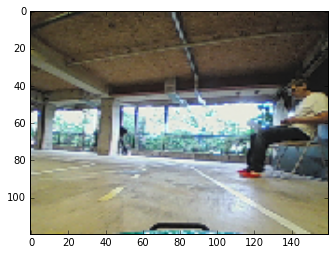

(1, 58, 78)
(1, 120, 160, 1)
(1, 120, 160, 1)
(120, 160, 1)
(58, 78)
(12, 17)
(27, 37)
(27, 37)
(58, 78)
(120, 160)


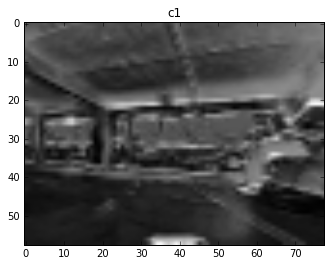

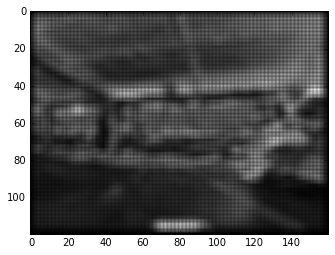

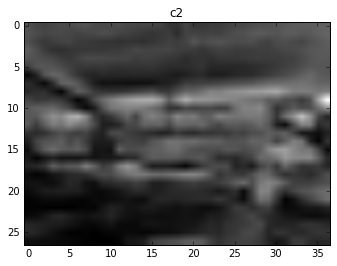

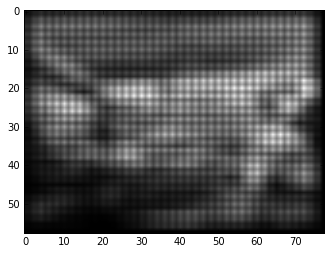

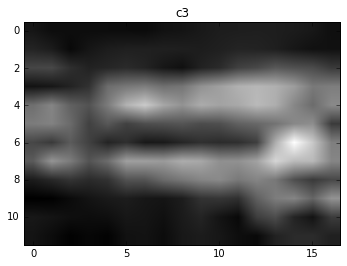

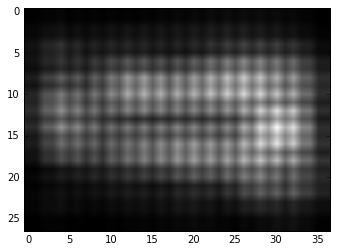

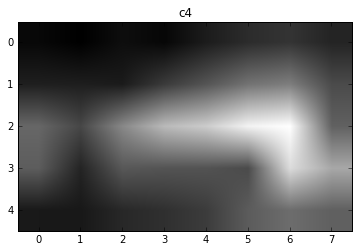

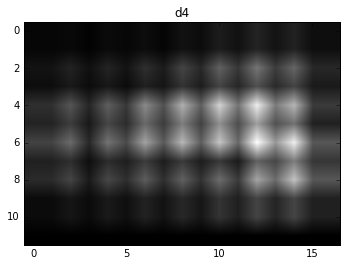

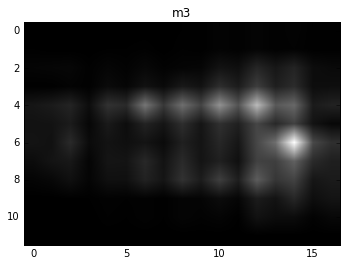

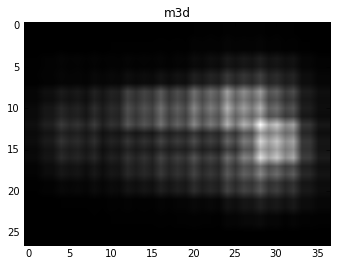

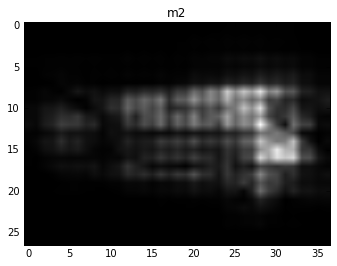

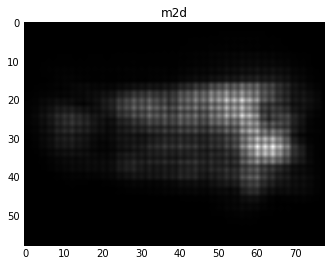

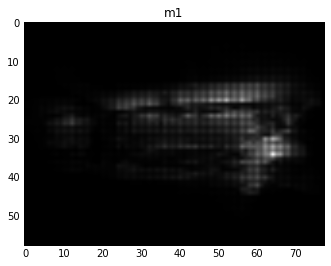

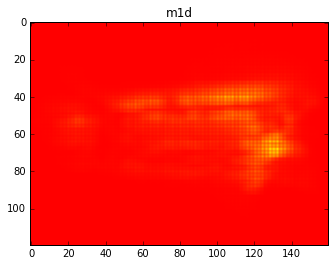

In [49]:
from keras.models import *
from keras.callbacks import *
from keras.layers import Lambda, Convolution2D, Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Lambda, ELU
from keras.layers import Dense, Activation, Reshape, Merge
from keras.layers.pooling import MaxPooling2D, AveragePooling1D
from keras.layers import Merge, merge
import keras.backend as K
import cv2
import argparse
import pickle
from keras.models import load_model
from keras.layers import Convolution2D, MaxPooling2D, Activation, Lambda, Input, Deconvolution2D, Flatten, Dense, Reshape
from keras.layers import Merge
from keras.models import Sequential
from keras import backend as K


import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray
from PIL import Image, ImageEnhance, ImageOps

model = load_model("model-17.h5")
model.summary()




car=np.array(Image.open('img_00010064_st_0_th_9459.jpg'))


car_batch = np.expand_dims(car,axis=0)
print(car_batch.shape)
#conv_car = model.predict(car_batch)
steering_angle = float(model.predict(car[None, :, :, :], batch_size=1))
print(steering_angle)

from keras.models import Model
hidden_layer = model.layers[2].output
c1=Lambda(lambda xin: K.mean(xin,axis=3),name='lambda_new_1')(hidden_layer)
r1=Reshape((58,78,1))(c1)
d1 = Deconvolution2D(1, 5, 5,output_shape=(None,120,160, 1),subsample= (2, 2),border_mode='valid',activation='relu',init='one')(r1)

model2 = Model(input=model.input,output=[c1,d1])
model2.summary()

a = Input(shape=(58,78,1))
d1 = Deconvolution2D(1, 5, 5,output_shape=(None,120,160, 1),subsample= (2, 2),border_mode='valid',activation='relu',init='one')(a)
model2b = Model(input=a,output=[d1])
model2b.summary()


hidden_layer = model.layers[4].output
c2=Lambda(lambda xin: K.mean(xin,axis=3),name='lambda_new_2')(hidden_layer)
r2=Reshape((27,37,1))(c2)
d2 = Deconvolution2D(1, 5, 5,output_shape=(None,58,78,1),subsample= (2, 2),border_mode='valid',activation='relu',init='one')(r2)

model3 = Model(input=model.input,output=[c2,d2])
model3.summary()

a = Input(shape=(27,37,1))
d2 = Deconvolution2D(1, 5, 5,output_shape=(None,58,78,1),subsample= (2, 2),border_mode='valid',activation='relu',init='one')(a)
model3b = Model(input=a,output=[d2])
model3b.summary()


hidden_layer = model.layers[6].output
c3=Lambda(lambda xin: K.mean(xin,axis=3),name='lambda_new_3')(hidden_layer)
r3=Reshape((12,17,1))(c3)
d3 = Deconvolution2D(1, 5, 5,output_shape=(None,27,37,1),subsample= (2, 2),border_mode='valid',activation='relu',init='one')(r3)

model4 = Model(input=model.input,output=[c3,d3])
model4.summary()

a = Input(shape=(12,17,1))
d3 = Deconvolution2D(1, 5, 5,output_shape=(None,27,37,1),subsample= (2, 2),border_mode='valid',activation='relu',init='one')(a)
model4b = Model(input=a,output=[d3])
model4b.summary()




hidden_layer = model.layers[8].output
c4=Lambda(lambda xin: K.mean(xin,axis=3),name='lambda_new_4')(hidden_layer)
r4=Reshape((5,8,1))(c4)
d4 = Deconvolution2D(1, 3, 3,output_shape=(None,12,17,1),subsample= (2, 2),border_mode='valid',activation='relu',init='one')(r4)

model5 = Model(input=model.input,output=[c4,d4])
model5.summary()



plt.imshow(car)
plt.show()
conv_cat2 = model2.predict(car[None, :, :, :], batch_size=1)
conv_cat3 = model3.predict(car[None, :, :, :], batch_size=1)
conv_cat4 = model4.predict(car[None, :, :, :], batch_size=1)
conv_cat5 = model5.predict(car[None, :, :, :], batch_size=1)

print (conv_cat2[0].shape)
print (conv_cat2[1].shape)
deconv2 = conv_cat2[1]
deconv3 = conv_cat3[1]
deconv4 = conv_cat4[1]
deconv5 = conv_cat5[1]
print (deconv2.shape)

conv_cat2 = np.squeeze(conv_cat2[0], axis=0)
conv_cat3 = np.squeeze(conv_cat3[0], axis=0)
deconv2 = np.squeeze(deconv2, axis=0)
print(deconv2.shape)
deconv2 = np.squeeze(deconv2, axis=2)

deconv3 = np.squeeze(deconv3, axis=0)
deconv3 = np.squeeze(deconv3, axis=2)

deconv4 = np.squeeze(deconv4, axis=0)
deconv4 = np.squeeze(deconv4, axis=2)

deconv5 = np.squeeze(deconv5, axis=0)
deconv5 = np.squeeze(deconv5, axis=2)


conv_cat4 = np.squeeze(conv_cat4[0], axis=0)
conv_cat5 = np.squeeze(conv_cat5[0], axis=0)
print (conv_cat2.shape)


m3=np.multiply(deconv5,conv_cat4)

# run m3 through a deconv, to make it bigger
#m3 = np.expand_dims(m3,axis=0)
print(m3.shape)
m3d = model4b.predict(m3[None, :, :, None], batch_size=1)
m3d = np.squeeze(m3d, axis=0)
m3d = np.squeeze(m3d, axis=2)

print(m3d.shape)

m2=np.multiply(m3d,conv_cat3)
print(m2.shape)
m2d = model3b.predict(m2[None, :, :, None], batch_size=1)
m2d = np.squeeze(m2d, axis=0)
m2d = np.squeeze(m2d, axis=2)

m1=np.multiply(m2d,conv_cat2)
print(m1.shape)
m1d = model2b.predict(m1[None, :, :, None], batch_size=1)
m1d = np.squeeze(m1d, axis=0)
m1d = np.squeeze(m1d, axis=2)
print(m1d.shape)


#conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])
#print (conv_cat2.shape)
plt.title('c1')
plt.imshow(conv_cat2,cmap='gray')
plt.show()
plt.imshow(deconv2,cmap='gray')
plt.show()
plt.title('c2')
plt.imshow(conv_cat3,cmap='gray')
plt.show()
plt.imshow(deconv3,cmap='gray')
plt.show()
plt.title('c3')
plt.imshow(conv_cat4,cmap='gray')
plt.show()
plt.imshow(deconv4,cmap='gray')
plt.show()

plt.title('c4')
plt.imshow(conv_cat5,cmap='gray')
plt.show()
plt.title('d4')
plt.imshow(deconv5,cmap='gray')
plt.show()
plt.title('m3')
plt.imshow(m3,cmap='gray')
plt.show()
plt.title('m3d')
plt.imshow(m3d,cmap='gray')
plt.show()
plt.title('m2')
plt.imshow(m2,cmap='gray')
plt.show()
plt.title('m2d')
plt.imshow(m2d,cmap='gray')
plt.show()
plt.title('m1')
plt.imshow(m1,cmap='gray')
plt.show()
plt.title('m1d')
plt.imshow(m1d,cmap='autumn')
plt.show()

/home/alans/anaconda2/envs/tf1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:5882: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 120 x 160)
  '(shape is %d x %d)' % inp.shape[::-1])


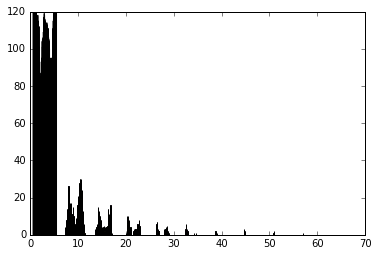

(120, 160)


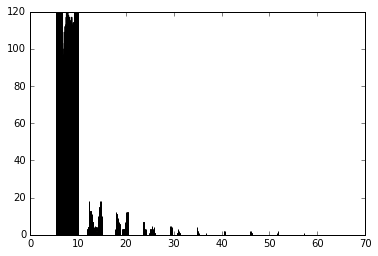

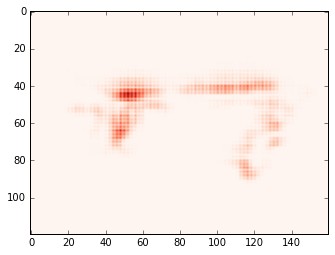

In [2]:
plt.hist(m1d[::-1])
plt.show()
m1d_truncated = m1d[m1d > 5]
result = np.clip(m1d, 5, 255)
print(result.shape)
plt.hist(result[::-1])
plt.show()

plt.imshow(result,cmap='Reds')
plt.show()


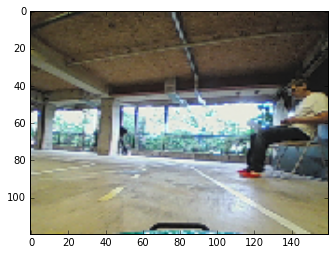

In [3]:
plt.imshow(car)
plt.show()

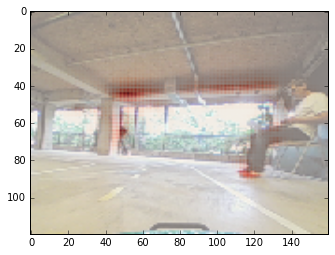

In [4]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

#plt.imshow(rgb2gray(car),cmap='gray')
plt.imshow(car,cmap='gray')
plt.imshow(m1d, cmap='Reds', alpha=0.5) # interpolation='none'
plt.show()

255.0
0.0


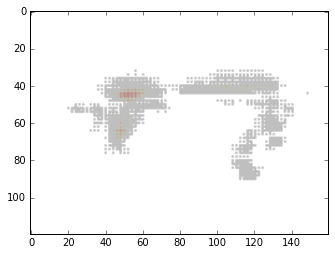

<PIL.Image.Image image mode=RGBA size=160x120 at 0x7F30AEAF7908>
<PIL.Image.Image image mode=RGBA size=160x120 at 0x7F30AEC24518>


In [47]:
def almostEquals(a,b,thres=50):
    return all(abs(a[i]-b[i])<thres for i in range(len(a)))

import matplotlib.cm as cm
print(m1d.max())
print(m1d.min())
new = m1d
#new *= (255.0/new.max())
#overlay = Image.fromarray(np.uint8(cm.Reds(new)))
overlay = Image.fromarray(cm.Reds(new/255, bytes=True)) 

pixeldata = list(overlay.getdata())

for i,pixel in enumerate(pixeldata):
    if almostEquals(pixel[:3], (255,255,255)):
        pixeldata[i] = (255,255,255,0)
    else:
        pixeldata[i]= (pixel[0],pixel[1],pixel[2],128)

overlay.putdata(pixeldata)
carimg = Image.fromarray(np.uint8(car))
carimg = carimg.convert("RGBA")

plt.imshow(overlay)
plt.show()
print(overlay)
print(carimg)

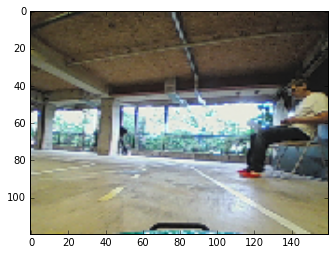

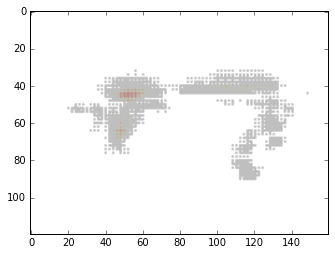

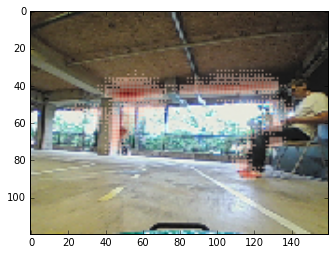

In [46]:
new_img = Image.blend(carimg, overlay,1) 
plt.imshow(carimg)
plt.show()
plt.imshow(new_img)
plt.show()

nplt.imshow(new_img2)
plt.show()


Non Hardcoded Try?

In [1]:
from keras.models import *
from keras.callbacks import *
from keras.layers import Lambda, Convolution2D, Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Lambda, ELU
from keras.layers import Dense, Activation, Reshape, Merge
from keras.layers.pooling import MaxPooling2D, AveragePooling1D
from keras.layers import Merge, merge
import keras.backend as K
import cv2
import argparse
import pickle
from keras.models import load_model
from keras.layers import Convolution2D, MaxPooling2D, Activation, Lambda, Input, Deconvolution2D, Flatten, Dense, Reshape
from keras.layers import Merge
from keras.models import Sequential
from keras import backend as K


import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray
from PIL import Image, ImageEnhance, ImageOps

model = load_model("model-20.h5")
model.summary()



Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 60, 160, 3)    0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
conv1_1 (Convolution2D)          (None, 28, 78, 24)    1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 28, 78, 24)    0           conv1_1[0][0]                    
____________________________________________________________________________________________________
conv2_1 (Convolution2D)          (None, 12, 37, 36)    21636       activation_1[0][0]               
___________________________________________________________________________________________

In [2]:
current_stack=[]
#models = []
for layer in model.layers:
    if layer.name.startswith("conv"):
        current_stack.insert(0, layer)
current_stack

In [3]:
act_stack=[]
#models = []
for layer in model.layers:
    if layer.name.startswith("activ"):
        act_stack.insert(0, layer)
act_stack
for i in act_stack:
    print (i.name)
start=len(act_stack)-len(current_stack)
print(start)
act_stack=act_stack[start:]
for i in act_stack:
    print (i.name)


activation_8
activation_7
activation_6
activation_5
activation_4
activation_3
activation_2
activation_1
4
activation_4
activation_3
activation_2
activation_1


In [9]:
stack2 = []
lastone=None
# hold onto last one..
#for i, layer in enumerate(current_stack[:1]):
for i, layer in enumerate(current_stack):
    
    print(layer.name,i)
    
    our_shape=(layer.output_shape[1],layer.output_shape[2],1)
    hidden_layer = act_stack[i]
    print(hidden_layer.name)
    print(layer.name)
    print(our_shape)
    # average this layer
    name='lambda_new_'+str(i)
    c1=Lambda(lambda xin: K.mean(xin,axis=3),name=name)(hidden_layer.output)
    name='reshape_new_'+str(i)
    r1=Reshape(our_shape,name=name)(c1)
    lastone=r1
    if (i!=0):
       # if we aren't the bottom, multiply by output of layer below
       print("multiply")
       name='multiply_'+str(i)
       r1 = merge([r1,lastone], mode='mul', name = name)
       lastone=r1
    
    
    if (i<len(current_stack)-1):
        print('do deconv')
        # deconv to the next bigger size
        bigger_shape=current_stack[i+1].output_shape
    else:
        bigger_shape=model.input_shape
            
            
    bigger_shape=(bigger_shape[0],bigger_shape[1],bigger_shape[2],1)

    subsample=current_stack[i].subsample
    print(subsample)
    nb_row=current_stack[i].nb_row
    nb_col=current_stack[i].nb_col
    print(nb_col,nb_row)
    print(bigger_shape)
    name='deconv_new_'+str(i)
    d1 = Deconvolution2D(1, nb_row, nb_col,output_shape=bigger_shape,subsample= subsample,border_mode='valid',activation='relu',init='one',name=name)(r1)
    #d4 = Deconvolution2D(1, 3, 3,output_shape=(None,4,17,1),subsample= (2, 2),border_mode='valid',activation='relu',init='one')(r4)

    lastone=d1


model2 = Model(input=model.input,output=[lastone])
model2.summary()

conv4_1 0
activation_4
conv4_1
(1, 8, 1)
do deconv
(2, 2)
3 3
(None, 4, 17, 1)
conv3_1 1
activation_3
conv3_1
(4, 17, 1)
multiply
do deconv
(2, 2)
5 5
(None, 12, 37, 1)
conv2_1 2
activation_2
conv2_1
(12, 37, 1)
multiply
do deconv
(2, 2)
5 5
(None, 28, 78, 1)
conv1_1 3
activation_1
conv1_1
(28, 78, 1)
multiply
(2, 2)
5 5
(None, 60, 160, 1)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_input_1 (InputLayer)      (None, 60, 160, 3)    0                                            
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 60, 160, 3)    0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
conv1_1 (Convolution2D)          (None, 28, 78, 24) 

In [14]:
import matplotlib.cm as cm
def almostEquals(a,b,thres=50):
    return all(abs(a[i]-b[i])<thres for i in range(len(a)))

def processFrame(image):

    global model2
    global model

    #steering_angle = float(model.predict(image[None, :, :, :], batch_size=1))
    #   print(image.shape)
    m1d = model2.predict(image[None, :, :, :], batch_size=1)
    #print(m1d.shape)
    m1d = np.squeeze(m1d, axis=0)
    m1d = np.squeeze(m1d, axis=2)
    #print(m1d.shape)

    #print(m1d)
    #plt.hist(m1d[::-1])
    #plt.show()
    #print(m1d.max())
    #print(m1d.min())
    o2=overlay = Image.fromarray(cm.Reds(m1d/m1d.max(), bytes=True)) 
    #plt.imshow(o2);
    #plt.show();

    pixeldata = list(overlay.getdata())

    for i,pixel in enumerate(pixeldata):
        if almostEquals(pixel[:3], (255,255,255)):
            pixeldata[i] = (255,255,255,0)
        else:
            pixeldata[i]= (pixel[0],pixel[1],pixel[2],128)

    overlay.putdata(pixeldata)
    carimg = Image.fromarray(np.uint8(image))
    carimg = carimg.convert("RGBA")
    new_img2=Image.alpha_composite(carimg, overlay)
    new_img2= new_img2.convert("RGB")
    o2= o2.convert("RGB")
    #plt.imshow(o2);
    #plt.show();
    return new_img2
  

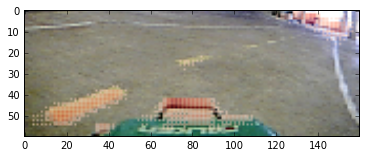

In [15]:
car=np.array(Image.open("/home/alans/shark/log/img_00002683_st_32767_th_13513.jpg"))
car=car[60:,:]
out=processFrame(car)
plt.imshow(out)
plt.show()

In [16]:
import os
def getFiles(name):
    files = os.listdir(name)
    files = [f for f in files if f[-3:] =='jpg']
    files.sort()
    file_paths = [os.path.join(name, f) for f in files]
    return file_paths

def loadTraining():
    inputs='/home/alans/shark/log/'
    files=getFiles(inputs)
    return files

import moviepy.editor as mpy

count = 0
def make_frame(t):
    global count
    print(files[count])
    car=np.array(Image.open(files[count]))
    car=car[60:,:]
    count=count+1
    out=processFrame(car)
    return  np.array(out)
#    return  car

files=loadTraining()

clip = mpy.VideoClip(make_frame, duration=90) # 2 seconds
clip.write_videofile("out.mp4",audio=False,fps=30)


/home/alans/shark/log/img_00000001_st_0_th_1352.jpg
[MoviePy] >>>> Building video out.mp4
[MoviePy] Writing video out.mp4


  0%|          | 3/2701 [00:00<01:31, 29.49it/s]

/home/alans/shark/log/img_00000002_st_0_th_1352.jpg
/home/alans/shark/log/img_00000003_st_0_th_1352.jpg
/home/alans/shark/log/img_00000004_st_0_th_2027.jpg
/home/alans/shark/log/img_00000005_st_0_th_2027.jpg
/home/alans/shark/log/img_00000006_st_0_th_2027.jpg
/home/alans/shark/log/img_00000007_st_0_th_4054.jpg
/home/alans/shark/log/img_00000008_st_0_th_4054.jpg
/home/alans/shark/log/img_00000009_st_0_th_4392.jpg


  1%|          | 14/2701 [00:00<01:11, 37.40it/s]

/home/alans/shark/log/img_00000010_st_0_th_4392.jpg
/home/alans/shark/log/img_00000011_st_0_th_4392.jpg
/home/alans/shark/log/img_00000012_st_0_th_4392.jpg
/home/alans/shark/log/img_00000013_st_0_th_4392.jpg
/home/alans/shark/log/img_00000014_st_0_th_4392.jpg
/home/alans/shark/log/img_00000015_st_0_th_5743.jpg
/home/alans/shark/log/img_00000016_st_0_th_5743.jpg
/home/alans/shark/log/img_00000017_st_0_th_5743.jpg
/home/alans/shark/log/img_00000018_st_0_th_5743.jpg
/home/alans/shark/log/img_00000019_st_0_th_5743.jpg
/home/alans/shark/log/img_00000020_st_0_th_5743.jpg


  1%|          | 26/2701 [00:00<01:01, 43.29it/s]

/home/alans/shark/log/img_00000021_st_0_th_5743.jpg
/home/alans/shark/log/img_00000022_st_0_th_5743.jpg
/home/alans/shark/log/img_00000023_st_0_th_5743.jpg
/home/alans/shark/log/img_00000024_st_0_th_5743.jpg
/home/alans/shark/log/img_00000025_st_0_th_5743.jpg
/home/alans/shark/log/img_00000026_st_0_th_5743.jpg
/home/alans/shark/log/img_00000027_st_0_th_5743.jpg
/home/alans/shark/log/img_00000028_st_0_th_5743.jpg
/home/alans/shark/log/img_00000029_st_0_th_5743.jpg
/home/alans/shark/log/img_00000030_st_0_th_5743.jpg
/home/alans/shark/log/img_00000031_st_0_th_5743.jpg


  1%|▏         | 38/2701 [00:00<00:56, 47.33it/s]

/home/alans/shark/log/img_00000032_st_0_th_5743.jpg
/home/alans/shark/log/img_00000033_st_0_th_5743.jpg
/home/alans/shark/log/img_00000034_st_0_th_5743.jpg
/home/alans/shark/log/img_00000035_st_0_th_5743.jpg
/home/alans/shark/log/img_00000036_st_0_th_5743.jpg
/home/alans/shark/log/img_00000037_st_0_th_5743.jpg
/home/alans/shark/log/img_00000038_st_0_th_5743.jpg
/home/alans/shark/log/img_00000039_st_0_th_5743.jpg
/home/alans/shark/log/img_00000040_st_0_th_5743.jpg
/home/alans/shark/log/img_00000041_st_0_th_5743.jpg
/home/alans/shark/log/img_00000042_st_0_th_5743.jpg


  2%|▏         | 48/2701 [00:01<00:58, 44.97it/s]

/home/alans/shark/log/img_00000043_st_0_th_5743.jpg
/home/alans/shark/log/img_00000044_st_0_th_5743.jpg
/home/alans/shark/log/img_00000045_st_0_th_5743.jpg
/home/alans/shark/log/img_00000046_st_0_th_5743.jpg
/home/alans/shark/log/img_00000047_st_0_th_5743.jpg
/home/alans/shark/log/img_00000048_st_0_th_5743.jpg
/home/alans/shark/log/img_00000049_st_0_th_5743.jpg
/home/alans/shark/log/img_00000050_st_0_th_5743.jpg


  2%|▏         | 53/2701 [00:01<00:59, 44.86it/s]

/home/alans/shark/log/img_00000051_st_0_th_5743.jpg
/home/alans/shark/log/img_00000052_st_0_th_5743.jpg
/home/alans/shark/log/img_00000053_st_0_th_5743.jpg
/home/alans/shark/log/img_00000054_st_0_th_5743.jpg
/home/alans/shark/log/img_00000055_st_0_th_5743.jpg
/home/alans/shark/log/img_00000056_st_0_th_5743.jpg
/home/alans/shark/log/img_00000057_st_0_th_5743.jpg
/home/alans/shark/log/img_00000058_st_0_th_5743.jpg
/home/alans/shark/log/img_00000059_st_0_th_5743.jpg


  2%|▏         | 63/2701 [00:01<01:00, 43.89it/s]

/home/alans/shark/log/img_00000060_st_0_th_5743.jpg
/home/alans/shark/log/img_00000061_st_0_th_5743.jpg
/home/alans/shark/log/img_00000062_st_0_th_5743.jpg
/home/alans/shark/log/img_00000063_st_0_th_5743.jpg
/home/alans/shark/log/img_00000064_st_0_th_5743.jpg
/home/alans/shark/log/img_00000065_st_0_th_6081.jpg
/home/alans/shark/log/img_00000066_st_0_th_6081.jpg
/home/alans/shark/log/img_00000067_st_0_th_6081.jpg
/home/alans/shark/log/img_00000068_st_0_th_6081.jpg
/home/alans/shark/log/img_00000069_st_0_th_6081.jpg


  3%|▎         | 74/2701 [00:01<00:56, 46.83it/s]

/home/alans/shark/log/img_00000070_st_0_th_6081.jpg
/home/alans/shark/log/img_00000071_st_0_th_6081.jpg
/home/alans/shark/log/img_00000072_st_0_th_6081.jpg
/home/alans/shark/log/img_00000073_st_0_th_6081.jpg
/home/alans/shark/log/img_00000074_st_0_th_6081.jpg
/home/alans/shark/log/img_00000075_st_0_th_6081.jpg
/home/alans/shark/log/img_00000076_st_0_th_6081.jpg
/home/alans/shark/log/img_00000077_st_0_th_6081.jpg
/home/alans/shark/log/img_00000078_st_0_th_6081.jpg
/home/alans/shark/log/img_00000079_st_0_th_6081.jpg
/home/alans/shark/log/img_00000080_st_0_th_6081.jpg


  3%|▎         | 86/2701 [00:01<00:53, 49.19it/s]

/home/alans/shark/log/img_00000081_st_0_th_6419.jpg
/home/alans/shark/log/img_00000082_st_0_th_6419.jpg
/home/alans/shark/log/img_00000083_st_0_th_6419.jpg
/home/alans/shark/log/img_00000084_st_0_th_6081.jpg
/home/alans/shark/log/img_00000085_st_0_th_6081.jpg
/home/alans/shark/log/img_00000086_st_0_th_6081.jpg
/home/alans/shark/log/img_00000087_st_0_th_6419.jpg
/home/alans/shark/log/img_00000088_st_0_th_6419.jpg
/home/alans/shark/log/img_00000089_st_0_th_6419.jpg
/home/alans/shark/log/img_00000090_st_0_th_6419.jpg
/home/alans/shark/log/img_00000091_st_0_th_6419.jpg


  4%|▎         | 98/2701 [00:02<00:51, 50.64it/s]

/home/alans/shark/log/img_00000092_st_0_th_6419.jpg
/home/alans/shark/log/img_00000093_st_0_th_6419.jpg
/home/alans/shark/log/img_00000094_st_0_th_6419.jpg
/home/alans/shark/log/img_00000095_st_0_th_6419.jpg
/home/alans/shark/log/img_00000096_st_0_th_6419.jpg
/home/alans/shark/log/img_00000097_st_0_th_6081.jpg
/home/alans/shark/log/img_00000098_st_0_th_6081.jpg
/home/alans/shark/log/img_00000099_st_0_th_6081.jpg
/home/alans/shark/log/img_00000100_st_0_th_6419.jpg
/home/alans/shark/log/img_00000101_st_0_th_6419.jpg
/home/alans/shark/log/img_00000102_st_0_th_6419.jpg


  4%|▍         | 110/2701 [00:02<00:49, 52.10it/s]

/home/alans/shark/log/img_00000103_st_0_th_6081.jpg
/home/alans/shark/log/img_00000104_st_0_th_6081.jpg
/home/alans/shark/log/img_00000105_st_0_th_6081.jpg
/home/alans/shark/log/img_00000106_st_0_th_6081.jpg
/home/alans/shark/log/img_00000107_st_0_th_6081.jpg
/home/alans/shark/log/img_00000108_st_0_th_6081.jpg
/home/alans/shark/log/img_00000109_st_0_th_6081.jpg
/home/alans/shark/log/img_00000110_st_0_th_6081.jpg
/home/alans/shark/log/img_00000111_st_0_th_6081.jpg
/home/alans/shark/log/img_00000112_st_0_th_6081.jpg
/home/alans/shark/log/img_00000113_st_0_th_6081.jpg


  5%|▍         | 122/2701 [00:02<00:49, 52.10it/s]

/home/alans/shark/log/img_00000114_st_0_th_6081.jpg
/home/alans/shark/log/img_00000115_st_0_th_6081.jpg
/home/alans/shark/log/img_00000116_st_0_th_6081.jpg
/home/alans/shark/log/img_00000117_st_0_th_6081.jpg
/home/alans/shark/log/img_00000118_st_0_th_6081.jpg
/home/alans/shark/log/img_00000119_st_1689_th_6081.jpg
/home/alans/shark/log/img_00000120_st_1689_th_6081.jpg
/home/alans/shark/log/img_00000121_st_1689_th_6081.jpg
/home/alans/shark/log/img_00000122_st_4729_th_6081.jpg
/home/alans/shark/log/img_00000123_st_4729_th_6081.jpg
/home/alans/shark/log/img_00000124_st_5742_th_5743.jpg


  5%|▍         | 128/2701 [00:02<00:49, 51.86it/s]

/home/alans/shark/log/img_00000125_st_5742_th_5743.jpg
/home/alans/shark/log/img_00000126_st_5742_th_5743.jpg
/home/alans/shark/log/img_00000127_st_6080_th_5743.jpg
/home/alans/shark/log/img_00000128_st_6080_th_5743.jpg
/home/alans/shark/log/img_00000129_st_6080_th_5743.jpg
/home/alans/shark/log/img_00000130_st_6418_th_5743.jpg
/home/alans/shark/log/img_00000131_st_6418_th_5743.jpg
/home/alans/shark/log/img_00000132_st_6418_th_5743.jpg
/home/alans/shark/log/img_00000133_st_9458_th_5743.jpg
/home/alans/shark/log/img_00000134_st_9458_th_5743.jpg
/home/alans/shark/log/img_00000135_st_9458_th_5743.jpg


  5%|▌         | 140/2701 [00:02<00:48, 52.74it/s]

/home/alans/shark/log/img_00000136_st_12499_th_5743.jpg
/home/alans/shark/log/img_00000137_st_12499_th_5743.jpg
/home/alans/shark/log/img_00000138_st_12836_th_5743.jpg
/home/alans/shark/log/img_00000139_st_12836_th_5743.jpg
/home/alans/shark/log/img_00000140_st_12836_th_5743.jpg
/home/alans/shark/log/img_00000141_st_12836_th_5743.jpg
/home/alans/shark/log/img_00000142_st_12836_th_5743.jpg
/home/alans/shark/log/img_00000143_st_12499_th_5743.jpg
/home/alans/shark/log/img_00000144_st_12836_th_5743.jpg
/home/alans/shark/log/img_00000145_st_12836_th_5743.jpg
/home/alans/shark/log/img_00000146_st_12836_th_5743.jpg


  6%|▌         | 152/2701 [00:03<00:48, 52.86it/s]

/home/alans/shark/log/img_00000147_st_12836_th_5743.jpg
/home/alans/shark/log/img_00000148_st_12836_th_5743.jpg
/home/alans/shark/log/img_00000149_st_12836_th_6081.jpg
/home/alans/shark/log/img_00000150_st_12836_th_6081.jpg
/home/alans/shark/log/img_00000151_st_12836_th_6081.jpg
/home/alans/shark/log/img_00000152_st_12836_th_6081.jpg
/home/alans/shark/log/img_00000153_st_12836_th_6081.jpg
/home/alans/shark/log/img_00000154_st_12836_th_6081.jpg
/home/alans/shark/log/img_00000155_st_12836_th_6081.jpg
/home/alans/shark/log/img_00000156_st_12836_th_6081.jpg
/home/alans/shark/log/img_00000157_st_12836_th_6419.jpg


  6%|▌         | 164/2701 [00:03<00:48, 52.72it/s]

/home/alans/shark/log/img_00000158_st_12836_th_6419.jpg
/home/alans/shark/log/img_00000159_st_12836_th_6419.jpg
/home/alans/shark/log/img_00000160_st_12836_th_6419.jpg
/home/alans/shark/log/img_00000161_st_12836_th_6419.jpg
/home/alans/shark/log/img_00000162_st_13512_th_6419.jpg
/home/alans/shark/log/img_00000163_st_13512_th_6419.jpg
/home/alans/shark/log/img_00000164_st_13512_th_6419.jpg
/home/alans/shark/log/img_00000165_st_14863_th_6419.jpg
/home/alans/shark/log/img_00000166_st_14863_th_6419.jpg
/home/alans/shark/log/img_00000167_st_14863_th_6419.jpg
/home/alans/shark/log/img_00000168_st_15539_th_6081.jpg


  7%|▋         | 176/2701 [00:03<00:48, 51.83it/s]

/home/alans/shark/log/img_00000169_st_15539_th_6081.jpg
/home/alans/shark/log/img_00000170_st_19255_th_6081.jpg
/home/alans/shark/log/img_00000171_st_19593_th_6419.jpg
/home/alans/shark/log/img_00000172_st_19593_th_6419.jpg
/home/alans/shark/log/img_00000173_st_19931_th_6419.jpg
/home/alans/shark/log/img_00000174_st_19931_th_6419.jpg
/home/alans/shark/log/img_00000175_st_19931_th_6419.jpg
/home/alans/shark/log/img_00000176_st_19931_th_6419.jpg
/home/alans/shark/log/img_00000177_st_19931_th_6419.jpg
/home/alans/shark/log/img_00000178_st_19931_th_6419.jpg
/home/alans/shark/log/img_00000179_st_19931_th_6419.jpg


  7%|▋         | 188/2701 [00:03<00:48, 52.32it/s]

/home/alans/shark/log/img_00000180_st_19931_th_6419.jpg
/home/alans/shark/log/img_00000181_st_20268_th_6419.jpg
/home/alans/shark/log/img_00000182_st_20268_th_6419.jpg
/home/alans/shark/log/img_00000183_st_20268_th_6419.jpg
/home/alans/shark/log/img_00000184_st_20268_th_6419.jpg
/home/alans/shark/log/img_00000185_st_21282_th_6419.jpg
/home/alans/shark/log/img_00000186_st_21282_th_6419.jpg
/home/alans/shark/log/img_00000187_st_22633_th_6419.jpg
/home/alans/shark/log/img_00000188_st_22633_th_6419.jpg
/home/alans/shark/log/img_00000189_st_22633_th_6419.jpg
/home/alans/shark/log/img_00000190_st_22633_th_6419.jpg


  7%|▋         | 194/2701 [00:03<00:48, 52.00it/s]

/home/alans/shark/log/img_00000191_st_22633_th_6419.jpg
/home/alans/shark/log/img_00000192_st_22633_th_6419.jpg
/home/alans/shark/log/img_00000193_st_23647_th_6419.jpg
/home/alans/shark/log/img_00000194_st_23647_th_6419.jpg
/home/alans/shark/log/img_00000195_st_23647_th_6419.jpg
/home/alans/shark/log/img_00000196_st_24322_th_6419.jpg
/home/alans/shark/log/img_00000197_st_24322_th_6419.jpg
/home/alans/shark/log/img_00000198_st_24322_th_6419.jpg
/home/alans/shark/log/img_00000199_st_24322_th_6419.jpg
/home/alans/shark/log/img_00000200_st_24322_th_6419.jpg
/home/alans/shark/log/img_00000201_st_24660_th_6419.jpg


  8%|▊         | 206/2701 [00:04<00:47, 52.22it/s]

/home/alans/shark/log/img_00000202_st_24660_th_6419.jpg
/home/alans/shark/log/img_00000203_st_26349_th_6419.jpg
/home/alans/shark/log/img_00000204_st_27362_th_6419.jpg
/home/alans/shark/log/img_00000205_st_27362_th_6419.jpg
/home/alans/shark/log/img_00000206_st_29727_th_6419.jpg
/home/alans/shark/log/img_00000207_st_29727_th_6419.jpg
/home/alans/shark/log/img_00000208_st_29727_th_6419.jpg
/home/alans/shark/log/img_00000209_st_30065_th_6419.jpg
/home/alans/shark/log/img_00000210_st_30065_th_6419.jpg
/home/alans/shark/log/img_00000211_st_30065_th_6419.jpg
/home/alans/shark/log/img_00000212_st_30065_th_6419.jpg


  8%|▊         | 218/2701 [00:04<00:47, 52.17it/s]

/home/alans/shark/log/img_00000213_st_30065_th_6419.jpg
/home/alans/shark/log/img_00000214_st_30065_th_6419.jpg
/home/alans/shark/log/img_00000215_st_30065_th_6419.jpg
/home/alans/shark/log/img_00000216_st_30065_th_6419.jpg
/home/alans/shark/log/img_00000217_st_30065_th_6419.jpg
/home/alans/shark/log/img_00000218_st_30065_th_6419.jpg
/home/alans/shark/log/img_00000219_st_30065_th_6419.jpg
/home/alans/shark/log/img_00000220_st_30065_th_6757.jpg
/home/alans/shark/log/img_00000221_st_30065_th_6757.jpg
/home/alans/shark/log/img_00000222_st_30065_th_6757.jpg
/home/alans/shark/log/img_00000223_st_30065_th_6419.jpg


  9%|▊         | 230/2701 [00:04<00:48, 51.29it/s]

/home/alans/shark/log/img_00000224_st_30065_th_6419.jpg
/home/alans/shark/log/img_00000225_st_30403_th_6419.jpg
/home/alans/shark/log/img_00000226_st_30403_th_6757.jpg
/home/alans/shark/log/img_00000227_st_30403_th_6757.jpg
/home/alans/shark/log/img_00000228_st_30403_th_6757.jpg
/home/alans/shark/log/img_00000229_st_30403_th_6757.jpg
/home/alans/shark/log/img_00000230_st_30403_th_6757.jpg
/home/alans/shark/log/img_00000231_st_30403_th_6757.jpg
/home/alans/shark/log/img_00000232_st_30403_th_6757.jpg
/home/alans/shark/log/img_00000233_st_30741_th_6757.jpg
/home/alans/shark/log/img_00000234_st_30741_th_6757.jpg


  9%|▉         | 242/2701 [00:04<00:48, 50.25it/s]

/home/alans/shark/log/img_00000235_st_30741_th_6757.jpg
/home/alans/shark/log/img_00000236_st_32430_th_7095.jpg
/home/alans/shark/log/img_00000237_st_32430_th_7095.jpg
/home/alans/shark/log/img_00000238_st_32430_th_7095.jpg
/home/alans/shark/log/img_00000239_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000240_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000241_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000242_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000243_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000244_st_32767_th_6757.jpg


  9%|▉         | 248/2701 [00:04<00:48, 50.72it/s]

/home/alans/shark/log/img_00000245_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000246_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000247_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000248_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000249_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000250_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000251_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000252_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000253_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000254_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000255_st_32767_th_6757.jpg


 10%|▉         | 260/2701 [00:05<00:47, 51.43it/s]

/home/alans/shark/log/img_00000256_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000257_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000258_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000259_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000260_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000261_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000262_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000263_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000264_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000265_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000266_st_32767_th_7095.jpg


 10%|█         | 272/2701 [00:05<00:46, 52.10it/s]

/home/alans/shark/log/img_00000267_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000268_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000269_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000270_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000271_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000272_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000273_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000274_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000275_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000276_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000277_st_32767_th_7095.jpg


 11%|█         | 284/2701 [00:05<00:46, 51.59it/s]

/home/alans/shark/log/img_00000278_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000279_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000280_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000281_st_32767_th_7432.jpg
/home/alans/shark/log/img_00000282_st_32767_th_7432.jpg
/home/alans/shark/log/img_00000283_st_32767_th_7770.jpg
/home/alans/shark/log/img_00000284_st_32767_th_7770.jpg
/home/alans/shark/log/img_00000285_st_32767_th_7770.jpg
/home/alans/shark/log/img_00000286_st_32767_th_8446.jpg
/home/alans/shark/log/img_00000287_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000288_st_32767_th_8784.jpg


 11%|█         | 296/2701 [00:05<00:45, 52.32it/s]

/home/alans/shark/log/img_00000289_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000290_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000291_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000292_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000293_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000294_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000295_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000296_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000297_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000298_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000299_st_32767_th_8784.jpg


 11%|█▏        | 308/2701 [00:06<00:45, 52.62it/s]

/home/alans/shark/log/img_00000300_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000301_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000302_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000303_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000304_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000305_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000306_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000307_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000308_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000309_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000310_st_32767_th_8784.jpg


 12%|█▏        | 314/2701 [00:06<00:45, 52.61it/s]

/home/alans/shark/log/img_00000311_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000312_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000313_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000314_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000315_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000316_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000317_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000318_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000319_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000320_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000321_st_32767_th_9121.jpg


 12%|█▏        | 326/2701 [00:06<00:45, 52.44it/s]

/home/alans/shark/log/img_00000322_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000323_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000324_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000325_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000326_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000327_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000328_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000329_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000330_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000331_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000332_st_32767_th_9121.jpg


 13%|█▎        | 338/2701 [00:06<00:45, 52.29it/s]

/home/alans/shark/log/img_00000333_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000334_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000335_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000336_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000337_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000338_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000339_st_27700_th_9121.jpg
/home/alans/shark/log/img_00000340_st_27700_th_9121.jpg
/home/alans/shark/log/img_00000341_st_27700_th_9121.jpg
/home/alans/shark/log/img_00000342_st_14863_th_9459.jpg
/home/alans/shark/log/img_00000343_st_14863_th_9459.jpg


 13%|█▎        | 350/2701 [00:06<00:44, 52.90it/s]

/home/alans/shark/log/img_00000344_st_9796_th_10473.jpg
/home/alans/shark/log/img_00000345_st_9796_th_10473.jpg
/home/alans/shark/log/img_00000346_st_9796_th_10473.jpg
/home/alans/shark/log/img_00000347_st_0_th_10811.jpg
/home/alans/shark/log/img_00000348_st_0_th_10811.jpg
/home/alans/shark/log/img_00000349_st_0_th_10811.jpg
/home/alans/shark/log/img_00000350_st_0_th_10473.jpg
/home/alans/shark/log/img_00000351_st_0_th_10473.jpg
/home/alans/shark/log/img_00000352_st_0_th_10473.jpg
/home/alans/shark/log/img_00000353_st_0_th_10473.jpg
/home/alans/shark/log/img_00000354_st_0_th_10473.jpg


 13%|█▎        | 362/2701 [00:07<00:45, 51.72it/s]

/home/alans/shark/log/img_00000355_st_0_th_10473.jpg
/home/alans/shark/log/img_00000356_st_0_th_10473.jpg
/home/alans/shark/log/img_00000357_st_0_th_10473.jpg
/home/alans/shark/log/img_00000358_st_0_th_10473.jpg
/home/alans/shark/log/img_00000359_st_0_th_10473.jpg
/home/alans/shark/log/img_00000360_st_0_th_10473.jpg
/home/alans/shark/log/img_00000361_st_0_th_10473.jpg
/home/alans/shark/log/img_00000362_st_0_th_10473.jpg
/home/alans/shark/log/img_00000363_st_0_th_9797.jpg
/home/alans/shark/log/img_00000364_st_0_th_9459.jpg
/home/alans/shark/log/img_00000365_st_0_th_9459.jpg


 14%|█▍        | 374/2701 [00:07<00:45, 51.57it/s]

/home/alans/shark/log/img_00000366_st_0_th_9121.jpg
/home/alans/shark/log/img_00000367_st_0_th_9121.jpg
/home/alans/shark/log/img_00000368_st_0_th_9121.jpg
/home/alans/shark/log/img_00000369_st_0_th_9459.jpg
/home/alans/shark/log/img_00000370_st_0_th_9459.jpg
/home/alans/shark/log/img_00000371_st_0_th_9459.jpg
/home/alans/shark/log/img_00000372_st_10810_th_9459.jpg
/home/alans/shark/log/img_00000373_st_10810_th_9459.jpg
/home/alans/shark/log/img_00000374_st_10810_th_9459.jpg
/home/alans/shark/log/img_00000375_st_32092_th_9121.jpg
/home/alans/shark/log/img_00000376_st_32092_th_9121.jpg


 14%|█▍        | 380/2701 [00:07<00:44, 51.74it/s]

/home/alans/shark/log/img_00000377_st_32767_th_8108.jpg
/home/alans/shark/log/img_00000378_st_32767_th_7432.jpg
/home/alans/shark/log/img_00000379_st_32767_th_7432.jpg
/home/alans/shark/log/img_00000380_st_27025_th_7095.jpg
/home/alans/shark/log/img_00000381_st_27025_th_7095.jpg
/home/alans/shark/log/img_00000382_st_27025_th_7095.jpg
/home/alans/shark/log/img_00000383_st_10810_th_7432.jpg
/home/alans/shark/log/img_00000384_st_10810_th_7432.jpg
/home/alans/shark/log/img_00000385_st_10810_th_7432.jpg
/home/alans/shark/log/img_00000386_st_0_th_7432.jpg
/home/alans/shark/log/img_00000387_st_0_th_7432.jpg


 15%|█▍        | 392/2701 [00:07<00:44, 51.97it/s]

/home/alans/shark/log/img_00000388_st_0_th_7432.jpg
/home/alans/shark/log/img_00000389_st_0_th_7770.jpg
/home/alans/shark/log/img_00000390_st_0_th_7770.jpg
/home/alans/shark/log/img_00000391_st_0_th_7770.jpg
/home/alans/shark/log/img_00000392_st_0_th_7770.jpg
/home/alans/shark/log/img_00000393_st_0_th_7770.jpg
/home/alans/shark/log/img_00000394_st_0_th_7432.jpg
/home/alans/shark/log/img_00000395_st_0_th_7432.jpg
/home/alans/shark/log/img_00000396_st_0_th_7770.jpg
/home/alans/shark/log/img_00000397_st_0_th_7770.jpg
/home/alans/shark/log/img_00000398_st_0_th_7770.jpg


 15%|█▍        | 404/2701 [00:07<00:43, 52.27it/s]

/home/alans/shark/log/img_00000399_st_0_th_8108.jpg
/home/alans/shark/log/img_00000400_st_0_th_8108.jpg
/home/alans/shark/log/img_00000401_st_0_th_8108.jpg
/home/alans/shark/log/img_00000402_st_0_th_8446.jpg
/home/alans/shark/log/img_00000403_st_0_th_8446.jpg
/home/alans/shark/log/img_00000404_st_0_th_8446.jpg
/home/alans/shark/log/img_00000405_st_0_th_8446.jpg
/home/alans/shark/log/img_00000406_st_0_th_8446.jpg
/home/alans/shark/log/img_00000407_st_0_th_8108.jpg
/home/alans/shark/log/img_00000408_st_0_th_8108.jpg
/home/alans/shark/log/img_00000409_st_0_th_8108.jpg


 15%|█▌        | 416/2701 [00:08<00:43, 52.65it/s]

/home/alans/shark/log/img_00000410_st_0_th_8446.jpg
/home/alans/shark/log/img_00000411_st_0_th_8446.jpg
/home/alans/shark/log/img_00000412_st_0_th_8446.jpg
/home/alans/shark/log/img_00000413_st_0_th_8446.jpg
/home/alans/shark/log/img_00000414_st_0_th_8446.jpg
/home/alans/shark/log/img_00000415_st_-6081_th_8784.jpg
/home/alans/shark/log/img_00000416_st_-6081_th_8784.jpg
/home/alans/shark/log/img_00000417_st_-6081_th_8784.jpg
/home/alans/shark/log/img_00000418_st_-14527_th_8446.jpg
/home/alans/shark/log/img_00000419_st_-14527_th_8446.jpg
/home/alans/shark/log/img_00000420_st_-14527_th_8446.jpg


 16%|█▌        | 428/2701 [00:08<00:44, 50.71it/s]

/home/alans/shark/log/img_00000421_st_-9121_th_8446.jpg
/home/alans/shark/log/img_00000422_st_-9121_th_8446.jpg
/home/alans/shark/log/img_00000423_st_-9121_th_8446.jpg
/home/alans/shark/log/img_00000424_st_0_th_8446.jpg
/home/alans/shark/log/img_00000425_st_0_th_8446.jpg
/home/alans/shark/log/img_00000426_st_0_th_8446.jpg
/home/alans/shark/log/img_00000427_st_0_th_8446.jpg
/home/alans/shark/log/img_00000428_st_0_th_8446.jpg
/home/alans/shark/log/img_00000429_st_0_th_8446.jpg
/home/alans/shark/log/img_00000430_st_0_th_8446.jpg


 16%|█▌        | 434/2701 [00:08<00:44, 50.74it/s]

/home/alans/shark/log/img_00000431_st_0_th_8446.jpg
/home/alans/shark/log/img_00000432_st_0_th_8784.jpg
/home/alans/shark/log/img_00000433_st_0_th_8784.jpg
/home/alans/shark/log/img_00000434_st_0_th_8784.jpg
/home/alans/shark/log/img_00000435_st_0_th_8784.jpg
/home/alans/shark/log/img_00000436_st_0_th_8784.jpg
/home/alans/shark/log/img_00000437_st_0_th_8784.jpg
/home/alans/shark/log/img_00000438_st_0_th_8446.jpg
/home/alans/shark/log/img_00000439_st_0_th_8446.jpg
/home/alans/shark/log/img_00000440_st_0_th_8446.jpg
/home/alans/shark/log/img_00000441_st_0_th_8446.jpg


 17%|█▋        | 446/2701 [00:08<00:43, 51.32it/s]

/home/alans/shark/log/img_00000442_st_0_th_8446.jpg
/home/alans/shark/log/img_00000443_st_0_th_8446.jpg
/home/alans/shark/log/img_00000444_st_0_th_8784.jpg
/home/alans/shark/log/img_00000445_st_0_th_8784.jpg
/home/alans/shark/log/img_00000446_st_0_th_8784.jpg
/home/alans/shark/log/img_00000447_st_0_th_8784.jpg
/home/alans/shark/log/img_00000448_st_0_th_8784.jpg
/home/alans/shark/log/img_00000449_st_-1690_th_8784.jpg
/home/alans/shark/log/img_00000450_st_-1690_th_8784.jpg
/home/alans/shark/log/img_00000451_st_-1690_th_8784.jpg
/home/alans/shark/log/img_00000452_st_-2703_th_8446.jpg


 17%|█▋        | 458/2701 [00:08<00:43, 51.52it/s]

/home/alans/shark/log/img_00000453_st_-2703_th_8446.jpg
/home/alans/shark/log/img_00000454_st_-2703_th_8446.jpg
/home/alans/shark/log/img_00000455_st_-16216_th_8108.jpg
/home/alans/shark/log/img_00000456_st_-16216_th_8108.jpg
/home/alans/shark/log/img_00000457_st_-16216_th_8108.jpg
/home/alans/shark/log/img_00000458_st_-17905_th_7770.jpg
/home/alans/shark/log/img_00000459_st_-17905_th_7770.jpg
/home/alans/shark/log/img_00000460_st_-10811_th_7770.jpg
/home/alans/shark/log/img_00000461_st_-10811_th_7770.jpg
/home/alans/shark/log/img_00000462_st_-10811_th_7770.jpg
/home/alans/shark/log/img_00000463_st_0_th_7770.jpg


 17%|█▋        | 470/2701 [00:09<00:43, 51.56it/s]

/home/alans/shark/log/img_00000464_st_0_th_7770.jpg
/home/alans/shark/log/img_00000465_st_0_th_7770.jpg
/home/alans/shark/log/img_00000466_st_0_th_7770.jpg
/home/alans/shark/log/img_00000467_st_0_th_7770.jpg
/home/alans/shark/log/img_00000468_st_0_th_8108.jpg
/home/alans/shark/log/img_00000469_st_0_th_8108.jpg
/home/alans/shark/log/img_00000470_st_0_th_8108.jpg
/home/alans/shark/log/img_00000471_st_0_th_9797.jpg
/home/alans/shark/log/img_00000472_st_0_th_9797.jpg
/home/alans/shark/log/img_00000473_st_0_th_9797.jpg
/home/alans/shark/log/img_00000474_st_0_th_10473.jpg


 18%|█▊        | 482/2701 [00:09<00:42, 52.67it/s]

/home/alans/shark/log/img_00000475_st_0_th_10473.jpg
/home/alans/shark/log/img_00000476_st_0_th_10473.jpg
/home/alans/shark/log/img_00000477_st_0_th_10473.jpg
/home/alans/shark/log/img_00000478_st_0_th_10473.jpg
/home/alans/shark/log/img_00000479_st_0_th_9797.jpg
/home/alans/shark/log/img_00000480_st_0_th_9797.jpg
/home/alans/shark/log/img_00000481_st_0_th_9797.jpg
/home/alans/shark/log/img_00000482_st_0_th_9121.jpg
/home/alans/shark/log/img_00000483_st_0_th_9121.jpg
/home/alans/shark/log/img_00000484_st_0_th_9121.jpg
/home/alans/shark/log/img_00000485_st_0_th_9459.jpg


 18%|█▊        | 494/2701 [00:09<00:43, 51.26it/s]

/home/alans/shark/log/img_00000486_st_0_th_9459.jpg
/home/alans/shark/log/img_00000487_st_0_th_9459.jpg
/home/alans/shark/log/img_00000488_st_0_th_9459.jpg
/home/alans/shark/log/img_00000489_st_0_th_9459.jpg
/home/alans/shark/log/img_00000490_st_0_th_8446.jpg
/home/alans/shark/log/img_00000491_st_0_th_8446.jpg
/home/alans/shark/log/img_00000492_st_0_th_8446.jpg
/home/alans/shark/log/img_00000493_st_0_th_5068.jpg
/home/alans/shark/log/img_00000494_st_0_th_5068.jpg
/home/alans/shark/log/img_00000495_st_0_th_3379.jpg
/home/alans/shark/log/img_00000496_st_0_th_3379.jpg


 19%|█▊        | 500/2701 [00:09<00:42, 51.48it/s]

/home/alans/shark/log/img_00000497_st_0_th_3379.jpg
/home/alans/shark/log/img_00000498_st_0_th_2027.jpg
/home/alans/shark/log/img_00000499_st_0_th_2027.jpg
/home/alans/shark/log/img_00000500_st_0_th_2027.jpg
/home/alans/shark/log/img_00000501_st_0_th_2027.jpg
/home/alans/shark/log/img_00000502_st_0_th_2027.jpg
/home/alans/shark/log/img_00000503_st_0_th_2027.jpg
/home/alans/shark/log/img_00000504_st_0_th_3041.jpg
/home/alans/shark/log/img_00000505_st_0_th_3041.jpg
/home/alans/shark/log/img_00000506_st_0_th_3041.jpg
/home/alans/shark/log/img_00000507_st_0_th_4392.jpg


 19%|█▉        | 512/2701 [00:10<00:42, 51.43it/s]

/home/alans/shark/log/img_00000508_st_0_th_4392.jpg
/home/alans/shark/log/img_00000509_st_0_th_4392.jpg
/home/alans/shark/log/img_00000510_st_0_th_4054.jpg
/home/alans/shark/log/img_00000511_st_0_th_4054.jpg
/home/alans/shark/log/img_00000512_st_0_th_4730.jpg
/home/alans/shark/log/img_00000513_st_0_th_5068.jpg
/home/alans/shark/log/img_00000514_st_0_th_5068.jpg
/home/alans/shark/log/img_00000515_st_0_th_6757.jpg
/home/alans/shark/log/img_00000516_st_0_th_6757.jpg
/home/alans/shark/log/img_00000517_st_0_th_6757.jpg
/home/alans/shark/log/img_00000518_st_0_th_7095.jpg


 19%|█▉        | 524/2701 [00:10<00:41, 52.63it/s]

/home/alans/shark/log/img_00000519_st_0_th_7095.jpg
/home/alans/shark/log/img_00000520_st_0_th_7095.jpg
/home/alans/shark/log/img_00000521_st_0_th_9459.jpg
/home/alans/shark/log/img_00000522_st_0_th_9459.jpg
/home/alans/shark/log/img_00000523_st_0_th_10135.jpg
/home/alans/shark/log/img_00000524_st_0_th_10135.jpg
/home/alans/shark/log/img_00000525_st_0_th_10135.jpg
/home/alans/shark/log/img_00000526_st_0_th_10135.jpg
/home/alans/shark/log/img_00000527_st_0_th_10135.jpg
/home/alans/shark/log/img_00000528_st_0_th_10135.jpg
/home/alans/shark/log/img_00000529_st_0_th_10135.jpg


 20%|█▉        | 536/2701 [00:10<00:41, 52.45it/s]

/home/alans/shark/log/img_00000530_st_0_th_10135.jpg
/home/alans/shark/log/img_00000531_st_0_th_9459.jpg
/home/alans/shark/log/img_00000532_st_0_th_9459.jpg
/home/alans/shark/log/img_00000533_st_0_th_9459.jpg
/home/alans/shark/log/img_00000534_st_0_th_9121.jpg
/home/alans/shark/log/img_00000535_st_0_th_9121.jpg
/home/alans/shark/log/img_00000536_st_0_th_8784.jpg
/home/alans/shark/log/img_00000537_st_0_th_8784.jpg
/home/alans/shark/log/img_00000538_st_0_th_8784.jpg
/home/alans/shark/log/img_00000539_st_0_th_9121.jpg
/home/alans/shark/log/img_00000540_st_0_th_9121.jpg


 20%|██        | 548/2701 [00:10<00:40, 52.99it/s]

/home/alans/shark/log/img_00000541_st_0_th_9121.jpg
/home/alans/shark/log/img_00000542_st_0_th_8784.jpg
/home/alans/shark/log/img_00000543_st_0_th_8784.jpg
/home/alans/shark/log/img_00000544_st_0_th_8784.jpg
/home/alans/shark/log/img_00000545_st_0_th_8784.jpg
/home/alans/shark/log/img_00000546_st_0_th_8784.jpg
/home/alans/shark/log/img_00000547_st_0_th_9121.jpg
/home/alans/shark/log/img_00000548_st_0_th_9121.jpg
/home/alans/shark/log/img_00000549_st_0_th_9121.jpg
/home/alans/shark/log/img_00000550_st_0_th_9121.jpg
/home/alans/shark/log/img_00000551_st_0_th_9121.jpg


 21%|██        | 560/2701 [00:10<00:40, 53.29it/s]

/home/alans/shark/log/img_00000552_st_0_th_9121.jpg
/home/alans/shark/log/img_00000553_st_0_th_8784.jpg
/home/alans/shark/log/img_00000554_st_0_th_8784.jpg
/home/alans/shark/log/img_00000555_st_0_th_8784.jpg
/home/alans/shark/log/img_00000556_st_0_th_8784.jpg
/home/alans/shark/log/img_00000557_st_0_th_8784.jpg
/home/alans/shark/log/img_00000558_st_0_th_8108.jpg
/home/alans/shark/log/img_00000559_st_0_th_8108.jpg
/home/alans/shark/log/img_00000560_st_0_th_8108.jpg
/home/alans/shark/log/img_00000561_st_0_th_7432.jpg
/home/alans/shark/log/img_00000562_st_0_th_7432.jpg


 21%|██        | 566/2701 [00:11<00:40, 52.11it/s]

/home/alans/shark/log/img_00000563_st_0_th_7432.jpg
/home/alans/shark/log/img_00000564_st_0_th_6081.jpg
/home/alans/shark/log/img_00000565_st_0_th_6081.jpg
/home/alans/shark/log/img_00000566_st_0_th_5068.jpg
/home/alans/shark/log/img_00000567_st_0_th_5406.jpg
/home/alans/shark/log/img_00000568_st_0_th_5406.jpg
/home/alans/shark/log/img_00000569_st_0_th_5743.jpg
/home/alans/shark/log/img_00000570_st_0_th_5743.jpg
/home/alans/shark/log/img_00000571_st_0_th_5743.jpg
/home/alans/shark/log/img_00000572_st_0_th_6081.jpg
/home/alans/shark/log/img_00000573_st_0_th_6081.jpg


 21%|██▏       | 578/2701 [00:11<00:41, 51.58it/s]

/home/alans/shark/log/img_00000574_st_0_th_6757.jpg
/home/alans/shark/log/img_00000575_st_0_th_6757.jpg
/home/alans/shark/log/img_00000576_st_0_th_6757.jpg
/home/alans/shark/log/img_00000577_st_0_th_6757.jpg
/home/alans/shark/log/img_00000578_st_0_th_6757.jpg
/home/alans/shark/log/img_00000579_st_0_th_6757.jpg
/home/alans/shark/log/img_00000580_st_0_th_6419.jpg
/home/alans/shark/log/img_00000581_st_0_th_6419.jpg
/home/alans/shark/log/img_00000582_st_0_th_6757.jpg
/home/alans/shark/log/img_00000583_st_0_th_6757.jpg
/home/alans/shark/log/img_00000584_st_0_th_6757.jpg


 22%|██▏       | 590/2701 [00:11<00:40, 52.10it/s]

/home/alans/shark/log/img_00000585_st_0_th_7095.jpg
/home/alans/shark/log/img_00000586_st_0_th_7095.jpg
/home/alans/shark/log/img_00000587_st_0_th_7432.jpg
/home/alans/shark/log/img_00000588_st_0_th_7770.jpg
/home/alans/shark/log/img_00000589_st_0_th_7770.jpg
/home/alans/shark/log/img_00000590_st_0_th_8784.jpg
/home/alans/shark/log/img_00000591_st_0_th_9121.jpg
/home/alans/shark/log/img_00000592_st_0_th_9121.jpg
/home/alans/shark/log/img_00000593_st_0_th_9121.jpg
/home/alans/shark/log/img_00000594_st_0_th_9121.jpg
/home/alans/shark/log/img_00000595_st_0_th_9121.jpg


 22%|██▏       | 602/2701 [00:11<00:40, 51.85it/s]

/home/alans/shark/log/img_00000596_st_0_th_9459.jpg
/home/alans/shark/log/img_00000597_st_0_th_9459.jpg
/home/alans/shark/log/img_00000598_st_0_th_9459.jpg
/home/alans/shark/log/img_00000599_st_0_th_9797.jpg
/home/alans/shark/log/img_00000600_st_0_th_9797.jpg
/home/alans/shark/log/img_00000601_st_0_th_9797.jpg
/home/alans/shark/log/img_00000602_st_0_th_9459.jpg
/home/alans/shark/log/img_00000603_st_0_th_9459.jpg
/home/alans/shark/log/img_00000604_st_0_th_9121.jpg
/home/alans/shark/log/img_00000605_st_0_th_8784.jpg
/home/alans/shark/log/img_00000606_st_0_th_8784.jpg


 23%|██▎       | 614/2701 [00:11<00:39, 52.93it/s]

/home/alans/shark/log/img_00000607_st_0_th_7095.jpg
/home/alans/shark/log/img_00000608_st_0_th_7095.jpg
/home/alans/shark/log/img_00000609_st_0_th_7095.jpg
/home/alans/shark/log/img_00000610_st_0_th_6081.jpg
/home/alans/shark/log/img_00000611_st_0_th_6081.jpg
/home/alans/shark/log/img_00000612_st_0_th_6081.jpg
/home/alans/shark/log/img_00000613_st_0_th_5068.jpg
/home/alans/shark/log/img_00000614_st_0_th_5068.jpg
/home/alans/shark/log/img_00000615_st_0_th_5068.jpg
/home/alans/shark/log/img_00000616_st_0_th_5068.jpg
/home/alans/shark/log/img_00000617_st_0_th_5068.jpg


 23%|██▎       | 626/2701 [00:12<00:38, 53.31it/s]

/home/alans/shark/log/img_00000618_st_0_th_5743.jpg
/home/alans/shark/log/img_00000619_st_0_th_5743.jpg
/home/alans/shark/log/img_00000620_st_0_th_5743.jpg
/home/alans/shark/log/img_00000621_st_0_th_6757.jpg
/home/alans/shark/log/img_00000622_st_0_th_6757.jpg
/home/alans/shark/log/img_00000623_st_0_th_6757.jpg
/home/alans/shark/log/img_00000624_st_0_th_6757.jpg
/home/alans/shark/log/img_00000625_st_0_th_6757.jpg
/home/alans/shark/log/img_00000626_st_0_th_6757.jpg
/home/alans/shark/log/img_00000627_st_0_th_6419.jpg
/home/alans/shark/log/img_00000628_st_0_th_6419.jpg


 23%|██▎       | 632/2701 [00:12<00:38, 53.74it/s]

/home/alans/shark/log/img_00000629_st_0_th_6419.jpg
/home/alans/shark/log/img_00000630_st_0_th_6757.jpg
/home/alans/shark/log/img_00000631_st_0_th_6757.jpg
/home/alans/shark/log/img_00000632_st_0_th_6757.jpg
/home/alans/shark/log/img_00000633_st_0_th_6757.jpg
/home/alans/shark/log/img_00000634_st_0_th_6757.jpg
/home/alans/shark/log/img_00000635_st_0_th_6757.jpg
/home/alans/shark/log/img_00000636_st_0_th_6757.jpg
/home/alans/shark/log/img_00000637_st_0_th_6757.jpg
/home/alans/shark/log/img_00000638_st_0_th_6419.jpg
/home/alans/shark/log/img_00000639_st_0_th_6419.jpg


 24%|██▍       | 644/2701 [00:12<00:38, 53.50it/s]

/home/alans/shark/log/img_00000640_st_0_th_6419.jpg
/home/alans/shark/log/img_00000641_st_0_th_6757.jpg
/home/alans/shark/log/img_00000642_st_0_th_6757.jpg
/home/alans/shark/log/img_00000643_st_0_th_6757.jpg
/home/alans/shark/log/img_00000644_st_0_th_6757.jpg
/home/alans/shark/log/img_00000645_st_0_th_6757.jpg
/home/alans/shark/log/img_00000646_st_0_th_5068.jpg
/home/alans/shark/log/img_00000647_st_0_th_3716.jpg
/home/alans/shark/log/img_00000648_st_0_th_3716.jpg
/home/alans/shark/log/img_00000649_st_0_th_5068.jpg
/home/alans/shark/log/img_00000650_st_0_th_5068.jpg


 24%|██▍       | 656/2701 [00:12<00:38, 53.40it/s]

/home/alans/shark/log/img_00000651_st_0_th_5068.jpg
/home/alans/shark/log/img_00000652_st_0_th_4730.jpg
/home/alans/shark/log/img_00000653_st_0_th_4730.jpg
/home/alans/shark/log/img_00000654_st_0_th_4730.jpg
/home/alans/shark/log/img_00000655_st_0_th_5743.jpg
/home/alans/shark/log/img_00000656_st_0_th_5743.jpg
/home/alans/shark/log/img_00000657_st_0_th_9459.jpg
/home/alans/shark/log/img_00000658_st_0_th_9459.jpg
/home/alans/shark/log/img_00000659_st_0_th_9459.jpg
/home/alans/shark/log/img_00000660_st_0_th_9459.jpg
/home/alans/shark/log/img_00000661_st_0_th_9459.jpg


 25%|██▍       | 668/2701 [00:12<00:38, 52.99it/s]

/home/alans/shark/log/img_00000662_st_0_th_9459.jpg
/home/alans/shark/log/img_00000663_st_0_th_9459.jpg
/home/alans/shark/log/img_00000664_st_0_th_9459.jpg
/home/alans/shark/log/img_00000665_st_0_th_9459.jpg
/home/alans/shark/log/img_00000666_st_0_th_9459.jpg
/home/alans/shark/log/img_00000667_st_0_th_9459.jpg
/home/alans/shark/log/img_00000668_st_0_th_9459.jpg
/home/alans/shark/log/img_00000669_st_0_th_9459.jpg
/home/alans/shark/log/img_00000670_st_0_th_9459.jpg
/home/alans/shark/log/img_00000671_st_0_th_9459.jpg
/home/alans/shark/log/img_00000672_st_0_th_9459.jpg


 25%|██▌       | 680/2701 [00:13<00:37, 53.42it/s]

/home/alans/shark/log/img_00000673_st_0_th_9459.jpg
/home/alans/shark/log/img_00000674_st_0_th_8784.jpg
/home/alans/shark/log/img_00000675_st_0_th_8784.jpg
/home/alans/shark/log/img_00000676_st_0_th_8784.jpg
/home/alans/shark/log/img_00000677_st_0_th_7770.jpg
/home/alans/shark/log/img_00000678_st_0_th_7770.jpg
/home/alans/shark/log/img_00000679_st_0_th_7770.jpg
/home/alans/shark/log/img_00000680_st_0_th_5406.jpg
/home/alans/shark/log/img_00000681_st_0_th_5406.jpg
/home/alans/shark/log/img_00000682_st_0_th_4392.jpg
/home/alans/shark/log/img_00000683_st_0_th_4392.jpg


 26%|██▌       | 692/2701 [00:13<00:38, 51.78it/s]

/home/alans/shark/log/img_00000684_st_0_th_4392.jpg
/home/alans/shark/log/img_00000685_st_0_th_4392.jpg
/home/alans/shark/log/img_00000686_st_0_th_4392.jpg
/home/alans/shark/log/img_00000687_st_0_th_4392.jpg
/home/alans/shark/log/img_00000688_st_0_th_4054.jpg
/home/alans/shark/log/img_00000689_st_0_th_4054.jpg
/home/alans/shark/log/img_00000690_st_0_th_4054.jpg
/home/alans/shark/log/img_00000691_st_0_th_4054.jpg
/home/alans/shark/log/img_00000692_st_0_th_4054.jpg
/home/alans/shark/log/img_00000693_st_0_th_4392.jpg
/home/alans/shark/log/img_00000694_st_0_th_4392.jpg


 26%|██▌       | 698/2701 [00:13<00:38, 52.12it/s]

/home/alans/shark/log/img_00000695_st_0_th_4392.jpg
/home/alans/shark/log/img_00000696_st_0_th_4054.jpg
/home/alans/shark/log/img_00000697_st_0_th_4054.jpg
/home/alans/shark/log/img_00000698_st_0_th_4054.jpg
/home/alans/shark/log/img_00000699_st_0_th_4392.jpg
/home/alans/shark/log/img_00000700_st_0_th_4392.jpg
/home/alans/shark/log/img_00000701_st_0_th_4392.jpg
/home/alans/shark/log/img_00000702_st_0_th_4392.jpg
/home/alans/shark/log/img_00000703_st_0_th_4392.jpg
/home/alans/shark/log/img_00000704_st_0_th_4392.jpg
/home/alans/shark/log/img_00000705_st_0_th_4392.jpg


 26%|██▋       | 710/2701 [00:13<00:38, 51.67it/s]

/home/alans/shark/log/img_00000706_st_0_th_4392.jpg
/home/alans/shark/log/img_00000707_st_0_th_4392.jpg
/home/alans/shark/log/img_00000708_st_0_th_4392.jpg
/home/alans/shark/log/img_00000709_st_0_th_4392.jpg
/home/alans/shark/log/img_00000710_st_0_th_4730.jpg
/home/alans/shark/log/img_00000711_st_0_th_4730.jpg
/home/alans/shark/log/img_00000712_st_0_th_4730.jpg
/home/alans/shark/log/img_00000713_st_0_th_5743.jpg
/home/alans/shark/log/img_00000714_st_0_th_5743.jpg
/home/alans/shark/log/img_00000715_st_0_th_4392.jpg
/home/alans/shark/log/img_00000716_st_0_th_4392.jpg


 27%|██▋       | 722/2701 [00:14<00:37, 52.69it/s]

/home/alans/shark/log/img_00000717_st_0_th_4392.jpg
/home/alans/shark/log/img_00000718_st_0_th_3041.jpg
/home/alans/shark/log/img_00000719_st_0_th_3041.jpg
/home/alans/shark/log/img_00000720_st_0_th_3041.jpg
/home/alans/shark/log/img_00000721_st_0_th_4054.jpg
/home/alans/shark/log/img_00000722_st_0_th_4054.jpg
/home/alans/shark/log/img_00000723_st_0_th_4392.jpg
/home/alans/shark/log/img_00000724_st_0_th_4392.jpg
/home/alans/shark/log/img_00000725_st_0_th_4392.jpg
/home/alans/shark/log/img_00000726_st_0_th_4392.jpg
/home/alans/shark/log/img_00000727_st_0_th_4392.jpg


 27%|██▋       | 734/2701 [00:14<00:37, 52.17it/s]

/home/alans/shark/log/img_00000728_st_0_th_4392.jpg
/home/alans/shark/log/img_00000729_st_0_th_5068.jpg
/home/alans/shark/log/img_00000730_st_0_th_5068.jpg
/home/alans/shark/log/img_00000731_st_0_th_5068.jpg
/home/alans/shark/log/img_00000732_st_0_th_5406.jpg
/home/alans/shark/log/img_00000733_st_0_th_5406.jpg
/home/alans/shark/log/img_00000734_st_0_th_5406.jpg
/home/alans/shark/log/img_00000735_st_0_th_5406.jpg
/home/alans/shark/log/img_00000736_st_0_th_5406.jpg
/home/alans/shark/log/img_00000737_st_0_th_5406.jpg
/home/alans/shark/log/img_00000738_st_0_th_5068.jpg


 28%|██▊       | 746/2701 [00:14<00:37, 52.79it/s]

/home/alans/shark/log/img_00000739_st_0_th_5406.jpg
/home/alans/shark/log/img_00000740_st_0_th_5406.jpg
/home/alans/shark/log/img_00000741_st_0_th_5068.jpg
/home/alans/shark/log/img_00000742_st_0_th_5068.jpg
/home/alans/shark/log/img_00000743_st_0_th_5068.jpg
/home/alans/shark/log/img_00000744_st_0_th_2027.jpg
/home/alans/shark/log/img_00000745_st_0_th_2027.jpg
/home/alans/shark/log/img_00000746_st_0_th_2027.jpg
/home/alans/shark/log/img_00000747_st_0_th_2365.jpg
/home/alans/shark/log/img_00000748_st_0_th_2365.jpg
/home/alans/shark/log/img_00000749_st_0_th_2365.jpg


 28%|██▊       | 758/2701 [00:14<00:36, 53.34it/s]

/home/alans/shark/log/img_00000750_st_0_th_3041.jpg
/home/alans/shark/log/img_00000751_st_0_th_3041.jpg
/home/alans/shark/log/img_00000752_st_0_th_3041.jpg
/home/alans/shark/log/img_00000753_st_0_th_3379.jpg
/home/alans/shark/log/img_00000754_st_0_th_3379.jpg
/home/alans/shark/log/img_00000755_st_0_th_4054.jpg
/home/alans/shark/log/img_00000756_st_0_th_4054.jpg
/home/alans/shark/log/img_00000757_st_0_th_4054.jpg
/home/alans/shark/log/img_00000758_st_0_th_4392.jpg
/home/alans/shark/log/img_00000759_st_0_th_4392.jpg
/home/alans/shark/log/img_00000760_st_0_th_4392.jpg


 28%|██▊       | 764/2701 [00:14<00:36, 53.21it/s]

/home/alans/shark/log/img_00000761_st_0_th_7432.jpg
/home/alans/shark/log/img_00000762_st_0_th_7432.jpg
/home/alans/shark/log/img_00000763_st_0_th_7432.jpg
/home/alans/shark/log/img_00000764_st_0_th_8446.jpg
/home/alans/shark/log/img_00000765_st_0_th_8446.jpg
/home/alans/shark/log/img_00000766_st_0_th_7770.jpg
/home/alans/shark/log/img_00000767_st_0_th_7770.jpg
/home/alans/shark/log/img_00000768_st_0_th_7770.jpg
/home/alans/shark/log/img_00000769_st_0_th_8108.jpg
/home/alans/shark/log/img_00000770_st_0_th_8108.jpg
/home/alans/shark/log/img_00000771_st_0_th_8108.jpg


 29%|██▊       | 776/2701 [00:15<00:36, 52.60it/s]

/home/alans/shark/log/img_00000772_st_0_th_7770.jpg
/home/alans/shark/log/img_00000773_st_0_th_7770.jpg
/home/alans/shark/log/img_00000774_st_0_th_7770.jpg
/home/alans/shark/log/img_00000775_st_0_th_8108.jpg
/home/alans/shark/log/img_00000776_st_0_th_8108.jpg
/home/alans/shark/log/img_00000777_st_0_th_7095.jpg
/home/alans/shark/log/img_00000778_st_0_th_7095.jpg
/home/alans/shark/log/img_00000779_st_0_th_7095.jpg
/home/alans/shark/log/img_00000780_st_675_th_6419.jpg
/home/alans/shark/log/img_00000781_st_675_th_6419.jpg
/home/alans/shark/log/img_00000782_st_675_th_6419.jpg


 29%|██▉       | 788/2701 [00:15<00:35, 53.40it/s]

/home/alans/shark/log/img_00000783_st_1013_th_7095.jpg
/home/alans/shark/log/img_00000784_st_1013_th_7095.jpg
/home/alans/shark/log/img_00000785_st_1013_th_7095.jpg
/home/alans/shark/log/img_00000786_st_1013_th_7095.jpg
/home/alans/shark/log/img_00000787_st_1013_th_7095.jpg
/home/alans/shark/log/img_00000788_st_1013_th_7432.jpg
/home/alans/shark/log/img_00000789_st_1013_th_7432.jpg
/home/alans/shark/log/img_00000790_st_1013_th_7432.jpg
/home/alans/shark/log/img_00000791_st_1351_th_7432.jpg
/home/alans/shark/log/img_00000792_st_1351_th_7432.jpg
/home/alans/shark/log/img_00000793_st_1351_th_7432.jpg


 30%|██▉       | 800/2701 [00:15<00:36, 52.22it/s]

/home/alans/shark/log/img_00000794_st_1013_th_7770.jpg
/home/alans/shark/log/img_00000795_st_1013_th_7770.jpg
/home/alans/shark/log/img_00000796_st_1351_th_8108.jpg
/home/alans/shark/log/img_00000797_st_1351_th_8108.jpg
/home/alans/shark/log/img_00000798_st_1351_th_8108.jpg
/home/alans/shark/log/img_00000799_st_1351_th_8784.jpg
/home/alans/shark/log/img_00000800_st_1351_th_8784.jpg
/home/alans/shark/log/img_00000801_st_1351_th_8784.jpg
/home/alans/shark/log/img_00000802_st_9796_th_8446.jpg
/home/alans/shark/log/img_00000803_st_9796_th_8446.jpg
/home/alans/shark/log/img_00000804_st_17566_th_8446.jpg


 30%|███       | 812/2701 [00:15<00:36, 52.35it/s]

/home/alans/shark/log/img_00000805_st_17566_th_8108.jpg
/home/alans/shark/log/img_00000806_st_17566_th_8108.jpg
/home/alans/shark/log/img_00000807_st_22295_th_7432.jpg
/home/alans/shark/log/img_00000808_st_22295_th_7432.jpg
/home/alans/shark/log/img_00000809_st_22295_th_7432.jpg
/home/alans/shark/log/img_00000810_st_22295_th_7770.jpg
/home/alans/shark/log/img_00000811_st_22295_th_7770.jpg
/home/alans/shark/log/img_00000812_st_22295_th_7770.jpg
/home/alans/shark/log/img_00000813_st_22295_th_7770.jpg
/home/alans/shark/log/img_00000814_st_22295_th_7770.jpg
/home/alans/shark/log/img_00000815_st_22295_th_6419.jpg


 31%|███       | 824/2701 [00:15<00:35, 52.56it/s]

/home/alans/shark/log/img_00000816_st_22295_th_6419.jpg
/home/alans/shark/log/img_00000817_st_22295_th_6419.jpg
/home/alans/shark/log/img_00000818_st_22633_th_4392.jpg
/home/alans/shark/log/img_00000819_st_22633_th_4392.jpg
/home/alans/shark/log/img_00000820_st_22295_th_4392.jpg
/home/alans/shark/log/img_00000821_st_22295_th_5068.jpg
/home/alans/shark/log/img_00000822_st_22295_th_5068.jpg
/home/alans/shark/log/img_00000823_st_21957_th_8108.jpg
/home/alans/shark/log/img_00000824_st_21957_th_8108.jpg
/home/alans/shark/log/img_00000825_st_21957_th_8108.jpg
/home/alans/shark/log/img_00000826_st_21957_th_10473.jpg


 31%|███       | 830/2701 [00:16<00:35, 52.04it/s]

/home/alans/shark/log/img_00000827_st_21957_th_10473.jpg
/home/alans/shark/log/img_00000828_st_21957_th_10473.jpg
/home/alans/shark/log/img_00000829_st_22633_th_9797.jpg
/home/alans/shark/log/img_00000830_st_22633_th_9797.jpg
/home/alans/shark/log/img_00000831_st_22633_th_9797.jpg
/home/alans/shark/log/img_00000832_st_23309_th_8108.jpg
/home/alans/shark/log/img_00000833_st_23309_th_8108.jpg
/home/alans/shark/log/img_00000834_st_23647_th_8108.jpg
/home/alans/shark/log/img_00000835_st_23647_th_8108.jpg
/home/alans/shark/log/img_00000836_st_23647_th_8108.jpg
/home/alans/shark/log/img_00000837_st_23984_th_8108.jpg


 31%|███       | 842/2701 [00:16<00:36, 51.22it/s]

/home/alans/shark/log/img_00000838_st_24660_th_8108.jpg
/home/alans/shark/log/img_00000839_st_24660_th_8108.jpg
/home/alans/shark/log/img_00000840_st_27700_th_8108.jpg
/home/alans/shark/log/img_00000841_st_28714_th_8108.jpg
/home/alans/shark/log/img_00000842_st_28714_th_8108.jpg
/home/alans/shark/log/img_00000843_st_32767_th_7770.jpg
/home/alans/shark/log/img_00000844_st_32767_th_7770.jpg
/home/alans/shark/log/img_00000845_st_32767_th_7770.jpg
/home/alans/shark/log/img_00000846_st_32767_th_7432.jpg
/home/alans/shark/log/img_00000847_st_32767_th_7432.jpg
/home/alans/shark/log/img_00000848_st_32767_th_7432.jpg


 32%|███▏      | 854/2701 [00:16<00:35, 51.86it/s]

/home/alans/shark/log/img_00000849_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000850_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000851_st_32767_th_6757.jpg
/home/alans/shark/log/img_00000852_st_32767_th_6419.jpg
/home/alans/shark/log/img_00000853_st_32767_th_6419.jpg
/home/alans/shark/log/img_00000854_st_32767_th_6419.jpg
/home/alans/shark/log/img_00000855_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000856_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000857_st_32767_th_8108.jpg
/home/alans/shark/log/img_00000858_st_32767_th_8108.jpg
/home/alans/shark/log/img_00000859_st_32767_th_8108.jpg


 32%|███▏      | 866/2701 [00:16<00:34, 52.54it/s]

/home/alans/shark/log/img_00000860_st_32767_th_7770.jpg
/home/alans/shark/log/img_00000861_st_32767_th_7770.jpg
/home/alans/shark/log/img_00000862_st_32767_th_7770.jpg
/home/alans/shark/log/img_00000863_st_32767_th_7770.jpg
/home/alans/shark/log/img_00000864_st_32767_th_7770.jpg
/home/alans/shark/log/img_00000865_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000866_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000867_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000868_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000869_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000870_st_32767_th_9797.jpg


 33%|███▎      | 878/2701 [00:17<00:35, 51.07it/s]

/home/alans/shark/log/img_00000871_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000872_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000873_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000874_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000875_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000876_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000877_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000878_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000879_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000880_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000881_st_32767_th_9797.jpg


 33%|███▎      | 890/2701 [00:17<00:34, 51.99it/s]

/home/alans/shark/log/img_00000882_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000883_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000884_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000885_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000886_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000887_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000888_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000889_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000890_st_32767_th_10135.jpg
/home/alans/shark/log/img_00000891_st_32767_th_10135.jpg
/home/alans/shark/log/img_00000892_st_32767_th_10135.jpg


 33%|███▎      | 896/2701 [00:17<00:34, 52.30it/s]

/home/alans/shark/log/img_00000893_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000894_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000895_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000896_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000897_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000898_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000899_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000900_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000901_st_32767_th_10473.jpg
/home/alans/shark/log/img_00000902_st_32767_th_10473.jpg
/home/alans/shark/log/img_00000903_st_32767_th_11148.jpg


 34%|███▎      | 908/2701 [00:17<00:34, 51.92it/s]

/home/alans/shark/log/img_00000904_st_32767_th_11148.jpg
/home/alans/shark/log/img_00000905_st_32767_th_11148.jpg
/home/alans/shark/log/img_00000906_st_32767_th_11148.jpg
/home/alans/shark/log/img_00000907_st_32767_th_11148.jpg
/home/alans/shark/log/img_00000908_st_32767_th_11148.jpg
/home/alans/shark/log/img_00000909_st_32767_th_10811.jpg
/home/alans/shark/log/img_00000910_st_32767_th_10811.jpg
/home/alans/shark/log/img_00000911_st_32767_th_10811.jpg
/home/alans/shark/log/img_00000912_st_32767_th_10811.jpg
/home/alans/shark/log/img_00000913_st_32767_th_10811.jpg
/home/alans/shark/log/img_00000914_st_32767_th_10811.jpg


 34%|███▍      | 920/2701 [00:17<00:33, 52.45it/s]

/home/alans/shark/log/img_00000915_st_32767_th_10811.jpg
/home/alans/shark/log/img_00000916_st_32767_th_10811.jpg
/home/alans/shark/log/img_00000917_st_32767_th_10473.jpg
/home/alans/shark/log/img_00000918_st_32767_th_10473.jpg
/home/alans/shark/log/img_00000919_st_32767_th_10473.jpg
/home/alans/shark/log/img_00000920_st_32767_th_10473.jpg
/home/alans/shark/log/img_00000921_st_32767_th_10473.jpg
/home/alans/shark/log/img_00000922_st_32767_th_10473.jpg
/home/alans/shark/log/img_00000923_st_32767_th_11148.jpg
/home/alans/shark/log/img_00000924_st_32767_th_11148.jpg
/home/alans/shark/log/img_00000925_st_32767_th_10811.jpg


 35%|███▍      | 932/2701 [00:18<00:33, 52.53it/s]

/home/alans/shark/log/img_00000926_st_32767_th_10811.jpg
/home/alans/shark/log/img_00000927_st_32767_th_10811.jpg
/home/alans/shark/log/img_00000928_st_32767_th_10473.jpg
/home/alans/shark/log/img_00000929_st_32767_th_10473.jpg
/home/alans/shark/log/img_00000930_st_32767_th_10811.jpg
/home/alans/shark/log/img_00000931_st_32767_th_10811.jpg
/home/alans/shark/log/img_00000932_st_32767_th_10811.jpg
/home/alans/shark/log/img_00000933_st_32767_th_11486.jpg
/home/alans/shark/log/img_00000934_st_32767_th_11486.jpg
/home/alans/shark/log/img_00000935_st_32767_th_11486.jpg
/home/alans/shark/log/img_00000936_st_32767_th_11824.jpg


 35%|███▍      | 944/2701 [00:18<00:34, 51.30it/s]

/home/alans/shark/log/img_00000937_st_32767_th_11824.jpg
/home/alans/shark/log/img_00000938_st_32767_th_11824.jpg
/home/alans/shark/log/img_00000939_st_32767_th_12162.jpg
/home/alans/shark/log/img_00000940_st_32767_th_12162.jpg
/home/alans/shark/log/img_00000941_st_32767_th_12162.jpg
/home/alans/shark/log/img_00000942_st_32767_th_11824.jpg
/home/alans/shark/log/img_00000943_st_32767_th_11824.jpg
/home/alans/shark/log/img_00000944_st_32767_th_12162.jpg
/home/alans/shark/log/img_00000945_st_32767_th_12162.jpg
/home/alans/shark/log/img_00000946_st_32767_th_12162.jpg
/home/alans/shark/log/img_00000947_st_32767_th_12162.jpg


 35%|███▌      | 956/2701 [00:18<00:33, 51.95it/s]

/home/alans/shark/log/img_00000948_st_32767_th_12162.jpg
/home/alans/shark/log/img_00000949_st_32767_th_12162.jpg
/home/alans/shark/log/img_00000950_st_32767_th_12162.jpg
/home/alans/shark/log/img_00000951_st_32767_th_12162.jpg
/home/alans/shark/log/img_00000952_st_32767_th_12162.jpg
/home/alans/shark/log/img_00000953_st_32767_th_11824.jpg
/home/alans/shark/log/img_00000954_st_32767_th_11824.jpg
/home/alans/shark/log/img_00000955_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000956_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000957_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000958_st_32767_th_7095.jpg


 36%|███▌      | 962/2701 [00:18<00:33, 52.42it/s]

/home/alans/shark/log/img_00000959_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000960_st_32767_th_7095.jpg
/home/alans/shark/log/img_00000961_st_32767_th_8108.jpg
/home/alans/shark/log/img_00000962_st_32767_th_8108.jpg
/home/alans/shark/log/img_00000963_st_32767_th_8108.jpg
/home/alans/shark/log/img_00000964_st_32767_th_8108.jpg
/home/alans/shark/log/img_00000965_st_32767_th_8108.jpg
/home/alans/shark/log/img_00000966_st_32767_th_8108.jpg
/home/alans/shark/log/img_00000967_st_32767_th_8108.jpg
/home/alans/shark/log/img_00000968_st_32767_th_8108.jpg
/home/alans/shark/log/img_00000969_st_32767_th_8784.jpg


 36%|███▌      | 974/2701 [00:18<00:32, 52.47it/s]

/home/alans/shark/log/img_00000970_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000971_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000972_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000973_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000974_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000975_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000976_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000977_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000978_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000979_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000980_st_32767_th_9459.jpg


 37%|███▋      | 986/2701 [00:19<00:32, 52.73it/s]

/home/alans/shark/log/img_00000981_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000982_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000983_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000984_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000985_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000986_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000987_st_32767_th_9459.jpg
/home/alans/shark/log/img_00000988_st_32767_th_8784.jpg
/home/alans/shark/log/img_00000989_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000990_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000991_st_32767_th_9121.jpg


 37%|███▋      | 998/2701 [00:19<00:32, 53.00it/s]

/home/alans/shark/log/img_00000992_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000993_st_32767_th_9121.jpg
/home/alans/shark/log/img_00000994_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000995_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000996_st_32767_th_9797.jpg
/home/alans/shark/log/img_00000997_st_32767_th_12500.jpg
/home/alans/shark/log/img_00000998_st_32767_th_12500.jpg
/home/alans/shark/log/img_00000999_st_32767_th_13513.jpg
/home/alans/shark/log/img_00001000_st_32767_th_13513.jpg
/home/alans/shark/log/img_00001001_st_32767_th_13513.jpg
/home/alans/shark/log/img_00001002_st_32767_th_12837.jpg


 37%|███▋      | 1010/2701 [00:19<00:32, 52.44it/s]

/home/alans/shark/log/img_00001003_st_32767_th_12837.jpg
/home/alans/shark/log/img_00001004_st_32767_th_12837.jpg
/home/alans/shark/log/img_00001005_st_32767_th_11486.jpg
/home/alans/shark/log/img_00001006_st_32767_th_11486.jpg
/home/alans/shark/log/img_00001007_st_32767_th_11486.jpg
/home/alans/shark/log/img_00001008_st_32767_th_11148.jpg
/home/alans/shark/log/img_00001009_st_32767_th_11148.jpg
/home/alans/shark/log/img_00001010_st_32767_th_11148.jpg
/home/alans/shark/log/img_00001011_st_32767_th_11486.jpg
/home/alans/shark/log/img_00001012_st_32767_th_11486.jpg
/home/alans/shark/log/img_00001013_st_22295_th_11824.jpg


 38%|███▊      | 1022/2701 [00:19<00:32, 51.82it/s]

/home/alans/shark/log/img_00001014_st_22295_th_11486.jpg
/home/alans/shark/log/img_00001015_st_22295_th_11486.jpg
/home/alans/shark/log/img_00001016_st_7769_th_11824.jpg
/home/alans/shark/log/img_00001017_st_7769_th_11824.jpg
/home/alans/shark/log/img_00001018_st_7769_th_11824.jpg
/home/alans/shark/log/img_00001019_st_7769_th_11486.jpg
/home/alans/shark/log/img_00001020_st_7769_th_11486.jpg
/home/alans/shark/log/img_00001021_st_6756_th_11824.jpg
/home/alans/shark/log/img_00001022_st_4391_th_11486.jpg
/home/alans/shark/log/img_00001023_st_4391_th_11486.jpg
/home/alans/shark/log/img_00001024_st_0_th_10811.jpg


 38%|███▊      | 1028/2701 [00:19<00:32, 52.21it/s]

/home/alans/shark/log/img_00001025_st_0_th_10811.jpg
/home/alans/shark/log/img_00001026_st_0_th_10811.jpg
/home/alans/shark/log/img_00001027_st_0_th_8446.jpg
/home/alans/shark/log/img_00001028_st_0_th_8446.jpg
/home/alans/shark/log/img_00001029_st_0_th_6081.jpg
/home/alans/shark/log/img_00001030_st_0_th_6081.jpg
/home/alans/shark/log/img_00001031_st_0_th_6081.jpg
/home/alans/shark/log/img_00001032_st_0_th_6757.jpg
/home/alans/shark/log/img_00001033_st_0_th_6757.jpg
/home/alans/shark/log/img_00001034_st_0_th_6757.jpg
/home/alans/shark/log/img_00001035_st_0_th_7770.jpg


 39%|███▊      | 1040/2701 [00:20<00:32, 51.63it/s]

/home/alans/shark/log/img_00001036_st_0_th_7770.jpg
/home/alans/shark/log/img_00001037_st_0_th_7432.jpg
/home/alans/shark/log/img_00001038_st_0_th_7432.jpg
/home/alans/shark/log/img_00001039_st_0_th_7432.jpg
/home/alans/shark/log/img_00001040_st_0_th_10135.jpg
/home/alans/shark/log/img_00001041_st_0_th_10135.jpg
/home/alans/shark/log/img_00001042_st_0_th_10135.jpg
/home/alans/shark/log/img_00001043_st_0_th_13513.jpg
/home/alans/shark/log/img_00001044_st_0_th_13513.jpg
/home/alans/shark/log/img_00001045_st_0_th_13513.jpg


 39%|███▉      | 1052/2701 [00:20<00:32, 51.50it/s]

/home/alans/shark/log/img_00001046_st_0_th_13851.jpg
/home/alans/shark/log/img_00001047_st_0_th_13851.jpg
/home/alans/shark/log/img_00001048_st_0_th_13175.jpg
/home/alans/shark/log/img_00001049_st_0_th_13175.jpg
/home/alans/shark/log/img_00001050_st_0_th_13175.jpg
/home/alans/shark/log/img_00001051_st_0_th_12162.jpg
/home/alans/shark/log/img_00001052_st_0_th_12162.jpg
/home/alans/shark/log/img_00001053_st_0_th_12162.jpg
/home/alans/shark/log/img_00001054_st_0_th_11824.jpg
/home/alans/shark/log/img_00001055_st_0_th_11824.jpg
/home/alans/shark/log/img_00001056_st_0_th_11824.jpg


 39%|███▉      | 1064/2701 [00:20<00:31, 51.92it/s]

/home/alans/shark/log/img_00001057_st_0_th_11824.jpg
/home/alans/shark/log/img_00001058_st_0_th_11824.jpg
/home/alans/shark/log/img_00001059_st_0_th_11824.jpg
/home/alans/shark/log/img_00001060_st_0_th_10811.jpg
/home/alans/shark/log/img_00001061_st_0_th_10811.jpg
/home/alans/shark/log/img_00001062_st_0_th_8784.jpg
/home/alans/shark/log/img_00001063_st_0_th_8784.jpg
/home/alans/shark/log/img_00001064_st_0_th_8784.jpg
/home/alans/shark/log/img_00001065_st_0_th_9121.jpg
/home/alans/shark/log/img_00001066_st_0_th_9121.jpg
/home/alans/shark/log/img_00001067_st_0_th_9121.jpg


 40%|███▉      | 1076/2701 [00:20<00:31, 51.96it/s]

/home/alans/shark/log/img_00001068_st_0_th_9459.jpg
/home/alans/shark/log/img_00001069_st_0_th_9459.jpg
/home/alans/shark/log/img_00001070_st_0_th_9459.jpg
/home/alans/shark/log/img_00001071_st_0_th_13175.jpg
/home/alans/shark/log/img_00001072_st_0_th_13175.jpg
/home/alans/shark/log/img_00001073_st_0_th_12500.jpg
/home/alans/shark/log/img_00001074_st_0_th_11824.jpg
/home/alans/shark/log/img_00001075_st_0_th_11824.jpg
/home/alans/shark/log/img_00001076_st_0_th_8108.jpg
/home/alans/shark/log/img_00001077_st_0_th_8108.jpg
/home/alans/shark/log/img_00001078_st_0_th_8108.jpg


 40%|████      | 1082/2701 [00:20<00:31, 52.08it/s]

/home/alans/shark/log/img_00001079_st_0_th_9121.jpg
/home/alans/shark/log/img_00001080_st_0_th_9121.jpg
/home/alans/shark/log/img_00001081_st_0_th_9121.jpg
/home/alans/shark/log/img_00001082_st_0_th_9121.jpg
/home/alans/shark/log/img_00001083_st_0_th_9121.jpg
/home/alans/shark/log/img_00001084_st_0_th_9121.jpg
/home/alans/shark/log/img_00001085_st_0_th_9121.jpg
/home/alans/shark/log/img_00001086_st_0_th_9121.jpg
/home/alans/shark/log/img_00001087_st_0_th_8784.jpg
/home/alans/shark/log/img_00001088_st_0_th_8784.jpg
/home/alans/shark/log/img_00001089_st_0_th_8784.jpg


 41%|████      | 1094/2701 [00:21<00:31, 50.70it/s]

/home/alans/shark/log/img_00001090_st_0_th_8784.jpg
/home/alans/shark/log/img_00001091_st_0_th_8784.jpg
/home/alans/shark/log/img_00001092_st_0_th_8784.jpg
/home/alans/shark/log/img_00001093_st_-2027_th_8784.jpg
/home/alans/shark/log/img_00001094_st_-2027_th_8784.jpg
/home/alans/shark/log/img_00001095_st_-2027_th_8784.jpg
/home/alans/shark/log/img_00001096_st_-18580_th_9121.jpg
/home/alans/shark/log/img_00001097_st_-18580_th_9121.jpg
/home/alans/shark/log/img_00001098_st_-3379_th_8784.jpg
/home/alans/shark/log/img_00001099_st_-3379_th_8784.jpg
/home/alans/shark/log/img_00001100_st_-3379_th_8784.jpg


 41%|████      | 1106/2701 [00:21<00:30, 51.54it/s]

/home/alans/shark/log/img_00001101_st_0_th_8446.jpg
/home/alans/shark/log/img_00001102_st_0_th_8446.jpg
/home/alans/shark/log/img_00001103_st_0_th_8446.jpg
/home/alans/shark/log/img_00001104_st_0_th_8446.jpg
/home/alans/shark/log/img_00001105_st_0_th_8446.jpg
/home/alans/shark/log/img_00001106_st_0_th_8446.jpg
/home/alans/shark/log/img_00001107_st_0_th_8784.jpg
/home/alans/shark/log/img_00001108_st_0_th_8784.jpg
/home/alans/shark/log/img_00001109_st_0_th_10473.jpg
/home/alans/shark/log/img_00001110_st_0_th_10473.jpg
/home/alans/shark/log/img_00001111_st_0_th_10473.jpg


 41%|████▏     | 1118/2701 [00:21<00:30, 52.36it/s]

/home/alans/shark/log/img_00001112_st_0_th_12162.jpg
/home/alans/shark/log/img_00001113_st_0_th_12162.jpg
/home/alans/shark/log/img_00001114_st_0_th_11824.jpg
/home/alans/shark/log/img_00001115_st_0_th_11824.jpg
/home/alans/shark/log/img_00001116_st_0_th_11824.jpg
/home/alans/shark/log/img_00001117_st_0_th_9459.jpg
/home/alans/shark/log/img_00001118_st_0_th_9459.jpg
/home/alans/shark/log/img_00001119_st_0_th_9459.jpg
/home/alans/shark/log/img_00001120_st_0_th_7432.jpg
/home/alans/shark/log/img_00001121_st_0_th_7432.jpg
/home/alans/shark/log/img_00001122_st_0_th_7432.jpg


 42%|████▏     | 1130/2701 [00:21<00:29, 52.67it/s]

/home/alans/shark/log/img_00001123_st_0_th_7432.jpg
/home/alans/shark/log/img_00001124_st_0_th_7432.jpg
/home/alans/shark/log/img_00001125_st_0_th_7432.jpg
/home/alans/shark/log/img_00001126_st_0_th_6757.jpg
/home/alans/shark/log/img_00001127_st_0_th_6757.jpg
/home/alans/shark/log/img_00001128_st_0_th_6757.jpg
/home/alans/shark/log/img_00001129_st_12161_th_4392.jpg
/home/alans/shark/log/img_00001130_st_12161_th_4392.jpg
/home/alans/shark/log/img_00001131_st_12161_th_4392.jpg
/home/alans/shark/log/img_00001132_st_13174_th_4730.jpg
/home/alans/shark/log/img_00001133_st_13174_th_4730.jpg


 42%|████▏     | 1142/2701 [00:22<00:29, 52.24it/s]

/home/alans/shark/log/img_00001134_st_0_th_8446.jpg
/home/alans/shark/log/img_00001135_st_0_th_8446.jpg
/home/alans/shark/log/img_00001136_st_0_th_8446.jpg
/home/alans/shark/log/img_00001137_st_0_th_9797.jpg
/home/alans/shark/log/img_00001138_st_0_th_9797.jpg
/home/alans/shark/log/img_00001139_st_0_th_9797.jpg
/home/alans/shark/log/img_00001140_st_0_th_9459.jpg
/home/alans/shark/log/img_00001141_st_0_th_9459.jpg
/home/alans/shark/log/img_00001142_st_0_th_9797.jpg
/home/alans/shark/log/img_00001143_st_0_th_9797.jpg
/home/alans/shark/log/img_00001144_st_0_th_9797.jpg


 43%|████▎     | 1148/2701 [00:22<00:30, 51.31it/s]

/home/alans/shark/log/img_00001145_st_0_th_10135.jpg
/home/alans/shark/log/img_00001146_st_0_th_10135.jpg
/home/alans/shark/log/img_00001147_st_0_th_10135.jpg
/home/alans/shark/log/img_00001148_st_0_th_9797.jpg
/home/alans/shark/log/img_00001149_st_0_th_9797.jpg
/home/alans/shark/log/img_00001150_st_0_th_9797.jpg
/home/alans/shark/log/img_00001151_st_0_th_9797.jpg
/home/alans/shark/log/img_00001152_st_0_th_9797.jpg
/home/alans/shark/log/img_00001153_st_0_th_9797.jpg
/home/alans/shark/log/img_00001154_st_0_th_9459.jpg
/home/alans/shark/log/img_00001155_st_0_th_9459.jpg


 43%|████▎     | 1160/2701 [00:22<00:30, 50.35it/s]

/home/alans/shark/log/img_00001156_st_0_th_9459.jpg
/home/alans/shark/log/img_00001157_st_0_th_9459.jpg
/home/alans/shark/log/img_00001158_st_0_th_9459.jpg
/home/alans/shark/log/img_00001159_st_0_th_9459.jpg
/home/alans/shark/log/img_00001160_st_0_th_9459.jpg
/home/alans/shark/log/img_00001161_st_0_th_9459.jpg
/home/alans/shark/log/img_00001162_st_0_th_9459.jpg
/home/alans/shark/log/img_00001163_st_0_th_9121.jpg
/home/alans/shark/log/img_00001164_st_0_th_9121.jpg
/home/alans/shark/log/img_00001165_st_0_th_9121.jpg


 43%|████▎     | 1172/2701 [00:22<00:30, 50.93it/s]

/home/alans/shark/log/img_00001166_st_0_th_9459.jpg
/home/alans/shark/log/img_00001167_st_0_th_9459.jpg
/home/alans/shark/log/img_00001168_st_0_th_9459.jpg
/home/alans/shark/log/img_00001169_st_0_th_9459.jpg
/home/alans/shark/log/img_00001170_st_0_th_9459.jpg
/home/alans/shark/log/img_00001171_st_-6419_th_9797.jpg
/home/alans/shark/log/img_00001172_st_-6419_th_9797.jpg
/home/alans/shark/log/img_00001173_st_-6419_th_9797.jpg
/home/alans/shark/log/img_00001174_st_-9459_th_9797.jpg
/home/alans/shark/log/img_00001175_st_-9459_th_9797.jpg
/home/alans/shark/log/img_00001176_st_-3716_th_9797.jpg


 44%|████▍     | 1184/2701 [00:22<00:30, 50.56it/s]

/home/alans/shark/log/img_00001177_st_-3716_th_9797.jpg
/home/alans/shark/log/img_00001178_st_-3716_th_9797.jpg
/home/alans/shark/log/img_00001179_st_0_th_9459.jpg
/home/alans/shark/log/img_00001180_st_0_th_9459.jpg
/home/alans/shark/log/img_00001181_st_0_th_9459.jpg
/home/alans/shark/log/img_00001182_st_0_th_9459.jpg
/home/alans/shark/log/img_00001183_st_0_th_9459.jpg
/home/alans/shark/log/img_00001184_st_0_th_9459.jpg
/home/alans/shark/log/img_00001185_st_0_th_9459.jpg
/home/alans/shark/log/img_00001186_st_0_th_9459.jpg
/home/alans/shark/log/img_00001187_st_0_th_9459.jpg


 44%|████▍     | 1196/2701 [00:23<00:28, 52.22it/s]

/home/alans/shark/log/img_00001188_st_0_th_9459.jpg
/home/alans/shark/log/img_00001189_st_0_th_9459.jpg
/home/alans/shark/log/img_00001190_st_0_th_9459.jpg
/home/alans/shark/log/img_00001191_st_0_th_9459.jpg
/home/alans/shark/log/img_00001192_st_0_th_9459.jpg
/home/alans/shark/log/img_00001193_st_0_th_9121.jpg
/home/alans/shark/log/img_00001194_st_0_th_9121.jpg
/home/alans/shark/log/img_00001195_st_0_th_9121.jpg
/home/alans/shark/log/img_00001196_st_0_th_9459.jpg
/home/alans/shark/log/img_00001197_st_0_th_9459.jpg
/home/alans/shark/log/img_00001198_st_0_th_9459.jpg


 45%|████▍     | 1202/2701 [00:23<00:28, 51.78it/s]

/home/alans/shark/log/img_00001199_st_0_th_9459.jpg
/home/alans/shark/log/img_00001200_st_0_th_9459.jpg
/home/alans/shark/log/img_00001201_st_0_th_10135.jpg
/home/alans/shark/log/img_00001202_st_0_th_10135.jpg
/home/alans/shark/log/img_00001203_st_0_th_10135.jpg
/home/alans/shark/log/img_00001204_st_0_th_10135.jpg
/home/alans/shark/log/img_00001205_st_0_th_10135.jpg
/home/alans/shark/log/img_00001206_st_0_th_10135.jpg
/home/alans/shark/log/img_00001207_st_0_th_10135.jpg
/home/alans/shark/log/img_00001208_st_0_th_10135.jpg
/home/alans/shark/log/img_00001209_st_0_th_11824.jpg


 45%|████▍     | 1214/2701 [00:23<00:28, 51.74it/s]

/home/alans/shark/log/img_00001210_st_0_th_11824.jpg
/home/alans/shark/log/img_00001211_st_0_th_11824.jpg
/home/alans/shark/log/img_00001212_st_0_th_11824.jpg
/home/alans/shark/log/img_00001213_st_0_th_11824.jpg
/home/alans/shark/log/img_00001214_st_0_th_11824.jpg
/home/alans/shark/log/img_00001215_st_0_th_11824.jpg
/home/alans/shark/log/img_00001216_st_0_th_11824.jpg
/home/alans/shark/log/img_00001217_st_-1352_th_11486.jpg
/home/alans/shark/log/img_00001218_st_-1352_th_11486.jpg
/home/alans/shark/log/img_00001219_st_-1352_th_11486.jpg
/home/alans/shark/log/img_00001220_st_-1352_th_10811.jpg


 45%|████▌     | 1226/2701 [00:23<00:28, 51.00it/s]

/home/alans/shark/log/img_00001221_st_-1352_th_10811.jpg
/home/alans/shark/log/img_00001222_st_-1352_th_10811.jpg
/home/alans/shark/log/img_00001223_st_-1690_th_10135.jpg
/home/alans/shark/log/img_00001224_st_-1690_th_10135.jpg
/home/alans/shark/log/img_00001225_st_-1690_th_10135.jpg
/home/alans/shark/log/img_00001226_st_-8446_th_10135.jpg
/home/alans/shark/log/img_00001227_st_-8784_th_10135.jpg
/home/alans/shark/log/img_00001228_st_-8784_th_10135.jpg
/home/alans/shark/log/img_00001229_st_-9459_th_10135.jpg
/home/alans/shark/log/img_00001230_st_-9459_th_10135.jpg


 46%|████▌     | 1238/2701 [00:23<00:28, 50.95it/s]

/home/alans/shark/log/img_00001231_st_-9459_th_10135.jpg
/home/alans/shark/log/img_00001232_st_-9459_th_9797.jpg
/home/alans/shark/log/img_00001233_st_-9459_th_9797.jpg
/home/alans/shark/log/img_00001234_st_-9459_th_9797.jpg
/home/alans/shark/log/img_00001235_st_-9459_th_9459.jpg
/home/alans/shark/log/img_00001236_st_-9459_th_9459.jpg
/home/alans/shark/log/img_00001237_st_-9459_th_9459.jpg
/home/alans/shark/log/img_00001238_st_-9459_th_9459.jpg
/home/alans/shark/log/img_00001239_st_-9797_th_9459.jpg
/home/alans/shark/log/img_00001240_st_-9797_th_9459.jpg
/home/alans/shark/log/img_00001241_st_-9797_th_9459.jpg


 46%|████▋     | 1250/2701 [00:24<00:28, 51.50it/s]

/home/alans/shark/log/img_00001242_st_-9797_th_9459.jpg
/home/alans/shark/log/img_00001243_st_-9797_th_9459.jpg
/home/alans/shark/log/img_00001244_st_-9121_th_8108.jpg
/home/alans/shark/log/img_00001245_st_-9121_th_8108.jpg
/home/alans/shark/log/img_00001246_st_-9459_th_8108.jpg
/home/alans/shark/log/img_00001247_st_-9121_th_7095.jpg
/home/alans/shark/log/img_00001248_st_-9121_th_7095.jpg
/home/alans/shark/log/img_00001249_st_-9121_th_7095.jpg
/home/alans/shark/log/img_00001250_st_-9121_th_7095.jpg
/home/alans/shark/log/img_00001251_st_-9121_th_7095.jpg
/home/alans/shark/log/img_00001252_st_-9797_th_7432.jpg


 47%|████▋     | 1256/2701 [00:24<00:27, 51.95it/s]

/home/alans/shark/log/img_00001253_st_-9797_th_7432.jpg
/home/alans/shark/log/img_00001254_st_-9797_th_7432.jpg
/home/alans/shark/log/img_00001255_st_-12500_th_8446.jpg
/home/alans/shark/log/img_00001256_st_-12500_th_8446.jpg
/home/alans/shark/log/img_00001257_st_-12500_th_8446.jpg
/home/alans/shark/log/img_00001258_st_-12500_th_10135.jpg
/home/alans/shark/log/img_00001259_st_-12500_th_10135.jpg
/home/alans/shark/log/img_00001260_st_-12500_th_10135.jpg
/home/alans/shark/log/img_00001261_st_-12500_th_10135.jpg
/home/alans/shark/log/img_00001262_st_-12500_th_10135.jpg
/home/alans/shark/log/img_00001263_st_-12500_th_10473.jpg


 47%|████▋     | 1268/2701 [00:24<00:27, 52.76it/s]

/home/alans/shark/log/img_00001264_st_-12500_th_10135.jpg
/home/alans/shark/log/img_00001265_st_-12500_th_10135.jpg
/home/alans/shark/log/img_00001266_st_-12500_th_11148.jpg
/home/alans/shark/log/img_00001267_st_-12500_th_11148.jpg
/home/alans/shark/log/img_00001268_st_-12500_th_11148.jpg
/home/alans/shark/log/img_00001269_st_-12162_th_11824.jpg
/home/alans/shark/log/img_00001270_st_-12162_th_11824.jpg
/home/alans/shark/log/img_00001271_st_-11824_th_10135.jpg
/home/alans/shark/log/img_00001272_st_-11824_th_9797.jpg
/home/alans/shark/log/img_00001273_st_-11824_th_9797.jpg
/home/alans/shark/log/img_00001274_st_-12162_th_10473.jpg


 47%|████▋     | 1280/2701 [00:24<00:26, 53.21it/s]

/home/alans/shark/log/img_00001275_st_-12162_th_10473.jpg
/home/alans/shark/log/img_00001276_st_-12162_th_10473.jpg
/home/alans/shark/log/img_00001277_st_-12162_th_10135.jpg
/home/alans/shark/log/img_00001278_st_-12162_th_10135.jpg
/home/alans/shark/log/img_00001279_st_-12162_th_10135.jpg
/home/alans/shark/log/img_00001280_st_-12500_th_10473.jpg
/home/alans/shark/log/img_00001281_st_-12500_th_10473.jpg
/home/alans/shark/log/img_00001282_st_-12500_th_10473.jpg
/home/alans/shark/log/img_00001283_st_-12500_th_10135.jpg
/home/alans/shark/log/img_00001284_st_-12500_th_10135.jpg
/home/alans/shark/log/img_00001285_st_-13175_th_10135.jpg


 48%|████▊     | 1292/2701 [00:24<00:27, 51.99it/s]

/home/alans/shark/log/img_00001286_st_-13175_th_10135.jpg
/home/alans/shark/log/img_00001287_st_-13175_th_10135.jpg
/home/alans/shark/log/img_00001288_st_-13513_th_10135.jpg
/home/alans/shark/log/img_00001289_st_-13513_th_10135.jpg
/home/alans/shark/log/img_00001290_st_-13513_th_10135.jpg
/home/alans/shark/log/img_00001291_st_-13851_th_9797.jpg
/home/alans/shark/log/img_00001292_st_-13851_th_9797.jpg
/home/alans/shark/log/img_00001293_st_-13851_th_9797.jpg
/home/alans/shark/log/img_00001294_st_-13513_th_9797.jpg
/home/alans/shark/log/img_00001295_st_-13513_th_9797.jpg
/home/alans/shark/log/img_00001296_st_-13513_th_8108.jpg


 48%|████▊     | 1304/2701 [00:25<00:26, 52.25it/s]

/home/alans/shark/log/img_00001297_st_-13513_th_8108.jpg
/home/alans/shark/log/img_00001298_st_-13513_th_8108.jpg
/home/alans/shark/log/img_00001299_st_-13851_th_8108.jpg
/home/alans/shark/log/img_00001300_st_-13851_th_8108.jpg
/home/alans/shark/log/img_00001301_st_-13851_th_8108.jpg
/home/alans/shark/log/img_00001302_st_-13851_th_8446.jpg
/home/alans/shark/log/img_00001303_st_-13851_th_8446.jpg
/home/alans/shark/log/img_00001304_st_-13851_th_8446.jpg
/home/alans/shark/log/img_00001305_st_-13851_th_8446.jpg
/home/alans/shark/log/img_00001306_st_-13851_th_8446.jpg
/home/alans/shark/log/img_00001307_st_-14189_th_8784.jpg


 49%|████▊     | 1316/2701 [00:25<00:26, 51.97it/s]

/home/alans/shark/log/img_00001308_st_-14189_th_8784.jpg
/home/alans/shark/log/img_00001309_st_-14189_th_8784.jpg
/home/alans/shark/log/img_00001310_st_-14527_th_8784.jpg
/home/alans/shark/log/img_00001311_st_-14864_th_8784.jpg
/home/alans/shark/log/img_00001312_st_-14864_th_8784.jpg
/home/alans/shark/log/img_00001313_st_-15540_th_8784.jpg
/home/alans/shark/log/img_00001314_st_-15540_th_8784.jpg
/home/alans/shark/log/img_00001315_st_-15540_th_8784.jpg
/home/alans/shark/log/img_00001316_st_-15540_th_8446.jpg
/home/alans/shark/log/img_00001317_st_-15540_th_8446.jpg


 49%|████▉     | 1322/2701 [00:25<00:28, 48.51it/s]

/home/alans/shark/log/img_00001318_st_-15540_th_8446.jpg
/home/alans/shark/log/img_00001319_st_-15540_th_8446.jpg
/home/alans/shark/log/img_00001320_st_-15540_th_8446.jpg
/home/alans/shark/log/img_00001321_st_-15540_th_8446.jpg
/home/alans/shark/log/img_00001322_st_-15540_th_8446.jpg
/home/alans/shark/log/img_00001323_st_-15540_th_8446.jpg
/home/alans/shark/log/img_00001324_st_-22972_th_8446.jpg
/home/alans/shark/log/img_00001325_st_-22972_th_8446.jpg
/home/alans/shark/log/img_00001326_st_-22972_th_8446.jpg


 49%|████▉     | 1332/2701 [00:25<00:29, 47.14it/s]

/home/alans/shark/log/img_00001327_st_-21283_th_8108.jpg
/home/alans/shark/log/img_00001328_st_-21283_th_8108.jpg
/home/alans/shark/log/img_00001329_st_-17229_th_8446.jpg
/home/alans/shark/log/img_00001330_st_-17229_th_8446.jpg
/home/alans/shark/log/img_00001331_st_-17229_th_8446.jpg
/home/alans/shark/log/img_00001332_st_-17229_th_8784.jpg
/home/alans/shark/log/img_00001333_st_-17229_th_8784.jpg
/home/alans/shark/log/img_00001334_st_-17229_th_8784.jpg
/home/alans/shark/log/img_00001335_st_-17567_th_8108.jpg
/home/alans/shark/log/img_00001336_st_-17567_th_8108.jpg


 50%|████▉     | 1343/2701 [00:26<00:27, 48.65it/s]

/home/alans/shark/log/img_00001337_st_-17567_th_6419.jpg
/home/alans/shark/log/img_00001338_st_-17567_th_5406.jpg
/home/alans/shark/log/img_00001339_st_-17567_th_5406.jpg
/home/alans/shark/log/img_00001340_st_-16891_th_4392.jpg
/home/alans/shark/log/img_00001341_st_-16891_th_4054.jpg
/home/alans/shark/log/img_00001342_st_-16891_th_4054.jpg
/home/alans/shark/log/img_00001343_st_-16891_th_4054.jpg
/home/alans/shark/log/img_00001344_st_-16891_th_4054.jpg
/home/alans/shark/log/img_00001345_st_-16891_th_6757.jpg


 50%|████▉     | 1348/2701 [00:26<00:32, 41.90it/s]

/home/alans/shark/log/img_00001346_st_-16891_th_7432.jpg
/home/alans/shark/log/img_00001347_st_-16891_th_7432.jpg
/home/alans/shark/log/img_00001348_st_-16891_th_8108.jpg
/home/alans/shark/log/img_00001349_st_-16891_th_8108.jpg
/home/alans/shark/log/img_00001350_st_-16891_th_8108.jpg
/home/alans/shark/log/img_00001351_st_-16553_th_8784.jpg
/home/alans/shark/log/img_00001352_st_-16553_th_8784.jpg
/home/alans/shark/log/img_00001353_st_-16216_th_8784.jpg
/home/alans/shark/log/img_00001354_st_-15878_th_8446.jpg


 50%|█████     | 1359/2701 [00:26<00:29, 45.92it/s]

/home/alans/shark/log/img_00001355_st_-15878_th_8446.jpg
/home/alans/shark/log/img_00001356_st_-15878_th_8784.jpg
/home/alans/shark/log/img_00001357_st_-15878_th_8784.jpg
/home/alans/shark/log/img_00001358_st_-15878_th_8784.jpg
/home/alans/shark/log/img_00001359_st_-14864_th_8446.jpg
/home/alans/shark/log/img_00001360_st_-14864_th_8446.jpg
/home/alans/shark/log/img_00001361_st_-14864_th_8446.jpg
/home/alans/shark/log/img_00001362_st_-10473_th_8108.jpg
/home/alans/shark/log/img_00001363_st_-10473_th_8108.jpg
/home/alans/shark/log/img_00001364_st_-7432_th_8446.jpg
/home/alans/shark/log/img_00001365_st_-7432_th_8446.jpg


 51%|█████     | 1371/2701 [00:26<00:26, 49.38it/s]

/home/alans/shark/log/img_00001366_st_-7432_th_8446.jpg
/home/alans/shark/log/img_00001367_st_-3041_th_10135.jpg
/home/alans/shark/log/img_00001368_st_-3041_th_10135.jpg
/home/alans/shark/log/img_00001369_st_-3041_th_10135.jpg
/home/alans/shark/log/img_00001370_st_-2365_th_10135.jpg
/home/alans/shark/log/img_00001371_st_-2365_th_10135.jpg
/home/alans/shark/log/img_00001372_st_-2365_th_10135.jpg
/home/alans/shark/log/img_00001373_st_-2703_th_11486.jpg
/home/alans/shark/log/img_00001374_st_-2703_th_11486.jpg
/home/alans/shark/log/img_00001375_st_-338_th_13175.jpg
/home/alans/shark/log/img_00001376_st_-338_th_13175.jpg


 51%|█████     | 1383/2701 [00:26<00:25, 51.47it/s]

/home/alans/shark/log/img_00001377_st_-338_th_13175.jpg
/home/alans/shark/log/img_00001378_st_0_th_13851.jpg
/home/alans/shark/log/img_00001379_st_0_th_13851.jpg
/home/alans/shark/log/img_00001380_st_0_th_13851.jpg
/home/alans/shark/log/img_00001381_st_-1014_th_13851.jpg
/home/alans/shark/log/img_00001382_st_-1014_th_13851.jpg
/home/alans/shark/log/img_00001383_st_-1014_th_13513.jpg
/home/alans/shark/log/img_00001384_st_-1014_th_13513.jpg
/home/alans/shark/log/img_00001385_st_-1014_th_13513.jpg
/home/alans/shark/log/img_00001386_st_-1352_th_13513.jpg
/home/alans/shark/log/img_00001387_st_-1352_th_13513.jpg


 52%|█████▏    | 1395/2701 [00:27<00:27, 48.27it/s]

/home/alans/shark/log/img_00001388_st_-1352_th_13513.jpg
/home/alans/shark/log/img_00001389_st_-28039_th_13851.jpg
/home/alans/shark/log/img_00001390_st_-28039_th_13851.jpg
/home/alans/shark/log/img_00001391_st_-28039_th_13851.jpg
/home/alans/shark/log/img_00001392_st_-30404_th_12837.jpg
/home/alans/shark/log/img_00001393_st_-30404_th_12837.jpg
/home/alans/shark/log/img_00001394_st_-15540_th_12500.jpg
/home/alans/shark/log/img_00001395_st_-15540_th_12500.jpg
/home/alans/shark/log/img_00001396_st_-15540_th_12500.jpg
/home/alans/shark/log/img_00001397_st_-11486_th_12500.jpg


 52%|█████▏    | 1400/2701 [00:27<00:29, 43.89it/s]

/home/alans/shark/log/img_00001398_st_-11486_th_12500.jpg
/home/alans/shark/log/img_00001399_st_-11486_th_12500.jpg
/home/alans/shark/log/img_00001400_st_-10473_th_12162.jpg
/home/alans/shark/log/img_00001401_st_-10473_th_12162.jpg
/home/alans/shark/log/img_00001402_st_-10135_th_12162.jpg
/home/alans/shark/log/img_00001403_st_-10135_th_12162.jpg
/home/alans/shark/log/img_00001404_st_-10135_th_12162.jpg
/home/alans/shark/log/img_00001405_st_-10135_th_12162.jpg


 52%|█████▏    | 1411/2701 [00:27<00:28, 46.04it/s]

/home/alans/shark/log/img_00001406_st_-10135_th_12162.jpg
/home/alans/shark/log/img_00001407_st_-10135_th_12162.jpg
/home/alans/shark/log/img_00001408_st_0_th_11824.jpg
/home/alans/shark/log/img_00001409_st_0_th_12162.jpg
/home/alans/shark/log/img_00001410_st_0_th_12162.jpg
/home/alans/shark/log/img_00001411_st_0_th_12162.jpg
/home/alans/shark/log/img_00001412_st_0_th_12162.jpg
/home/alans/shark/log/img_00001413_st_0_th_12162.jpg
/home/alans/shark/log/img_00001414_st_0_th_12500.jpg
/home/alans/shark/log/img_00001415_st_0_th_12500.jpg


 53%|█████▎    | 1421/2701 [00:27<00:28, 45.61it/s]

/home/alans/shark/log/img_00001416_st_0_th_12500.jpg
/home/alans/shark/log/img_00001417_st_0_th_12162.jpg
/home/alans/shark/log/img_00001418_st_0_th_12162.jpg
/home/alans/shark/log/img_00001419_st_0_th_12162.jpg
/home/alans/shark/log/img_00001420_st_0_th_12500.jpg
/home/alans/shark/log/img_00001421_st_0_th_12500.jpg
/home/alans/shark/log/img_00001422_st_0_th_12500.jpg
/home/alans/shark/log/img_00001423_st_0_th_12500.jpg
/home/alans/shark/log/img_00001424_st_0_th_12500.jpg
/home/alans/shark/log/img_00001425_st_0_th_12500.jpg


 53%|█████▎    | 1432/2701 [00:27<00:26, 47.54it/s]

/home/alans/shark/log/img_00001426_st_0_th_12500.jpg
/home/alans/shark/log/img_00001427_st_0_th_12500.jpg
/home/alans/shark/log/img_00001428_st_0_th_12500.jpg
/home/alans/shark/log/img_00001429_st_0_th_12500.jpg
/home/alans/shark/log/img_00001430_st_0_th_12500.jpg
/home/alans/shark/log/img_00001431_st_0_th_12500.jpg
/home/alans/shark/log/img_00001432_st_0_th_12500.jpg
/home/alans/shark/log/img_00001433_st_0_th_12500.jpg
/home/alans/shark/log/img_00001434_st_0_th_12162.jpg
/home/alans/shark/log/img_00001435_st_0_th_12162.jpg


 53%|█████▎    | 1442/2701 [00:28<00:27, 45.59it/s]

/home/alans/shark/log/img_00001436_st_0_th_12162.jpg
/home/alans/shark/log/img_00001437_st_0_th_12500.jpg
/home/alans/shark/log/img_00001438_st_0_th_12500.jpg
/home/alans/shark/log/img_00001439_st_0_th_12500.jpg
/home/alans/shark/log/img_00001440_st_0_th_12500.jpg
/home/alans/shark/log/img_00001441_st_0_th_12500.jpg
/home/alans/shark/log/img_00001442_st_0_th_12500.jpg
/home/alans/shark/log/img_00001443_st_0_th_12500.jpg
/home/alans/shark/log/img_00001444_st_0_th_12162.jpg
/home/alans/shark/log/img_00001445_st_0_th_12162.jpg


 54%|█████▍    | 1452/2701 [00:28<00:27, 45.30it/s]

/home/alans/shark/log/img_00001446_st_0_th_12162.jpg
/home/alans/shark/log/img_00001447_st_-3379_th_12500.jpg
/home/alans/shark/log/img_00001448_st_-3379_th_12500.jpg
/home/alans/shark/log/img_00001449_st_-3379_th_12500.jpg
/home/alans/shark/log/img_00001450_st_-3716_th_12500.jpg
/home/alans/shark/log/img_00001451_st_-3716_th_12500.jpg
/home/alans/shark/log/img_00001452_st_-3716_th_12500.jpg
/home/alans/shark/log/img_00001453_st_-7432_th_12500.jpg
/home/alans/shark/log/img_00001454_st_-7432_th_12500.jpg


 54%|█████▍    | 1463/2701 [00:28<00:26, 47.57it/s]

/home/alans/shark/log/img_00001455_st_-7432_th_12500.jpg
/home/alans/shark/log/img_00001456_st_-10135_th_12162.jpg
/home/alans/shark/log/img_00001457_st_-10135_th_12162.jpg
/home/alans/shark/log/img_00001458_st_-2365_th_12162.jpg
/home/alans/shark/log/img_00001459_st_-2365_th_12162.jpg
/home/alans/shark/log/img_00001460_st_-2365_th_12162.jpg
/home/alans/shark/log/img_00001461_st_0_th_12500.jpg
/home/alans/shark/log/img_00001462_st_0_th_12500.jpg
/home/alans/shark/log/img_00001463_st_0_th_12500.jpg
/home/alans/shark/log/img_00001464_st_0_th_12837.jpg
/home/alans/shark/log/img_00001465_st_0_th_12837.jpg


 54%|█████▍    | 1469/2701 [00:28<00:25, 48.67it/s]

/home/alans/shark/log/img_00001466_st_0_th_12837.jpg
/home/alans/shark/log/img_00001467_st_0_th_12500.jpg
/home/alans/shark/log/img_00001468_st_0_th_12500.jpg
/home/alans/shark/log/img_00001469_st_0_th_11824.jpg
/home/alans/shark/log/img_00001470_st_0_th_11486.jpg
/home/alans/shark/log/img_00001471_st_0_th_11486.jpg
/home/alans/shark/log/img_00001472_st_0_th_10135.jpg
/home/alans/shark/log/img_00001473_st_0_th_10135.jpg
/home/alans/shark/log/img_00001474_st_0_th_10135.jpg
/home/alans/shark/log/img_00001475_st_0_th_10473.jpg
/home/alans/shark/log/img_00001476_st_0_th_10473.jpg


 55%|█████▍    | 1481/2701 [00:28<00:23, 50.99it/s]

/home/alans/shark/log/img_00001477_st_0_th_10473.jpg
/home/alans/shark/log/img_00001478_st_0_th_11148.jpg
/home/alans/shark/log/img_00001479_st_0_th_11148.jpg
/home/alans/shark/log/img_00001480_st_0_th_11486.jpg
/home/alans/shark/log/img_00001481_st_0_th_11486.jpg
/home/alans/shark/log/img_00001482_st_0_th_11486.jpg
/home/alans/shark/log/img_00001483_st_0_th_10811.jpg
/home/alans/shark/log/img_00001484_st_0_th_10811.jpg
/home/alans/shark/log/img_00001485_st_0_th_10811.jpg
/home/alans/shark/log/img_00001486_st_0_th_11486.jpg
/home/alans/shark/log/img_00001487_st_0_th_11486.jpg


 55%|█████▌    | 1493/2701 [00:29<00:23, 51.89it/s]

/home/alans/shark/log/img_00001488_st_0_th_11486.jpg
/home/alans/shark/log/img_00001489_st_0_th_11486.jpg
/home/alans/shark/log/img_00001490_st_0_th_11486.jpg
/home/alans/shark/log/img_00001491_st_0_th_11824.jpg
/home/alans/shark/log/img_00001492_st_0_th_11824.jpg
/home/alans/shark/log/img_00001493_st_0_th_11824.jpg
/home/alans/shark/log/img_00001494_st_0_th_11486.jpg
/home/alans/shark/log/img_00001495_st_0_th_11486.jpg
/home/alans/shark/log/img_00001496_st_0_th_11486.jpg
/home/alans/shark/log/img_00001497_st_0_th_10811.jpg
/home/alans/shark/log/img_00001498_st_0_th_10811.jpg


 56%|█████▌    | 1505/2701 [00:29<00:24, 49.48it/s]

/home/alans/shark/log/img_00001499_st_0_th_10811.jpg
/home/alans/shark/log/img_00001500_st_0_th_11148.jpg
/home/alans/shark/log/img_00001501_st_0_th_11148.jpg
/home/alans/shark/log/img_00001502_st_0_th_11486.jpg
/home/alans/shark/log/img_00001503_st_0_th_11486.jpg
/home/alans/shark/log/img_00001504_st_0_th_11486.jpg
/home/alans/shark/log/img_00001505_st_0_th_13851.jpg
/home/alans/shark/log/img_00001506_st_0_th_13851.jpg
/home/alans/shark/log/img_00001507_st_0_th_13851.jpg
/home/alans/shark/log/img_00001508_st_0_th_14864.jpg


 56%|█████▌    | 1515/2701 [00:29<00:24, 49.09it/s]

/home/alans/shark/log/img_00001509_st_0_th_14864.jpg
/home/alans/shark/log/img_00001510_st_0_th_14527.jpg
/home/alans/shark/log/img_00001511_st_0_th_14527.jpg
/home/alans/shark/log/img_00001512_st_0_th_14527.jpg
/home/alans/shark/log/img_00001513_st_0_th_14189.jpg
/home/alans/shark/log/img_00001514_st_0_th_14189.jpg
/home/alans/shark/log/img_00001515_st_0_th_14189.jpg
/home/alans/shark/log/img_00001516_st_0_th_14189.jpg
/home/alans/shark/log/img_00001517_st_0_th_14189.jpg
/home/alans/shark/log/img_00001518_st_0_th_14189.jpg
/home/alans/shark/log/img_00001519_st_675_th_13851.jpg


 57%|█████▋    | 1527/2701 [00:29<00:23, 51.01it/s]

/home/alans/shark/log/img_00001520_st_675_th_13851.jpg
/home/alans/shark/log/img_00001521_st_10472_th_12837.jpg
/home/alans/shark/log/img_00001522_st_10472_th_12837.jpg
/home/alans/shark/log/img_00001523_st_10472_th_12837.jpg
/home/alans/shark/log/img_00001524_st_18241_th_12500.jpg
/home/alans/shark/log/img_00001525_st_18241_th_12500.jpg
/home/alans/shark/log/img_00001526_st_18241_th_12500.jpg
/home/alans/shark/log/img_00001527_st_17904_th_12500.jpg
/home/alans/shark/log/img_00001528_st_17904_th_12500.jpg
/home/alans/shark/log/img_00001529_st_17904_th_12500.jpg
/home/alans/shark/log/img_00001530_st_17904_th_12500.jpg


 57%|█████▋    | 1538/2701 [00:30<00:23, 48.96it/s]

/home/alans/shark/log/img_00001531_st_17904_th_12500.jpg
/home/alans/shark/log/img_00001532_st_19255_th_12500.jpg
/home/alans/shark/log/img_00001533_st_19255_th_12500.jpg
/home/alans/shark/log/img_00001534_st_19255_th_12500.jpg
/home/alans/shark/log/img_00001535_st_21957_th_12500.jpg
/home/alans/shark/log/img_00001536_st_21957_th_12500.jpg
/home/alans/shark/log/img_00001537_st_21957_th_12500.jpg
/home/alans/shark/log/img_00001538_st_21957_th_12500.jpg
/home/alans/shark/log/img_00001539_st_21957_th_12500.jpg
/home/alans/shark/log/img_00001540_st_21957_th_12500.jpg


 57%|█████▋    | 1544/2701 [00:30<00:23, 49.56it/s]

/home/alans/shark/log/img_00001541_st_20944_th_12500.jpg
/home/alans/shark/log/img_00001542_st_20944_th_12500.jpg
/home/alans/shark/log/img_00001543_st_20268_th_12837.jpg
/home/alans/shark/log/img_00001544_st_20268_th_12837.jpg
/home/alans/shark/log/img_00001545_st_20268_th_12837.jpg
/home/alans/shark/log/img_00001546_st_20268_th_12500.jpg
/home/alans/shark/log/img_00001547_st_20268_th_12500.jpg
/home/alans/shark/log/img_00001548_st_20268_th_12500.jpg
/home/alans/shark/log/img_00001549_st_20606_th_12500.jpg
/home/alans/shark/log/img_00001550_st_20606_th_12500.jpg
/home/alans/shark/log/img_00001551_st_20606_th_12500.jpg


 58%|█████▊    | 1556/2701 [00:30<00:22, 51.04it/s]

/home/alans/shark/log/img_00001552_st_26349_th_11148.jpg
/home/alans/shark/log/img_00001553_st_26349_th_11148.jpg
/home/alans/shark/log/img_00001554_st_26349_th_11148.jpg
/home/alans/shark/log/img_00001555_st_32767_th_2703.jpg
/home/alans/shark/log/img_00001556_st_32767_th_2703.jpg
/home/alans/shark/log/img_00001557_st_32767_th_1352.jpg
/home/alans/shark/log/img_00001558_st_32767_th_1690.jpg
/home/alans/shark/log/img_00001559_st_32767_th_1690.jpg
/home/alans/shark/log/img_00001560_st_32767_th_2365.jpg
/home/alans/shark/log/img_00001561_st_32767_th_2365.jpg
/home/alans/shark/log/img_00001562_st_32767_th_2365.jpg


 58%|█████▊    | 1568/2701 [00:30<00:22, 49.96it/s]

/home/alans/shark/log/img_00001563_st_32767_th_2703.jpg
/home/alans/shark/log/img_00001564_st_32767_th_2703.jpg
/home/alans/shark/log/img_00001565_st_32767_th_6419.jpg
/home/alans/shark/log/img_00001566_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001567_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001568_st_32430_th_9797.jpg
/home/alans/shark/log/img_00001569_st_32430_th_9797.jpg
/home/alans/shark/log/img_00001570_st_31754_th_10473.jpg
/home/alans/shark/log/img_00001571_st_31416_th_10473.jpg
/home/alans/shark/log/img_00001572_st_31416_th_10473.jpg


 58%|█████▊    | 1580/2701 [00:30<00:22, 50.22it/s]

/home/alans/shark/log/img_00001573_st_30403_th_10473.jpg
/home/alans/shark/log/img_00001574_st_30403_th_10473.jpg
/home/alans/shark/log/img_00001575_st_30403_th_10473.jpg
/home/alans/shark/log/img_00001576_st_29052_th_10135.jpg
/home/alans/shark/log/img_00001577_st_29052_th_10135.jpg
/home/alans/shark/log/img_00001578_st_29052_th_10135.jpg
/home/alans/shark/log/img_00001579_st_29052_th_9797.jpg
/home/alans/shark/log/img_00001580_st_29052_th_9797.jpg
/home/alans/shark/log/img_00001581_st_28714_th_9459.jpg
/home/alans/shark/log/img_00001582_st_28714_th_9459.jpg
/home/alans/shark/log/img_00001583_st_28714_th_9459.jpg


 59%|█████▉    | 1592/2701 [00:31<00:21, 50.94it/s]

/home/alans/shark/log/img_00001584_st_28714_th_9459.jpg
/home/alans/shark/log/img_00001585_st_28714_th_9459.jpg
/home/alans/shark/log/img_00001586_st_28714_th_9459.jpg
/home/alans/shark/log/img_00001587_st_26687_th_9797.jpg
/home/alans/shark/log/img_00001588_st_26687_th_9797.jpg
/home/alans/shark/log/img_00001589_st_26687_th_10473.jpg
/home/alans/shark/log/img_00001590_st_26687_th_10473.jpg
/home/alans/shark/log/img_00001591_st_26687_th_10473.jpg
/home/alans/shark/log/img_00001592_st_26687_th_10473.jpg
/home/alans/shark/log/img_00001593_st_26687_th_10473.jpg
/home/alans/shark/log/img_00001594_st_26687_th_10473.jpg


 59%|█████▉    | 1598/2701 [00:31<00:21, 50.40it/s]

/home/alans/shark/log/img_00001595_st_26349_th_10811.jpg
/home/alans/shark/log/img_00001596_st_26349_th_10811.jpg
/home/alans/shark/log/img_00001597_st_24660_th_10811.jpg
/home/alans/shark/log/img_00001598_st_24660_th_11824.jpg
/home/alans/shark/log/img_00001599_st_24660_th_11824.jpg
/home/alans/shark/log/img_00001600_st_24660_th_11824.jpg
/home/alans/shark/log/img_00001601_st_24660_th_11824.jpg
/home/alans/shark/log/img_00001602_st_24660_th_11824.jpg
/home/alans/shark/log/img_00001603_st_24322_th_12162.jpg
/home/alans/shark/log/img_00001604_st_24322_th_12162.jpg
/home/alans/shark/log/img_00001605_st_18579_th_12837.jpg


 60%|█████▉    | 1610/2701 [00:31<00:21, 51.08it/s]

/home/alans/shark/log/img_00001606_st_14863_th_12837.jpg
/home/alans/shark/log/img_00001607_st_14863_th_12837.jpg
/home/alans/shark/log/img_00001608_st_4053_th_13175.jpg
/home/alans/shark/log/img_00001609_st_4053_th_13175.jpg
/home/alans/shark/log/img_00001610_st_4053_th_13175.jpg
/home/alans/shark/log/img_00001611_st_6418_th_12500.jpg
/home/alans/shark/log/img_00001612_st_6418_th_12500.jpg
/home/alans/shark/log/img_00001613_st_6418_th_12500.jpg
/home/alans/shark/log/img_00001614_st_6756_th_12500.jpg
/home/alans/shark/log/img_00001615_st_6756_th_12500.jpg
/home/alans/shark/log/img_00001616_st_5405_th_12500.jpg


 60%|██████    | 1622/2701 [00:31<00:20, 52.42it/s]

/home/alans/shark/log/img_00001617_st_2026_th_12500.jpg
/home/alans/shark/log/img_00001618_st_2026_th_12500.jpg
/home/alans/shark/log/img_00001619_st_0_th_13175.jpg
/home/alans/shark/log/img_00001620_st_0_th_13175.jpg
/home/alans/shark/log/img_00001621_st_0_th_13175.jpg
/home/alans/shark/log/img_00001622_st_337_th_12162.jpg
/home/alans/shark/log/img_00001623_st_337_th_12162.jpg
/home/alans/shark/log/img_00001624_st_4053_th_11148.jpg
/home/alans/shark/log/img_00001625_st_5742_th_10473.jpg
/home/alans/shark/log/img_00001626_st_5742_th_10473.jpg
/home/alans/shark/log/img_00001627_st_19593_th_7770.jpg


 60%|██████    | 1634/2701 [00:31<00:20, 51.68it/s]

/home/alans/shark/log/img_00001628_st_19593_th_7770.jpg
/home/alans/shark/log/img_00001629_st_19593_th_7770.jpg
/home/alans/shark/log/img_00001630_st_30403_th_3041.jpg
/home/alans/shark/log/img_00001631_st_30403_th_3041.jpg
/home/alans/shark/log/img_00001632_st_30403_th_3041.jpg
/home/alans/shark/log/img_00001633_st_31078_th_3379.jpg
/home/alans/shark/log/img_00001634_st_31078_th_3379.jpg
/home/alans/shark/log/img_00001635_st_30741_th_3379.jpg
/home/alans/shark/log/img_00001636_st_30741_th_3379.jpg
/home/alans/shark/log/img_00001637_st_30741_th_3379.jpg
/home/alans/shark/log/img_00001638_st_30741_th_3379.jpg


 61%|██████    | 1646/2701 [00:32<00:20, 52.24it/s]

/home/alans/shark/log/img_00001639_st_30741_th_3379.jpg
/home/alans/shark/log/img_00001640_st_30741_th_3379.jpg
/home/alans/shark/log/img_00001641_st_30741_th_3379.jpg
/home/alans/shark/log/img_00001642_st_30741_th_3379.jpg
/home/alans/shark/log/img_00001643_st_30741_th_3379.jpg
/home/alans/shark/log/img_00001644_st_28376_th_3716.jpg
/home/alans/shark/log/img_00001645_st_28376_th_3716.jpg
/home/alans/shark/log/img_00001646_st_22295_th_4054.jpg
/home/alans/shark/log/img_00001647_st_22295_th_4054.jpg
/home/alans/shark/log/img_00001648_st_22295_th_4054.jpg
/home/alans/shark/log/img_00001649_st_0_th_4392.jpg


 61%|██████▏   | 1658/2701 [00:32<00:19, 52.38it/s]

/home/alans/shark/log/img_00001650_st_0_th_4392.jpg
/home/alans/shark/log/img_00001651_st_0_th_4392.jpg
/home/alans/shark/log/img_00001652_st_0_th_3716.jpg
/home/alans/shark/log/img_00001653_st_0_th_3716.jpg
/home/alans/shark/log/img_00001654_st_0_th_3716.jpg
/home/alans/shark/log/img_00001655_st_0_th_3379.jpg
/home/alans/shark/log/img_00001656_st_0_th_3379.jpg
/home/alans/shark/log/img_00001657_st_0_th_3379.jpg
/home/alans/shark/log/img_00001658_st_-1352_th_3379.jpg
/home/alans/shark/log/img_00001659_st_-1352_th_3379.jpg
/home/alans/shark/log/img_00001660_st_-16553_th_3716.jpg


 62%|██████▏   | 1664/2701 [00:32<00:19, 52.29it/s]

/home/alans/shark/log/img_00001661_st_-16553_th_3716.jpg
/home/alans/shark/log/img_00001662_st_-16553_th_3716.jpg
/home/alans/shark/log/img_00001663_st_-4730_th_5406.jpg
/home/alans/shark/log/img_00001664_st_-4730_th_5406.jpg
/home/alans/shark/log/img_00001665_st_-4730_th_5406.jpg
/home/alans/shark/log/img_00001666_st_0_th_7432.jpg
/home/alans/shark/log/img_00001667_st_0_th_7432.jpg
/home/alans/shark/log/img_00001668_st_0_th_7432.jpg
/home/alans/shark/log/img_00001669_st_0_th_8108.jpg
/home/alans/shark/log/img_00001670_st_0_th_8108.jpg
/home/alans/shark/log/img_00001671_st_0_th_8108.jpg


 62%|██████▏   | 1676/2701 [00:32<00:19, 51.92it/s]

/home/alans/shark/log/img_00001672_st_0_th_9797.jpg
/home/alans/shark/log/img_00001673_st_0_th_9797.jpg
/home/alans/shark/log/img_00001674_st_0_th_11486.jpg
/home/alans/shark/log/img_00001675_st_0_th_11486.jpg
/home/alans/shark/log/img_00001676_st_0_th_11486.jpg
/home/alans/shark/log/img_00001677_st_0_th_11486.jpg
/home/alans/shark/log/img_00001678_st_0_th_11486.jpg
/home/alans/shark/log/img_00001679_st_0_th_11486.jpg
/home/alans/shark/log/img_00001680_st_0_th_11486.jpg
/home/alans/shark/log/img_00001681_st_0_th_11486.jpg
/home/alans/shark/log/img_00001682_st_-19594_th_11148.jpg


 62%|██████▏   | 1688/2701 [00:33<00:19, 50.92it/s]

/home/alans/shark/log/img_00001683_st_-19594_th_11148.jpg
/home/alans/shark/log/img_00001684_st_-19594_th_11148.jpg
/home/alans/shark/log/img_00001685_st_-12500_th_10473.jpg
/home/alans/shark/log/img_00001686_st_-12500_th_10473.jpg
/home/alans/shark/log/img_00001687_st_-12500_th_10473.jpg
/home/alans/shark/log/img_00001688_st_-1690_th_9797.jpg
/home/alans/shark/log/img_00001689_st_-1690_th_9797.jpg
/home/alans/shark/log/img_00001690_st_-1690_th_9797.jpg
/home/alans/shark/log/img_00001691_st_-2365_th_9797.jpg
/home/alans/shark/log/img_00001692_st_-2365_th_9797.jpg
/home/alans/shark/log/img_00001693_st_-2027_th_10135.jpg


 63%|██████▎   | 1700/2701 [00:33<00:19, 51.46it/s]

/home/alans/shark/log/img_00001694_st_-2027_th_10135.jpg
/home/alans/shark/log/img_00001695_st_-2027_th_10135.jpg
/home/alans/shark/log/img_00001696_st_-11486_th_9797.jpg
/home/alans/shark/log/img_00001697_st_-11486_th_9797.jpg
/home/alans/shark/log/img_00001698_st_-11486_th_9797.jpg
/home/alans/shark/log/img_00001699_st_-16553_th_8108.jpg
/home/alans/shark/log/img_00001700_st_-16553_th_8108.jpg
/home/alans/shark/log/img_00001701_st_-16553_th_8108.jpg
/home/alans/shark/log/img_00001702_st_0_th_7095.jpg
/home/alans/shark/log/img_00001703_st_0_th_7095.jpg
/home/alans/shark/log/img_00001704_st_0_th_7095.jpg


 63%|██████▎   | 1712/2701 [00:33<00:18, 52.08it/s]

/home/alans/shark/log/img_00001705_st_0_th_7095.jpg
/home/alans/shark/log/img_00001706_st_0_th_7095.jpg
/home/alans/shark/log/img_00001707_st_-10473_th_7432.jpg
/home/alans/shark/log/img_00001708_st_-10473_th_7432.jpg
/home/alans/shark/log/img_00001709_st_-10473_th_7432.jpg
/home/alans/shark/log/img_00001710_st_-13513_th_7432.jpg
/home/alans/shark/log/img_00001711_st_-13513_th_7432.jpg
/home/alans/shark/log/img_00001712_st_-13513_th_7432.jpg
/home/alans/shark/log/img_00001713_st_-12500_th_7432.jpg
/home/alans/shark/log/img_00001714_st_-12500_th_7432.jpg
/home/alans/shark/log/img_00001715_st_-12500_th_7432.jpg


 64%|██████▍   | 1724/2701 [00:33<00:18, 53.05it/s]

/home/alans/shark/log/img_00001716_st_0_th_7432.jpg
/home/alans/shark/log/img_00001717_st_0_th_7432.jpg
/home/alans/shark/log/img_00001718_st_0_th_7432.jpg
/home/alans/shark/log/img_00001719_st_0_th_8108.jpg
/home/alans/shark/log/img_00001720_st_0_th_8108.jpg
/home/alans/shark/log/img_00001721_st_0_th_8108.jpg
/home/alans/shark/log/img_00001722_st_0_th_7770.jpg
/home/alans/shark/log/img_00001723_st_0_th_7770.jpg
/home/alans/shark/log/img_00001724_st_0_th_7770.jpg
/home/alans/shark/log/img_00001725_st_0_th_7770.jpg
/home/alans/shark/log/img_00001726_st_0_th_7770.jpg


 64%|██████▍   | 1730/2701 [00:33<00:18, 53.40it/s]

/home/alans/shark/log/img_00001727_st_0_th_7770.jpg
/home/alans/shark/log/img_00001728_st_0_th_7770.jpg
/home/alans/shark/log/img_00001729_st_0_th_7770.jpg
/home/alans/shark/log/img_00001730_st_0_th_9459.jpg
/home/alans/shark/log/img_00001731_st_0_th_9459.jpg
/home/alans/shark/log/img_00001732_st_0_th_9459.jpg
/home/alans/shark/log/img_00001733_st_0_th_15540.jpg
/home/alans/shark/log/img_00001734_st_0_th_15540.jpg
/home/alans/shark/log/img_00001735_st_0_th_15540.jpg
/home/alans/shark/log/img_00001736_st_0_th_15540.jpg
/home/alans/shark/log/img_00001737_st_0_th_15540.jpg


 64%|██████▍   | 1742/2701 [00:34<00:18, 51.65it/s]

/home/alans/shark/log/img_00001738_st_0_th_15540.jpg
/home/alans/shark/log/img_00001739_st_0_th_8784.jpg
/home/alans/shark/log/img_00001740_st_0_th_8784.jpg
/home/alans/shark/log/img_00001741_st_8445_th_8784.jpg
/home/alans/shark/log/img_00001742_st_32767_th_3041.jpg
/home/alans/shark/log/img_00001743_st_32767_th_3041.jpg
/home/alans/shark/log/img_00001744_st_32767_th_3041.jpg
/home/alans/shark/log/img_00001745_st_32767_th_4730.jpg
/home/alans/shark/log/img_00001746_st_32767_th_4730.jpg
/home/alans/shark/log/img_00001747_st_32767_th_4730.jpg
/home/alans/shark/log/img_00001748_st_32767_th_5068.jpg


 65%|██████▍   | 1754/2701 [00:34<00:18, 52.16it/s]

/home/alans/shark/log/img_00001749_st_32767_th_5068.jpg
/home/alans/shark/log/img_00001750_st_32767_th_5068.jpg
/home/alans/shark/log/img_00001751_st_32767_th_5068.jpg
/home/alans/shark/log/img_00001752_st_32767_th_5068.jpg
/home/alans/shark/log/img_00001753_st_32767_th_4730.jpg
/home/alans/shark/log/img_00001754_st_32767_th_4730.jpg
/home/alans/shark/log/img_00001755_st_32767_th_4730.jpg
/home/alans/shark/log/img_00001756_st_32767_th_4730.jpg
/home/alans/shark/log/img_00001757_st_32767_th_4730.jpg
/home/alans/shark/log/img_00001758_st_32767_th_4730.jpg
/home/alans/shark/log/img_00001759_st_32767_th_5068.jpg


 65%|██████▌   | 1766/2701 [00:34<00:17, 52.76it/s]

/home/alans/shark/log/img_00001760_st_32767_th_5068.jpg
/home/alans/shark/log/img_00001761_st_32767_th_5068.jpg
/home/alans/shark/log/img_00001762_st_32767_th_5068.jpg
/home/alans/shark/log/img_00001763_st_32767_th_5068.jpg
/home/alans/shark/log/img_00001764_st_32767_th_5068.jpg
/home/alans/shark/log/img_00001765_st_32767_th_5068.jpg
/home/alans/shark/log/img_00001766_st_32767_th_5068.jpg
/home/alans/shark/log/img_00001767_st_32767_th_5068.jpg
/home/alans/shark/log/img_00001768_st_32767_th_5068.jpg
/home/alans/shark/log/img_00001769_st_32767_th_5068.jpg
/home/alans/shark/log/img_00001770_st_32767_th_6081.jpg


 66%|██████▌   | 1778/2701 [00:34<00:17, 52.91it/s]

/home/alans/shark/log/img_00001771_st_32767_th_6419.jpg
/home/alans/shark/log/img_00001772_st_32767_th_6419.jpg
/home/alans/shark/log/img_00001773_st_32767_th_7095.jpg
/home/alans/shark/log/img_00001774_st_32767_th_7095.jpg
/home/alans/shark/log/img_00001775_st_32767_th_7095.jpg
/home/alans/shark/log/img_00001776_st_32767_th_6757.jpg
/home/alans/shark/log/img_00001777_st_32767_th_6757.jpg
/home/alans/shark/log/img_00001778_st_32767_th_6757.jpg
/home/alans/shark/log/img_00001779_st_32767_th_6757.jpg
/home/alans/shark/log/img_00001780_st_32767_th_6757.jpg
/home/alans/shark/log/img_00001781_st_32767_th_6757.jpg


 66%|██████▌   | 1784/2701 [00:34<00:17, 53.01it/s]

/home/alans/shark/log/img_00001782_st_32767_th_7095.jpg
/home/alans/shark/log/img_00001783_st_32767_th_7095.jpg
/home/alans/shark/log/img_00001784_st_32767_th_7095.jpg
/home/alans/shark/log/img_00001785_st_32767_th_7095.jpg
/home/alans/shark/log/img_00001786_st_32767_th_7095.jpg
/home/alans/shark/log/img_00001787_st_32767_th_9797.jpg
/home/alans/shark/log/img_00001788_st_32767_th_9797.jpg
/home/alans/shark/log/img_00001789_st_32767_th_9797.jpg
/home/alans/shark/log/img_00001790_st_32767_th_11824.jpg
/home/alans/shark/log/img_00001791_st_32767_th_11824.jpg


 66%|██████▋   | 1796/2701 [00:35<00:17, 50.97it/s]

/home/alans/shark/log/img_00001792_st_32767_th_11824.jpg
/home/alans/shark/log/img_00001793_st_32767_th_13851.jpg
/home/alans/shark/log/img_00001794_st_32767_th_13851.jpg
/home/alans/shark/log/img_00001795_st_32767_th_13513.jpg
/home/alans/shark/log/img_00001796_st_32767_th_13513.jpg
/home/alans/shark/log/img_00001797_st_32767_th_13513.jpg
/home/alans/shark/log/img_00001798_st_32767_th_13175.jpg
/home/alans/shark/log/img_00001799_st_32767_th_13175.jpg
/home/alans/shark/log/img_00001800_st_32767_th_13175.jpg
/home/alans/shark/log/img_00001801_st_32767_th_10811.jpg
/home/alans/shark/log/img_00001802_st_32767_th_10811.jpg


 67%|██████▋   | 1808/2701 [00:35<00:17, 51.44it/s]

/home/alans/shark/log/img_00001803_st_32767_th_10473.jpg
/home/alans/shark/log/img_00001804_st_32767_th_10473.jpg
/home/alans/shark/log/img_00001805_st_32767_th_10473.jpg
/home/alans/shark/log/img_00001806_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001807_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001808_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001809_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001810_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001811_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001812_st_32767_th_7432.jpg


 67%|██████▋   | 1820/2701 [00:35<00:17, 51.51it/s]

/home/alans/shark/log/img_00001813_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001814_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001815_st_32767_th_7770.jpg
/home/alans/shark/log/img_00001816_st_32767_th_7770.jpg
/home/alans/shark/log/img_00001817_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001818_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001819_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001820_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001821_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001822_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001823_st_32767_th_7432.jpg


 68%|██████▊   | 1832/2701 [00:35<00:16, 52.50it/s]

/home/alans/shark/log/img_00001824_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001825_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001826_st_32767_th_7770.jpg
/home/alans/shark/log/img_00001827_st_32767_th_7770.jpg
/home/alans/shark/log/img_00001828_st_32767_th_7770.jpg
/home/alans/shark/log/img_00001829_st_32767_th_8108.jpg
/home/alans/shark/log/img_00001830_st_32767_th_8108.jpg
/home/alans/shark/log/img_00001831_st_32767_th_8108.jpg
/home/alans/shark/log/img_00001832_st_32767_th_8108.jpg
/home/alans/shark/log/img_00001833_st_32767_th_8108.jpg
/home/alans/shark/log/img_00001834_st_32767_th_8446.jpg


 68%|██████▊   | 1838/2701 [00:35<00:16, 52.77it/s]

/home/alans/shark/log/img_00001835_st_32767_th_8446.jpg
/home/alans/shark/log/img_00001836_st_32767_th_8446.jpg
/home/alans/shark/log/img_00001837_st_32767_th_8108.jpg
/home/alans/shark/log/img_00001838_st_32767_th_8108.jpg
/home/alans/shark/log/img_00001839_st_32767_th_7770.jpg
/home/alans/shark/log/img_00001840_st_32767_th_7770.jpg
/home/alans/shark/log/img_00001841_st_32767_th_7770.jpg
/home/alans/shark/log/img_00001842_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001843_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001844_st_32767_th_7432.jpg
/home/alans/shark/log/img_00001845_st_32767_th_8108.jpg


 68%|██████▊   | 1850/2701 [00:36<00:16, 52.13it/s]

/home/alans/shark/log/img_00001846_st_32767_th_8108.jpg
/home/alans/shark/log/img_00001847_st_32767_th_8108.jpg
/home/alans/shark/log/img_00001848_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001849_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001850_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001851_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001852_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001853_st_32767_th_8446.jpg
/home/alans/shark/log/img_00001854_st_32767_th_8446.jpg
/home/alans/shark/log/img_00001855_st_32767_th_8446.jpg
/home/alans/shark/log/img_00001856_st_32767_th_8446.jpg


 69%|██████▉   | 1862/2701 [00:36<00:16, 50.13it/s]

/home/alans/shark/log/img_00001857_st_32767_th_8446.jpg
/home/alans/shark/log/img_00001858_st_32767_th_8446.jpg
/home/alans/shark/log/img_00001859_st_32767_th_8446.jpg
/home/alans/shark/log/img_00001860_st_32767_th_8446.jpg
/home/alans/shark/log/img_00001861_st_32767_th_8446.jpg
/home/alans/shark/log/img_00001862_st_32767_th_8446.jpg
/home/alans/shark/log/img_00001863_st_32767_th_8446.jpg
/home/alans/shark/log/img_00001864_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001865_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001866_st_32767_th_8784.jpg


 69%|██████▉   | 1874/2701 [00:36<00:16, 50.66it/s]

/home/alans/shark/log/img_00001867_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001868_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001869_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001870_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001871_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001872_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001873_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001874_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001875_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001876_st_32767_th_9121.jpg
/home/alans/shark/log/img_00001877_st_32767_th_8784.jpg


 70%|██████▉   | 1886/2701 [00:36<00:15, 51.42it/s]

/home/alans/shark/log/img_00001878_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001879_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001880_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001881_st_32767_th_8784.jpg
/home/alans/shark/log/img_00001882_st_32767_th_9459.jpg
/home/alans/shark/log/img_00001883_st_32767_th_9459.jpg
/home/alans/shark/log/img_00001884_st_32767_th_10811.jpg
/home/alans/shark/log/img_00001885_st_32767_th_11148.jpg
/home/alans/shark/log/img_00001886_st_32767_th_11148.jpg
/home/alans/shark/log/img_00001887_st_32767_th_12500.jpg
/home/alans/shark/log/img_00001888_st_32767_th_12500.jpg


 70%|███████   | 1892/2701 [00:36<00:15, 51.98it/s]

/home/alans/shark/log/img_00001889_st_32767_th_12500.jpg
/home/alans/shark/log/img_00001890_st_32767_th_12162.jpg
/home/alans/shark/log/img_00001891_st_32767_th_12162.jpg
/home/alans/shark/log/img_00001892_st_32767_th_12162.jpg
/home/alans/shark/log/img_00001893_st_32767_th_12162.jpg
/home/alans/shark/log/img_00001894_st_32767_th_12162.jpg
/home/alans/shark/log/img_00001895_st_32767_th_12162.jpg
/home/alans/shark/log/img_00001896_st_32767_th_12162.jpg
/home/alans/shark/log/img_00001897_st_32767_th_12162.jpg
/home/alans/shark/log/img_00001898_st_22971_th_11824.jpg
/home/alans/shark/log/img_00001899_st_22971_th_11824.jpg


 70%|███████   | 1904/2701 [00:37<00:15, 52.01it/s]

/home/alans/shark/log/img_00001900_st_22971_th_11824.jpg
/home/alans/shark/log/img_00001901_st_22971_th_11486.jpg
/home/alans/shark/log/img_00001902_st_22971_th_11486.jpg
/home/alans/shark/log/img_00001903_st_7431_th_11486.jpg
/home/alans/shark/log/img_00001904_st_7431_th_11486.jpg
/home/alans/shark/log/img_00001905_st_7431_th_11486.jpg
/home/alans/shark/log/img_00001906_st_0_th_11486.jpg
/home/alans/shark/log/img_00001907_st_0_th_11486.jpg
/home/alans/shark/log/img_00001908_st_0_th_11486.jpg
/home/alans/shark/log/img_00001909_st_0_th_11824.jpg
/home/alans/shark/log/img_00001910_st_0_th_11824.jpg


 71%|███████   | 1916/2701 [00:37<00:14, 52.41it/s]

/home/alans/shark/log/img_00001911_st_0_th_11824.jpg
/home/alans/shark/log/img_00001912_st_0_th_10811.jpg
/home/alans/shark/log/img_00001913_st_0_th_10811.jpg
/home/alans/shark/log/img_00001914_st_0_th_10811.jpg
/home/alans/shark/log/img_00001915_st_-2365_th_9459.jpg
/home/alans/shark/log/img_00001916_st_-2365_th_9459.jpg
/home/alans/shark/log/img_00001917_st_-29728_th_8784.jpg
/home/alans/shark/log/img_00001918_st_-29728_th_8784.jpg
/home/alans/shark/log/img_00001919_st_-29728_th_8784.jpg
/home/alans/shark/log/img_00001920_st_-29053_th_9459.jpg
/home/alans/shark/log/img_00001921_st_-29053_th_9459.jpg


 71%|███████▏  | 1928/2701 [00:37<00:14, 51.86it/s]

/home/alans/shark/log/img_00001922_st_-29053_th_9459.jpg
/home/alans/shark/log/img_00001923_st_0_th_9121.jpg
/home/alans/shark/log/img_00001924_st_0_th_9121.jpg
/home/alans/shark/log/img_00001925_st_0_th_8784.jpg
/home/alans/shark/log/img_00001926_st_0_th_8784.jpg
/home/alans/shark/log/img_00001927_st_0_th_8784.jpg
/home/alans/shark/log/img_00001928_st_0_th_8784.jpg
/home/alans/shark/log/img_00001929_st_0_th_9121.jpg
/home/alans/shark/log/img_00001930_st_0_th_9121.jpg
/home/alans/shark/log/img_00001931_st_0_th_9459.jpg
/home/alans/shark/log/img_00001932_st_0_th_9459.jpg


 72%|███████▏  | 1940/2701 [00:37<00:14, 51.89it/s]

/home/alans/shark/log/img_00001933_st_0_th_9459.jpg
/home/alans/shark/log/img_00001934_st_0_th_9459.jpg
/home/alans/shark/log/img_00001935_st_0_th_9459.jpg
/home/alans/shark/log/img_00001936_st_0_th_9797.jpg
/home/alans/shark/log/img_00001937_st_0_th_9797.jpg
/home/alans/shark/log/img_00001938_st_0_th_9797.jpg
/home/alans/shark/log/img_00001939_st_0_th_9459.jpg
/home/alans/shark/log/img_00001940_st_0_th_9459.jpg
/home/alans/shark/log/img_00001941_st_0_th_9459.jpg
/home/alans/shark/log/img_00001942_st_0_th_8784.jpg
/home/alans/shark/log/img_00001943_st_0_th_8784.jpg


 72%|███████▏  | 1952/2701 [00:38<00:14, 52.26it/s]

/home/alans/shark/log/img_00001944_st_0_th_8784.jpg
/home/alans/shark/log/img_00001945_st_0_th_8108.jpg
/home/alans/shark/log/img_00001946_st_0_th_8108.jpg
/home/alans/shark/log/img_00001947_st_0_th_7770.jpg
/home/alans/shark/log/img_00001948_st_0_th_7770.jpg
/home/alans/shark/log/img_00001949_st_0_th_7770.jpg
/home/alans/shark/log/img_00001950_st_0_th_4054.jpg
/home/alans/shark/log/img_00001951_st_0_th_4054.jpg
/home/alans/shark/log/img_00001952_st_0_th_4054.jpg
/home/alans/shark/log/img_00001953_st_-1014_th_3041.jpg
/home/alans/shark/log/img_00001954_st_-1014_th_3041.jpg


 72%|███████▏  | 1958/2701 [00:38<00:14, 50.85it/s]

/home/alans/shark/log/img_00001955_st_-7095_th_3716.jpg
/home/alans/shark/log/img_00001956_st_-7095_th_3716.jpg
/home/alans/shark/log/img_00001957_st_-7095_th_3716.jpg
/home/alans/shark/log/img_00001958_st_-6757_th_9459.jpg
/home/alans/shark/log/img_00001959_st_-6757_th_9459.jpg
/home/alans/shark/log/img_00001960_st_-6757_th_9459.jpg
/home/alans/shark/log/img_00001961_st_-6757_th_12500.jpg
/home/alans/shark/log/img_00001962_st_-6757_th_12500.jpg
/home/alans/shark/log/img_00001963_st_0_th_11824.jpg
/home/alans/shark/log/img_00001964_st_0_th_11824.jpg


 73%|███████▎  | 1970/2701 [00:38<00:14, 51.94it/s]

/home/alans/shark/log/img_00001965_st_0_th_11824.jpg
/home/alans/shark/log/img_00001966_st_0_th_11486.jpg
/home/alans/shark/log/img_00001967_st_0_th_11486.jpg
/home/alans/shark/log/img_00001968_st_0_th_11824.jpg
/home/alans/shark/log/img_00001969_st_0_th_11824.jpg
/home/alans/shark/log/img_00001970_st_0_th_11824.jpg
/home/alans/shark/log/img_00001971_st_0_th_11824.jpg
/home/alans/shark/log/img_00001972_st_0_th_11824.jpg
/home/alans/shark/log/img_00001973_st_0_th_11824.jpg
/home/alans/shark/log/img_00001974_st_0_th_9121.jpg
/home/alans/shark/log/img_00001975_st_0_th_9121.jpg


 73%|███████▎  | 1982/2701 [00:38<00:13, 52.10it/s]

/home/alans/shark/log/img_00001976_st_0_th_6081.jpg
/home/alans/shark/log/img_00001977_st_0_th_5743.jpg
/home/alans/shark/log/img_00001978_st_0_th_5743.jpg
/home/alans/shark/log/img_00001979_st_0_th_5743.jpg
/home/alans/shark/log/img_00001980_st_0_th_5743.jpg
/home/alans/shark/log/img_00001981_st_0_th_5743.jpg
/home/alans/shark/log/img_00001982_st_0_th_5743.jpg
/home/alans/shark/log/img_00001983_st_0_th_7095.jpg
/home/alans/shark/log/img_00001984_st_0_th_7095.jpg
/home/alans/shark/log/img_00001985_st_0_th_12500.jpg
/home/alans/shark/log/img_00001986_st_0_th_12500.jpg


 74%|███████▍  | 1994/2701 [00:38<00:13, 51.82it/s]

/home/alans/shark/log/img_00001987_st_0_th_12500.jpg
/home/alans/shark/log/img_00001988_st_0_th_11148.jpg
/home/alans/shark/log/img_00001989_st_0_th_11148.jpg
/home/alans/shark/log/img_00001990_st_0_th_10135.jpg
/home/alans/shark/log/img_00001991_st_0_th_10135.jpg
/home/alans/shark/log/img_00001992_st_0_th_10135.jpg
/home/alans/shark/log/img_00001993_st_0_th_10473.jpg
/home/alans/shark/log/img_00001994_st_0_th_10473.jpg
/home/alans/shark/log/img_00001995_st_0_th_10473.jpg
/home/alans/shark/log/img_00001996_st_0_th_10135.jpg
/home/alans/shark/log/img_00001997_st_0_th_10135.jpg


 74%|███████▍  | 2006/2701 [00:39<00:13, 52.21it/s]

/home/alans/shark/log/img_00001998_st_0_th_10135.jpg
/home/alans/shark/log/img_00001999_st_0_th_9797.jpg
/home/alans/shark/log/img_00002000_st_0_th_9797.jpg
/home/alans/shark/log/img_00002001_st_0_th_9797.jpg
/home/alans/shark/log/img_00002002_st_0_th_9797.jpg
/home/alans/shark/log/img_00002003_st_0_th_9797.jpg
/home/alans/shark/log/img_00002004_st_0_th_10135.jpg
/home/alans/shark/log/img_00002005_st_0_th_10135.jpg
/home/alans/shark/log/img_00002006_st_0_th_10135.jpg
/home/alans/shark/log/img_00002007_st_0_th_10135.jpg
/home/alans/shark/log/img_00002008_st_0_th_10135.jpg


 74%|███████▍  | 2012/2701 [00:39<00:13, 51.63it/s]

/home/alans/shark/log/img_00002009_st_0_th_10135.jpg
/home/alans/shark/log/img_00002010_st_0_th_10135.jpg
/home/alans/shark/log/img_00002011_st_0_th_10135.jpg
/home/alans/shark/log/img_00002012_st_0_th_9797.jpg
/home/alans/shark/log/img_00002013_st_0_th_9797.jpg
/home/alans/shark/log/img_00002014_st_0_th_9797.jpg
/home/alans/shark/log/img_00002015_st_0_th_8108.jpg
/home/alans/shark/log/img_00002016_st_0_th_8108.jpg
/home/alans/shark/log/img_00002017_st_0_th_9459.jpg
/home/alans/shark/log/img_00002018_st_0_th_9459.jpg
/home/alans/shark/log/img_00002019_st_0_th_9459.jpg


 75%|███████▍  | 2024/2701 [00:39<00:13, 52.00it/s]

/home/alans/shark/log/img_00002020_st_0_th_9797.jpg
/home/alans/shark/log/img_00002021_st_0_th_9797.jpg
/home/alans/shark/log/img_00002022_st_0_th_9797.jpg
/home/alans/shark/log/img_00002023_st_0_th_10135.jpg
/home/alans/shark/log/img_00002024_st_0_th_10135.jpg
/home/alans/shark/log/img_00002025_st_0_th_10135.jpg
/home/alans/shark/log/img_00002026_st_0_th_11824.jpg
/home/alans/shark/log/img_00002027_st_0_th_11824.jpg
/home/alans/shark/log/img_00002028_st_0_th_11824.jpg
/home/alans/shark/log/img_00002029_st_0_th_11824.jpg
/home/alans/shark/log/img_00002030_st_0_th_11824.jpg


 75%|███████▌  | 2036/2701 [00:39<00:12, 52.44it/s]

/home/alans/shark/log/img_00002031_st_0_th_11824.jpg
/home/alans/shark/log/img_00002032_st_0_th_11824.jpg
/home/alans/shark/log/img_00002033_st_0_th_11824.jpg
/home/alans/shark/log/img_00002034_st_0_th_11486.jpg
/home/alans/shark/log/img_00002035_st_0_th_11486.jpg
/home/alans/shark/log/img_00002036_st_0_th_11148.jpg
/home/alans/shark/log/img_00002037_st_0_th_11148.jpg
/home/alans/shark/log/img_00002038_st_0_th_11148.jpg
/home/alans/shark/log/img_00002039_st_0_th_11824.jpg
/home/alans/shark/log/img_00002040_st_0_th_11824.jpg
/home/alans/shark/log/img_00002041_st_0_th_11824.jpg


 76%|███████▌  | 2048/2701 [00:39<00:12, 51.91it/s]

/home/alans/shark/log/img_00002042_st_0_th_11824.jpg
/home/alans/shark/log/img_00002043_st_0_th_11824.jpg
/home/alans/shark/log/img_00002044_st_0_th_11824.jpg
/home/alans/shark/log/img_00002045_st_0_th_11148.jpg
/home/alans/shark/log/img_00002046_st_0_th_11148.jpg
/home/alans/shark/log/img_00002047_st_0_th_10473.jpg
/home/alans/shark/log/img_00002048_st_0_th_10473.jpg
/home/alans/shark/log/img_00002049_st_0_th_10473.jpg
/home/alans/shark/log/img_00002050_st_0_th_9459.jpg
/home/alans/shark/log/img_00002051_st_0_th_9459.jpg
/home/alans/shark/log/img_00002052_st_0_th_9459.jpg


 76%|███████▋  | 2060/2701 [00:40<00:12, 52.02it/s]

/home/alans/shark/log/img_00002053_st_0_th_10135.jpg
/home/alans/shark/log/img_00002054_st_0_th_10135.jpg
/home/alans/shark/log/img_00002055_st_0_th_10135.jpg
/home/alans/shark/log/img_00002056_st_0_th_10811.jpg
/home/alans/shark/log/img_00002057_st_0_th_10811.jpg
/home/alans/shark/log/img_00002058_st_0_th_10135.jpg
/home/alans/shark/log/img_00002059_st_0_th_10135.jpg
/home/alans/shark/log/img_00002060_st_0_th_10135.jpg
/home/alans/shark/log/img_00002061_st_0_th_10135.jpg
/home/alans/shark/log/img_00002062_st_0_th_10135.jpg
/home/alans/shark/log/img_00002063_st_0_th_10135.jpg


 77%|███████▋  | 2072/2701 [00:40<00:12, 51.77it/s]

/home/alans/shark/log/img_00002064_st_0_th_10473.jpg
/home/alans/shark/log/img_00002065_st_0_th_10473.jpg
/home/alans/shark/log/img_00002066_st_0_th_10473.jpg
/home/alans/shark/log/img_00002067_st_0_th_10473.jpg
/home/alans/shark/log/img_00002068_st_0_th_10473.jpg
/home/alans/shark/log/img_00002069_st_0_th_10473.jpg
/home/alans/shark/log/img_00002070_st_0_th_10473.jpg
/home/alans/shark/log/img_00002071_st_0_th_10473.jpg
/home/alans/shark/log/img_00002072_st_0_th_10473.jpg
/home/alans/shark/log/img_00002073_st_0_th_10473.jpg
/home/alans/shark/log/img_00002074_st_0_th_10135.jpg


 77%|███████▋  | 2078/2701 [00:40<00:12, 51.36it/s]

/home/alans/shark/log/img_00002075_st_0_th_10135.jpg
/home/alans/shark/log/img_00002076_st_-7432_th_10135.jpg
/home/alans/shark/log/img_00002077_st_-11486_th_10135.jpg
/home/alans/shark/log/img_00002078_st_-11486_th_10135.jpg
/home/alans/shark/log/img_00002079_st_-14864_th_10473.jpg
/home/alans/shark/log/img_00002080_st_-14864_th_10473.jpg
/home/alans/shark/log/img_00002081_st_-14864_th_10473.jpg
/home/alans/shark/log/img_00002082_st_0_th_10135.jpg
/home/alans/shark/log/img_00002083_st_0_th_10135.jpg
/home/alans/shark/log/img_00002084_st_0_th_10135.jpg
/home/alans/shark/log/img_00002085_st_0_th_9459.jpg


 77%|███████▋  | 2090/2701 [00:40<00:11, 51.42it/s]

/home/alans/shark/log/img_00002086_st_0_th_9459.jpg
/home/alans/shark/log/img_00002087_st_0_th_9797.jpg
/home/alans/shark/log/img_00002088_st_0_th_9797.jpg
/home/alans/shark/log/img_00002089_st_0_th_9797.jpg
/home/alans/shark/log/img_00002090_st_0_th_9797.jpg
/home/alans/shark/log/img_00002091_st_0_th_9797.jpg
/home/alans/shark/log/img_00002092_st_0_th_9797.jpg
/home/alans/shark/log/img_00002093_st_0_th_9797.jpg
/home/alans/shark/log/img_00002094_st_0_th_9797.jpg
/home/alans/shark/log/img_00002095_st_0_th_10135.jpg
/home/alans/shark/log/img_00002096_st_0_th_10135.jpg


 78%|███████▊  | 2102/2701 [00:41<00:11, 51.41it/s]

/home/alans/shark/log/img_00002097_st_0_th_10135.jpg
/home/alans/shark/log/img_00002098_st_0_th_9797.jpg
/home/alans/shark/log/img_00002099_st_0_th_9797.jpg
/home/alans/shark/log/img_00002100_st_0_th_9797.jpg
/home/alans/shark/log/img_00002101_st_0_th_9797.jpg
/home/alans/shark/log/img_00002102_st_0_th_9797.jpg
/home/alans/shark/log/img_00002103_st_0_th_9797.jpg
/home/alans/shark/log/img_00002104_st_0_th_9459.jpg
/home/alans/shark/log/img_00002105_st_0_th_9459.jpg
/home/alans/shark/log/img_00002106_st_0_th_9459.jpg
/home/alans/shark/log/img_00002107_st_0_th_9797.jpg


 78%|███████▊  | 2114/2701 [00:41<00:11, 50.00it/s]

/home/alans/shark/log/img_00002108_st_0_th_9797.jpg
/home/alans/shark/log/img_00002109_st_0_th_9797.jpg
/home/alans/shark/log/img_00002110_st_0_th_10135.jpg
/home/alans/shark/log/img_00002111_st_0_th_10135.jpg
/home/alans/shark/log/img_00002112_st_0_th_10135.jpg
/home/alans/shark/log/img_00002113_st_0_th_10135.jpg
/home/alans/shark/log/img_00002114_st_0_th_10135.jpg
/home/alans/shark/log/img_00002115_st_0_th_9121.jpg
/home/alans/shark/log/img_00002116_st_0_th_9121.jpg
/home/alans/shark/log/img_00002117_st_0_th_9121.jpg


 79%|███████▊  | 2126/2701 [00:41<00:11, 51.43it/s]

/home/alans/shark/log/img_00002118_st_0_th_8784.jpg
/home/alans/shark/log/img_00002119_st_0_th_8784.jpg
/home/alans/shark/log/img_00002120_st_0_th_9121.jpg
/home/alans/shark/log/img_00002121_st_0_th_9121.jpg
/home/alans/shark/log/img_00002122_st_0_th_9121.jpg
/home/alans/shark/log/img_00002123_st_0_th_9459.jpg
/home/alans/shark/log/img_00002124_st_0_th_9459.jpg
/home/alans/shark/log/img_00002125_st_0_th_9459.jpg
/home/alans/shark/log/img_00002126_st_0_th_8784.jpg
/home/alans/shark/log/img_00002127_st_0_th_8784.jpg
/home/alans/shark/log/img_00002128_st_0_th_9797.jpg


 79%|███████▉  | 2132/2701 [00:41<00:12, 45.96it/s]

/home/alans/shark/log/img_00002129_st_0_th_9797.jpg
/home/alans/shark/log/img_00002130_st_0_th_9797.jpg
/home/alans/shark/log/img_00002131_st_0_th_13851.jpg
/home/alans/shark/log/img_00002132_st_0_th_13851.jpg
/home/alans/shark/log/img_00002133_st_0_th_14189.jpg
/home/alans/shark/log/img_00002134_st_0_th_14189.jpg
/home/alans/shark/log/img_00002135_st_0_th_14189.jpg
/home/alans/shark/log/img_00002136_st_0_th_14189.jpg
/home/alans/shark/log/img_00002137_st_0_th_14189.jpg
/home/alans/shark/log/img_00002138_st_0_th_14189.jpg
/home/alans/shark/log/img_00002139_st_0_th_13175.jpg


 79%|███████▉  | 2144/2701 [00:41<00:11, 49.26it/s]

/home/alans/shark/log/img_00002140_st_0_th_13175.jpg
/home/alans/shark/log/img_00002141_st_0_th_12162.jpg
/home/alans/shark/log/img_00002142_st_0_th_11824.jpg
/home/alans/shark/log/img_00002143_st_0_th_11824.jpg
/home/alans/shark/log/img_00002144_st_0_th_12162.jpg
/home/alans/shark/log/img_00002145_st_0_th_12162.jpg
/home/alans/shark/log/img_00002146_st_0_th_12162.jpg
/home/alans/shark/log/img_00002147_st_0_th_11824.jpg
/home/alans/shark/log/img_00002148_st_0_th_11824.jpg
/home/alans/shark/log/img_00002149_st_0_th_11824.jpg
/home/alans/shark/log/img_00002150_st_0_th_11486.jpg


 80%|███████▉  | 2156/2701 [00:42<00:10, 50.99it/s]

/home/alans/shark/log/img_00002151_st_0_th_11486.jpg
/home/alans/shark/log/img_00002152_st_0_th_11486.jpg
/home/alans/shark/log/img_00002153_st_0_th_11824.jpg
/home/alans/shark/log/img_00002154_st_0_th_11824.jpg
/home/alans/shark/log/img_00002155_st_0_th_12162.jpg
/home/alans/shark/log/img_00002156_st_0_th_12162.jpg
/home/alans/shark/log/img_00002157_st_0_th_12162.jpg
/home/alans/shark/log/img_00002158_st_0_th_12162.jpg
/home/alans/shark/log/img_00002159_st_0_th_12162.jpg
/home/alans/shark/log/img_00002160_st_0_th_12162.jpg
/home/alans/shark/log/img_00002161_st_0_th_12837.jpg


 80%|████████  | 2168/2701 [00:42<00:10, 49.59it/s]

/home/alans/shark/log/img_00002162_st_0_th_12837.jpg
/home/alans/shark/log/img_00002163_st_0_th_12162.jpg
/home/alans/shark/log/img_00002164_st_0_th_12500.jpg
/home/alans/shark/log/img_00002165_st_0_th_12500.jpg
/home/alans/shark/log/img_00002166_st_0_th_12500.jpg
/home/alans/shark/log/img_00002167_st_0_th_12500.jpg
/home/alans/shark/log/img_00002168_st_0_th_12500.jpg
/home/alans/shark/log/img_00002169_st_0_th_12162.jpg
/home/alans/shark/log/img_00002170_st_0_th_12162.jpg
/home/alans/shark/log/img_00002171_st_0_th_12500.jpg


 81%|████████  | 2180/2701 [00:42<00:10, 50.87it/s]

/home/alans/shark/log/img_00002172_st_0_th_12162.jpg
/home/alans/shark/log/img_00002173_st_0_th_12162.jpg
/home/alans/shark/log/img_00002174_st_0_th_11148.jpg
/home/alans/shark/log/img_00002175_st_0_th_11148.jpg
/home/alans/shark/log/img_00002176_st_0_th_11148.jpg
/home/alans/shark/log/img_00002177_st_0_th_10135.jpg
/home/alans/shark/log/img_00002178_st_0_th_10135.jpg
/home/alans/shark/log/img_00002179_st_0_th_10135.jpg
/home/alans/shark/log/img_00002180_st_0_th_10473.jpg
/home/alans/shark/log/img_00002181_st_0_th_10473.jpg
/home/alans/shark/log/img_00002182_st_0_th_10811.jpg


 81%|████████  | 2186/2701 [00:42<00:10, 51.30it/s]

/home/alans/shark/log/img_00002183_st_0_th_10811.jpg
/home/alans/shark/log/img_00002184_st_0_th_10811.jpg
/home/alans/shark/log/img_00002185_st_0_th_10811.jpg
/home/alans/shark/log/img_00002186_st_0_th_10811.jpg
/home/alans/shark/log/img_00002187_st_0_th_10811.jpg
/home/alans/shark/log/img_00002188_st_0_th_10811.jpg
/home/alans/shark/log/img_00002189_st_0_th_10811.jpg
/home/alans/shark/log/img_00002190_st_0_th_11824.jpg
/home/alans/shark/log/img_00002191_st_0_th_11824.jpg
/home/alans/shark/log/img_00002192_st_0_th_11824.jpg
/home/alans/shark/log/img_00002193_st_0_th_11824.jpg


 81%|████████▏ | 2198/2701 [00:42<00:09, 52.06it/s]

/home/alans/shark/log/img_00002194_st_0_th_11824.jpg
/home/alans/shark/log/img_00002195_st_0_th_12162.jpg
/home/alans/shark/log/img_00002196_st_0_th_11824.jpg
/home/alans/shark/log/img_00002197_st_0_th_11824.jpg
/home/alans/shark/log/img_00002198_st_0_th_11824.jpg
/home/alans/shark/log/img_00002199_st_0_th_11824.jpg
/home/alans/shark/log/img_00002200_st_0_th_11824.jpg
/home/alans/shark/log/img_00002201_st_0_th_11486.jpg
/home/alans/shark/log/img_00002202_st_0_th_11486.jpg
/home/alans/shark/log/img_00002203_st_0_th_11486.jpg
/home/alans/shark/log/img_00002204_st_0_th_11486.jpg


 82%|████████▏ | 2210/2701 [00:43<00:09, 51.49it/s]

/home/alans/shark/log/img_00002205_st_0_th_11486.jpg
/home/alans/shark/log/img_00002206_st_0_th_11486.jpg
/home/alans/shark/log/img_00002207_st_0_th_11486.jpg
/home/alans/shark/log/img_00002208_st_0_th_11486.jpg
/home/alans/shark/log/img_00002209_st_0_th_11148.jpg
/home/alans/shark/log/img_00002210_st_0_th_11148.jpg
/home/alans/shark/log/img_00002211_st_0_th_11148.jpg
/home/alans/shark/log/img_00002212_st_0_th_10473.jpg
/home/alans/shark/log/img_00002213_st_0_th_10473.jpg
/home/alans/shark/log/img_00002214_st_0_th_10473.jpg
/home/alans/shark/log/img_00002215_st_0_th_10473.jpg


 82%|████████▏ | 2222/2701 [00:43<00:09, 51.84it/s]

/home/alans/shark/log/img_00002216_st_0_th_10473.jpg
/home/alans/shark/log/img_00002217_st_0_th_10473.jpg
/home/alans/shark/log/img_00002218_st_0_th_10473.jpg
/home/alans/shark/log/img_00002219_st_0_th_10473.jpg
/home/alans/shark/log/img_00002220_st_0_th_11148.jpg
/home/alans/shark/log/img_00002221_st_0_th_11148.jpg
/home/alans/shark/log/img_00002222_st_0_th_10811.jpg
/home/alans/shark/log/img_00002223_st_0_th_10811.jpg
/home/alans/shark/log/img_00002224_st_0_th_10811.jpg
/home/alans/shark/log/img_00002225_st_0_th_10811.jpg
/home/alans/shark/log/img_00002226_st_0_th_10811.jpg


 83%|████████▎ | 2234/2701 [00:43<00:09, 51.77it/s]

/home/alans/shark/log/img_00002227_st_0_th_10473.jpg
/home/alans/shark/log/img_00002228_st_0_th_10473.jpg
/home/alans/shark/log/img_00002229_st_0_th_10473.jpg
/home/alans/shark/log/img_00002230_st_0_th_10811.jpg
/home/alans/shark/log/img_00002231_st_0_th_10811.jpg
/home/alans/shark/log/img_00002232_st_0_th_10811.jpg
/home/alans/shark/log/img_00002233_st_0_th_10473.jpg
/home/alans/shark/log/img_00002234_st_0_th_10473.jpg
/home/alans/shark/log/img_00002235_st_0_th_10473.jpg
/home/alans/shark/log/img_00002236_st_0_th_10473.jpg
/home/alans/shark/log/img_00002237_st_0_th_10473.jpg


 83%|████████▎ | 2246/2701 [00:43<00:08, 52.13it/s]

/home/alans/shark/log/img_00002238_st_0_th_10811.jpg
/home/alans/shark/log/img_00002239_st_0_th_10811.jpg
/home/alans/shark/log/img_00002240_st_0_th_10811.jpg
/home/alans/shark/log/img_00002241_st_0_th_10811.jpg
/home/alans/shark/log/img_00002242_st_0_th_11148.jpg
/home/alans/shark/log/img_00002243_st_0_th_11148.jpg
/home/alans/shark/log/img_00002244_st_0_th_12162.jpg
/home/alans/shark/log/img_00002245_st_0_th_11824.jpg
/home/alans/shark/log/img_00002246_st_0_th_11824.jpg
/home/alans/shark/log/img_00002247_st_0_th_11486.jpg
/home/alans/shark/log/img_00002248_st_0_th_11486.jpg


 83%|████████▎ | 2252/2701 [00:43<00:08, 52.21it/s]

/home/alans/shark/log/img_00002249_st_0_th_11486.jpg
/home/alans/shark/log/img_00002250_st_3040_th_11148.jpg
/home/alans/shark/log/img_00002251_st_3040_th_11148.jpg
/home/alans/shark/log/img_00002252_st_9120_th_11148.jpg
/home/alans/shark/log/img_00002253_st_11147_th_11148.jpg
/home/alans/shark/log/img_00002254_st_11147_th_11148.jpg
/home/alans/shark/log/img_00002255_st_13174_th_11148.jpg
/home/alans/shark/log/img_00002256_st_13174_th_11148.jpg
/home/alans/shark/log/img_00002257_st_13174_th_11148.jpg
/home/alans/shark/log/img_00002258_st_13174_th_11486.jpg
/home/alans/shark/log/img_00002259_st_13174_th_11486.jpg


 84%|████████▍ | 2264/2701 [00:44<00:08, 52.25it/s]

/home/alans/shark/log/img_00002260_st_13174_th_11148.jpg
/home/alans/shark/log/img_00002261_st_13174_th_11148.jpg
/home/alans/shark/log/img_00002262_st_13174_th_11148.jpg
/home/alans/shark/log/img_00002263_st_13174_th_11148.jpg
/home/alans/shark/log/img_00002264_st_13174_th_11148.jpg
/home/alans/shark/log/img_00002265_st_13174_th_11148.jpg
/home/alans/shark/log/img_00002266_st_13174_th_11148.jpg
/home/alans/shark/log/img_00002267_st_13174_th_11148.jpg
/home/alans/shark/log/img_00002268_st_13174_th_11148.jpg
/home/alans/shark/log/img_00002269_st_12836_th_11486.jpg
/home/alans/shark/log/img_00002270_st_12836_th_11486.jpg


 84%|████████▍ | 2276/2701 [00:44<00:08, 52.36it/s]

/home/alans/shark/log/img_00002271_st_12836_th_11486.jpg
/home/alans/shark/log/img_00002272_st_13174_th_11148.jpg
/home/alans/shark/log/img_00002273_st_13174_th_11148.jpg
/home/alans/shark/log/img_00002274_st_12836_th_10135.jpg
/home/alans/shark/log/img_00002275_st_12836_th_10135.jpg
/home/alans/shark/log/img_00002276_st_12836_th_10135.jpg
/home/alans/shark/log/img_00002277_st_12836_th_9459.jpg
/home/alans/shark/log/img_00002278_st_12836_th_9459.jpg
/home/alans/shark/log/img_00002279_st_12836_th_9459.jpg
/home/alans/shark/log/img_00002280_st_12836_th_9121.jpg
/home/alans/shark/log/img_00002281_st_12836_th_9121.jpg


 85%|████████▍ | 2288/2701 [00:44<00:08, 51.21it/s]

/home/alans/shark/log/img_00002282_st_12836_th_9121.jpg
/home/alans/shark/log/img_00002283_st_13174_th_9459.jpg
/home/alans/shark/log/img_00002284_st_13174_th_9459.jpg
/home/alans/shark/log/img_00002285_st_13174_th_9459.jpg
/home/alans/shark/log/img_00002286_st_12836_th_9459.jpg
/home/alans/shark/log/img_00002287_st_12836_th_9797.jpg
/home/alans/shark/log/img_00002288_st_12836_th_9797.jpg
/home/alans/shark/log/img_00002289_st_13850_th_9797.jpg
/home/alans/shark/log/img_00002290_st_13850_th_9797.jpg
/home/alans/shark/log/img_00002291_st_13850_th_9797.jpg


 85%|████████▌ | 2300/2701 [00:44<00:07, 50.79it/s]

/home/alans/shark/log/img_00002292_st_14188_th_9459.jpg
/home/alans/shark/log/img_00002293_st_14188_th_9459.jpg
/home/alans/shark/log/img_00002294_st_15201_th_9459.jpg
/home/alans/shark/log/img_00002295_st_15201_th_9797.jpg
/home/alans/shark/log/img_00002296_st_15201_th_9797.jpg
/home/alans/shark/log/img_00002297_st_15877_th_9797.jpg
/home/alans/shark/log/img_00002298_st_16552_th_9459.jpg
/home/alans/shark/log/img_00002299_st_16552_th_9459.jpg
/home/alans/shark/log/img_00002300_st_17566_th_8108.jpg
/home/alans/shark/log/img_00002301_st_17566_th_7770.jpg
/home/alans/shark/log/img_00002302_st_17566_th_8108.jpg


 85%|████████▌ | 2306/2701 [00:45<00:07, 51.19it/s]

/home/alans/shark/log/img_00002303_st_17566_th_8108.jpg
/home/alans/shark/log/img_00002304_st_17566_th_8108.jpg
/home/alans/shark/log/img_00002305_st_17566_th_8108.jpg
/home/alans/shark/log/img_00002306_st_17566_th_8108.jpg
/home/alans/shark/log/img_00002307_st_17566_th_8108.jpg
/home/alans/shark/log/img_00002308_st_17228_th_10135.jpg
/home/alans/shark/log/img_00002309_st_17228_th_10135.jpg
/home/alans/shark/log/img_00002310_st_17566_th_9797.jpg
/home/alans/shark/log/img_00002311_st_17566_th_9797.jpg
/home/alans/shark/log/img_00002312_st_17566_th_9797.jpg
/home/alans/shark/log/img_00002313_st_18579_th_7432.jpg


 86%|████████▌ | 2318/2701 [00:45<00:07, 51.08it/s]

/home/alans/shark/log/img_00002314_st_18579_th_7432.jpg
/home/alans/shark/log/img_00002315_st_18579_th_7770.jpg
/home/alans/shark/log/img_00002316_st_18917_th_8108.jpg
/home/alans/shark/log/img_00002317_st_18917_th_8446.jpg
/home/alans/shark/log/img_00002318_st_18917_th_8446.jpg
/home/alans/shark/log/img_00002319_st_18917_th_8446.jpg
/home/alans/shark/log/img_00002320_st_19255_th_8108.jpg
/home/alans/shark/log/img_00002321_st_19255_th_8108.jpg
/home/alans/shark/log/img_00002322_st_18917_th_8784.jpg
/home/alans/shark/log/img_00002323_st_18917_th_8784.jpg


 86%|████████▋ | 2330/2701 [00:45<00:07, 50.75it/s]

/home/alans/shark/log/img_00002324_st_19255_th_9121.jpg
/home/alans/shark/log/img_00002325_st_19255_th_9121.jpg
/home/alans/shark/log/img_00002326_st_19255_th_9121.jpg
/home/alans/shark/log/img_00002327_st_19255_th_9121.jpg
/home/alans/shark/log/img_00002328_st_19255_th_9121.jpg
/home/alans/shark/log/img_00002329_st_19255_th_9121.jpg
/home/alans/shark/log/img_00002330_st_19255_th_9121.jpg
/home/alans/shark/log/img_00002331_st_19593_th_9121.jpg
/home/alans/shark/log/img_00002332_st_19593_th_9121.jpg
/home/alans/shark/log/img_00002333_st_19931_th_9121.jpg


 87%|████████▋ | 2342/2701 [00:45<00:07, 51.10it/s]

/home/alans/shark/log/img_00002334_st_20944_th_9121.jpg
/home/alans/shark/log/img_00002335_st_20944_th_9121.jpg
/home/alans/shark/log/img_00002336_st_22633_th_9459.jpg
/home/alans/shark/log/img_00002337_st_22633_th_9459.jpg
/home/alans/shark/log/img_00002338_st_22633_th_9459.jpg
/home/alans/shark/log/img_00002339_st_22295_th_9459.jpg
/home/alans/shark/log/img_00002340_st_22295_th_11486.jpg
/home/alans/shark/log/img_00002341_st_22295_th_11486.jpg
/home/alans/shark/log/img_00002342_st_22295_th_11148.jpg
/home/alans/shark/log/img_00002343_st_22295_th_11148.jpg
/home/alans/shark/log/img_00002344_st_22295_th_11148.jpg


 87%|████████▋ | 2348/2701 [00:45<00:06, 50.71it/s]

/home/alans/shark/log/img_00002345_st_22633_th_11148.jpg
/home/alans/shark/log/img_00002346_st_22633_th_11148.jpg
/home/alans/shark/log/img_00002347_st_22633_th_11148.jpg
/home/alans/shark/log/img_00002348_st_22633_th_11148.jpg
/home/alans/shark/log/img_00002349_st_22295_th_11148.jpg
/home/alans/shark/log/img_00002350_st_22295_th_11486.jpg
/home/alans/shark/log/img_00002351_st_22295_th_11486.jpg
/home/alans/shark/log/img_00002352_st_22295_th_11486.jpg
/home/alans/shark/log/img_00002353_st_22295_th_11486.jpg
/home/alans/shark/log/img_00002354_st_22295_th_11148.jpg
/home/alans/shark/log/img_00002355_st_22295_th_11148.jpg


 87%|████████▋ | 2360/2701 [00:46<00:06, 51.48it/s]

/home/alans/shark/log/img_00002356_st_22295_th_11148.jpg
/home/alans/shark/log/img_00002357_st_22295_th_11486.jpg
/home/alans/shark/log/img_00002358_st_22295_th_11486.jpg
/home/alans/shark/log/img_00002359_st_22295_th_11486.jpg
/home/alans/shark/log/img_00002360_st_22295_th_11486.jpg
/home/alans/shark/log/img_00002361_st_22295_th_11148.jpg
/home/alans/shark/log/img_00002362_st_22295_th_11148.jpg
/home/alans/shark/log/img_00002363_st_22295_th_10811.jpg
/home/alans/shark/log/img_00002364_st_22295_th_10811.jpg
/home/alans/shark/log/img_00002365_st_22295_th_9797.jpg
/home/alans/shark/log/img_00002366_st_22295_th_9797.jpg


 88%|████████▊ | 2372/2701 [00:46<00:06, 51.59it/s]

/home/alans/shark/log/img_00002367_st_22295_th_9121.jpg
/home/alans/shark/log/img_00002368_st_22295_th_9121.jpg
/home/alans/shark/log/img_00002369_st_22295_th_9121.jpg
/home/alans/shark/log/img_00002370_st_22295_th_9797.jpg
/home/alans/shark/log/img_00002371_st_22295_th_9797.jpg
/home/alans/shark/log/img_00002372_st_22295_th_10135.jpg
/home/alans/shark/log/img_00002373_st_22295_th_10135.jpg
/home/alans/shark/log/img_00002374_st_21620_th_10473.jpg
/home/alans/shark/log/img_00002375_st_21620_th_10473.jpg
/home/alans/shark/log/img_00002376_st_21957_th_10473.jpg
/home/alans/shark/log/img_00002377_st_21620_th_10135.jpg


 88%|████████▊ | 2384/2701 [00:46<00:06, 52.09it/s]

/home/alans/shark/log/img_00002378_st_21620_th_10135.jpg
/home/alans/shark/log/img_00002379_st_21620_th_9797.jpg
/home/alans/shark/log/img_00002380_st_21620_th_9797.jpg
/home/alans/shark/log/img_00002381_st_11823_th_9797.jpg
/home/alans/shark/log/img_00002382_st_0_th_9797.jpg
/home/alans/shark/log/img_00002383_st_0_th_9797.jpg
/home/alans/shark/log/img_00002384_st_0_th_9797.jpg
/home/alans/shark/log/img_00002385_st_0_th_9797.jpg
/home/alans/shark/log/img_00002386_st_0_th_9797.jpg
/home/alans/shark/log/img_00002387_st_0_th_9797.jpg
/home/alans/shark/log/img_00002388_st_0_th_10135.jpg


 89%|████████▊ | 2396/2701 [00:46<00:05, 51.92it/s]

/home/alans/shark/log/img_00002389_st_0_th_10135.jpg
/home/alans/shark/log/img_00002390_st_0_th_9797.jpg
/home/alans/shark/log/img_00002391_st_0_th_9797.jpg
/home/alans/shark/log/img_00002392_st_0_th_9797.jpg
/home/alans/shark/log/img_00002393_st_0_th_9459.jpg
/home/alans/shark/log/img_00002394_st_0_th_9459.jpg
/home/alans/shark/log/img_00002395_st_0_th_9459.jpg
/home/alans/shark/log/img_00002396_st_0_th_9459.jpg
/home/alans/shark/log/img_00002397_st_0_th_9459.jpg
/home/alans/shark/log/img_00002398_st_0_th_9121.jpg
/home/alans/shark/log/img_00002399_st_0_th_9121.jpg


 89%|████████▉ | 2408/2701 [00:46<00:05, 51.95it/s]

/home/alans/shark/log/img_00002400_st_0_th_9121.jpg
/home/alans/shark/log/img_00002401_st_0_th_9121.jpg
/home/alans/shark/log/img_00002402_st_0_th_9121.jpg
/home/alans/shark/log/img_00002403_st_0_th_10135.jpg
/home/alans/shark/log/img_00002404_st_0_th_10135.jpg
/home/alans/shark/log/img_00002405_st_0_th_10135.jpg
/home/alans/shark/log/img_00002406_st_0_th_9459.jpg
/home/alans/shark/log/img_00002407_st_0_th_9459.jpg
/home/alans/shark/log/img_00002408_st_0_th_9459.jpg
/home/alans/shark/log/img_00002409_st_0_th_10135.jpg
/home/alans/shark/log/img_00002410_st_0_th_10135.jpg


 89%|████████▉ | 2414/2701 [00:47<00:05, 51.82it/s]

/home/alans/shark/log/img_00002411_st_0_th_10135.jpg
/home/alans/shark/log/img_00002412_st_0_th_12162.jpg
/home/alans/shark/log/img_00002413_st_0_th_12162.jpg
/home/alans/shark/log/img_00002414_st_0_th_12162.jpg
/home/alans/shark/log/img_00002415_st_0_th_13513.jpg
/home/alans/shark/log/img_00002416_st_0_th_13513.jpg
/home/alans/shark/log/img_00002417_st_0_th_13513.jpg
/home/alans/shark/log/img_00002418_st_0_th_13175.jpg
/home/alans/shark/log/img_00002419_st_0_th_13175.jpg
/home/alans/shark/log/img_00002420_st_0_th_13175.jpg
/home/alans/shark/log/img_00002421_st_0_th_12162.jpg


 90%|████████▉ | 2426/2701 [00:47<00:05, 51.48it/s]

/home/alans/shark/log/img_00002422_st_0_th_12162.jpg
/home/alans/shark/log/img_00002423_st_0_th_12162.jpg
/home/alans/shark/log/img_00002424_st_0_th_12162.jpg
/home/alans/shark/log/img_00002425_st_0_th_12162.jpg
/home/alans/shark/log/img_00002426_st_0_th_12162.jpg
/home/alans/shark/log/img_00002427_st_0_th_12162.jpg
/home/alans/shark/log/img_00002428_st_0_th_12162.jpg
/home/alans/shark/log/img_00002429_st_0_th_12162.jpg
/home/alans/shark/log/img_00002430_st_0_th_12162.jpg
/home/alans/shark/log/img_00002431_st_0_th_12162.jpg
/home/alans/shark/log/img_00002432_st_0_th_12162.jpg


 90%|█████████ | 2438/2701 [00:47<00:05, 50.14it/s]

/home/alans/shark/log/img_00002433_st_0_th_12162.jpg
/home/alans/shark/log/img_00002434_st_0_th_12162.jpg
/home/alans/shark/log/img_00002435_st_0_th_12162.jpg
/home/alans/shark/log/img_00002436_st_0_th_11824.jpg
/home/alans/shark/log/img_00002437_st_0_th_11824.jpg
/home/alans/shark/log/img_00002438_st_0_th_11824.jpg
/home/alans/shark/log/img_00002439_st_0_th_12162.jpg
/home/alans/shark/log/img_00002440_st_0_th_12162.jpg
/home/alans/shark/log/img_00002441_st_0_th_12162.jpg
/home/alans/shark/log/img_00002442_st_-1690_th_11824.jpg


 91%|█████████ | 2450/2701 [00:47<00:04, 50.50it/s]

/home/alans/shark/log/img_00002443_st_-1690_th_11824.jpg
/home/alans/shark/log/img_00002444_st_-1690_th_11824.jpg
/home/alans/shark/log/img_00002445_st_0_th_11148.jpg
/home/alans/shark/log/img_00002446_st_0_th_11148.jpg
/home/alans/shark/log/img_00002447_st_0_th_9459.jpg
/home/alans/shark/log/img_00002448_st_0_th_9121.jpg
/home/alans/shark/log/img_00002449_st_0_th_9121.jpg
/home/alans/shark/log/img_00002450_st_0_th_8784.jpg
/home/alans/shark/log/img_00002451_st_0_th_8784.jpg
/home/alans/shark/log/img_00002452_st_0_th_8784.jpg
/home/alans/shark/log/img_00002453_st_0_th_9121.jpg


 91%|█████████ | 2462/2701 [00:48<00:04, 51.47it/s]

/home/alans/shark/log/img_00002454_st_0_th_9121.jpg
/home/alans/shark/log/img_00002455_st_0_th_9121.jpg
/home/alans/shark/log/img_00002456_st_0_th_9459.jpg
/home/alans/shark/log/img_00002457_st_0_th_9459.jpg
/home/alans/shark/log/img_00002458_st_0_th_9459.jpg
/home/alans/shark/log/img_00002459_st_0_th_9459.jpg
/home/alans/shark/log/img_00002460_st_0_th_9459.jpg
/home/alans/shark/log/img_00002461_st_-10473_th_9459.jpg
/home/alans/shark/log/img_00002462_st_-10473_th_9459.jpg
/home/alans/shark/log/img_00002463_st_-10473_th_9459.jpg
/home/alans/shark/log/img_00002464_st_-10811_th_9459.jpg


 91%|█████████▏| 2468/2701 [00:48<00:04, 52.05it/s]

/home/alans/shark/log/img_00002465_st_-10811_th_9459.jpg
/home/alans/shark/log/img_00002466_st_-10811_th_9459.jpg
/home/alans/shark/log/img_00002467_st_0_th_9459.jpg
/home/alans/shark/log/img_00002468_st_0_th_9459.jpg
/home/alans/shark/log/img_00002469_st_0_th_9121.jpg
/home/alans/shark/log/img_00002470_st_0_th_8784.jpg
/home/alans/shark/log/img_00002471_st_0_th_8784.jpg
/home/alans/shark/log/img_00002472_st_0_th_8108.jpg
/home/alans/shark/log/img_00002473_st_0_th_8108.jpg
/home/alans/shark/log/img_00002474_st_0_th_8108.jpg
/home/alans/shark/log/img_00002475_st_0_th_9121.jpg


 92%|█████████▏| 2480/2701 [00:48<00:04, 51.13it/s]

/home/alans/shark/log/img_00002476_st_0_th_9121.jpg
/home/alans/shark/log/img_00002477_st_0_th_9459.jpg
/home/alans/shark/log/img_00002478_st_0_th_9459.jpg
/home/alans/shark/log/img_00002479_st_0_th_9459.jpg
/home/alans/shark/log/img_00002480_st_0_th_8784.jpg
/home/alans/shark/log/img_00002481_st_0_th_8784.jpg
/home/alans/shark/log/img_00002482_st_0_th_8784.jpg
/home/alans/shark/log/img_00002483_st_0_th_8784.jpg
/home/alans/shark/log/img_00002484_st_0_th_8784.jpg
/home/alans/shark/log/img_00002485_st_0_th_8784.jpg
/home/alans/shark/log/img_00002486_st_0_th_9459.jpg


 92%|█████████▏| 2492/2701 [00:48<00:04, 50.25it/s]

/home/alans/shark/log/img_00002487_st_0_th_9459.jpg
/home/alans/shark/log/img_00002488_st_0_th_12500.jpg
/home/alans/shark/log/img_00002489_st_0_th_12500.jpg
/home/alans/shark/log/img_00002490_st_0_th_12500.jpg
/home/alans/shark/log/img_00002491_st_0_th_12162.jpg
/home/alans/shark/log/img_00002492_st_0_th_12162.jpg
/home/alans/shark/log/img_00002493_st_0_th_12162.jpg
/home/alans/shark/log/img_00002494_st_0_th_11486.jpg
/home/alans/shark/log/img_00002495_st_0_th_11486.jpg
/home/alans/shark/log/img_00002496_st_0_th_11148.jpg
/home/alans/shark/log/img_00002497_st_0_th_11148.jpg


 93%|█████████▎| 2504/2701 [00:48<00:03, 51.09it/s]

/home/alans/shark/log/img_00002498_st_0_th_11148.jpg
/home/alans/shark/log/img_00002499_st_0_th_11824.jpg
/home/alans/shark/log/img_00002500_st_0_th_11824.jpg
/home/alans/shark/log/img_00002501_st_0_th_11824.jpg
/home/alans/shark/log/img_00002502_st_0_th_11486.jpg
/home/alans/shark/log/img_00002503_st_0_th_11486.jpg
/home/alans/shark/log/img_00002504_st_0_th_11486.jpg
/home/alans/shark/log/img_00002505_st_0_th_10135.jpg
/home/alans/shark/log/img_00002506_st_0_th_10135.jpg
/home/alans/shark/log/img_00002507_st_0_th_10135.jpg
/home/alans/shark/log/img_00002508_st_0_th_9459.jpg


 93%|█████████▎| 2516/2701 [00:49<00:03, 51.61it/s]

/home/alans/shark/log/img_00002509_st_0_th_9459.jpg
/home/alans/shark/log/img_00002510_st_0_th_8784.jpg
/home/alans/shark/log/img_00002511_st_0_th_8784.jpg
/home/alans/shark/log/img_00002512_st_0_th_8784.jpg
/home/alans/shark/log/img_00002513_st_0_th_10135.jpg
/home/alans/shark/log/img_00002514_st_0_th_10135.jpg
/home/alans/shark/log/img_00002515_st_0_th_10135.jpg
/home/alans/shark/log/img_00002516_st_0_th_9459.jpg
/home/alans/shark/log/img_00002517_st_0_th_9459.jpg
/home/alans/shark/log/img_00002518_st_0_th_9459.jpg
/home/alans/shark/log/img_00002519_st_0_th_10473.jpg


 94%|█████████▎| 2528/2701 [00:49<00:03, 51.21it/s]

/home/alans/shark/log/img_00002520_st_0_th_10473.jpg
/home/alans/shark/log/img_00002521_st_0_th_10473.jpg
/home/alans/shark/log/img_00002522_st_0_th_11824.jpg
/home/alans/shark/log/img_00002523_st_0_th_11824.jpg
/home/alans/shark/log/img_00002524_st_0_th_11824.jpg
/home/alans/shark/log/img_00002525_st_0_th_11824.jpg
/home/alans/shark/log/img_00002526_st_0_th_11824.jpg
/home/alans/shark/log/img_00002527_st_0_th_11824.jpg
/home/alans/shark/log/img_00002528_st_0_th_11824.jpg
/home/alans/shark/log/img_00002529_st_0_th_11824.jpg
/home/alans/shark/log/img_00002530_st_0_th_11148.jpg


 94%|█████████▍| 2534/2701 [00:49<00:03, 51.29it/s]

/home/alans/shark/log/img_00002531_st_0_th_11148.jpg
/home/alans/shark/log/img_00002532_st_0_th_11148.jpg
/home/alans/shark/log/img_00002533_st_0_th_11148.jpg
/home/alans/shark/log/img_00002534_st_0_th_11148.jpg
/home/alans/shark/log/img_00002535_st_0_th_11148.jpg
/home/alans/shark/log/img_00002536_st_0_th_11148.jpg
/home/alans/shark/log/img_00002537_st_0_th_11148.jpg
/home/alans/shark/log/img_00002538_st_0_th_10811.jpg
/home/alans/shark/log/img_00002539_st_0_th_10811.jpg
/home/alans/shark/log/img_00002540_st_0_th_10473.jpg
/home/alans/shark/log/img_00002541_st_0_th_10473.jpg


 94%|█████████▍| 2546/2701 [00:49<00:03, 50.86it/s]

/home/alans/shark/log/img_00002542_st_0_th_10473.jpg
/home/alans/shark/log/img_00002543_st_0_th_10811.jpg
/home/alans/shark/log/img_00002544_st_0_th_10811.jpg
/home/alans/shark/log/img_00002545_st_0_th_10811.jpg
/home/alans/shark/log/img_00002546_st_0_th_11148.jpg
/home/alans/shark/log/img_00002547_st_0_th_11148.jpg
/home/alans/shark/log/img_00002548_st_0_th_11148.jpg
/home/alans/shark/log/img_00002549_st_0_th_11486.jpg
/home/alans/shark/log/img_00002550_st_0_th_11486.jpg
/home/alans/shark/log/img_00002551_st_0_th_11486.jpg


 95%|█████████▍| 2558/2701 [00:49<00:02, 50.63it/s]

/home/alans/shark/log/img_00002552_st_0_th_11486.jpg
/home/alans/shark/log/img_00002553_st_0_th_11486.jpg
/home/alans/shark/log/img_00002554_st_0_th_11148.jpg
/home/alans/shark/log/img_00002555_st_0_th_11148.jpg
/home/alans/shark/log/img_00002556_st_0_th_11148.jpg
/home/alans/shark/log/img_00002557_st_0_th_11486.jpg
/home/alans/shark/log/img_00002558_st_0_th_11486.jpg
/home/alans/shark/log/img_00002559_st_0_th_11486.jpg
/home/alans/shark/log/img_00002560_st_0_th_11486.jpg
/home/alans/shark/log/img_00002561_st_0_th_11486.jpg


 95%|█████████▌| 2570/2701 [00:50<00:02, 51.15it/s]

/home/alans/shark/log/img_00002562_st_0_th_11148.jpg
/home/alans/shark/log/img_00002563_st_0_th_11486.jpg
/home/alans/shark/log/img_00002564_st_0_th_11486.jpg
/home/alans/shark/log/img_00002565_st_0_th_11486.jpg
/home/alans/shark/log/img_00002566_st_0_th_11486.jpg
/home/alans/shark/log/img_00002567_st_0_th_11486.jpg
/home/alans/shark/log/img_00002568_st_0_th_11486.jpg
/home/alans/shark/log/img_00002569_st_0_th_11486.jpg
/home/alans/shark/log/img_00002570_st_0_th_11486.jpg
/home/alans/shark/log/img_00002571_st_0_th_11148.jpg
/home/alans/shark/log/img_00002572_st_0_th_11148.jpg


 95%|█████████▌| 2576/2701 [00:50<00:02, 49.64it/s]

/home/alans/shark/log/img_00002573_st_0_th_11148.jpg
/home/alans/shark/log/img_00002574_st_0_th_11148.jpg
/home/alans/shark/log/img_00002575_st_0_th_11148.jpg
/home/alans/shark/log/img_00002576_st_0_th_11148.jpg
/home/alans/shark/log/img_00002577_st_0_th_11148.jpg
/home/alans/shark/log/img_00002578_st_0_th_11486.jpg
/home/alans/shark/log/img_00002579_st_0_th_11486.jpg
/home/alans/shark/log/img_00002580_st_0_th_11486.jpg
/home/alans/shark/log/img_00002581_st_0_th_11486.jpg
/home/alans/shark/log/img_00002582_st_0_th_11486.jpg


 96%|█████████▌| 2587/2701 [00:50<00:02, 50.56it/s]

/home/alans/shark/log/img_00002583_st_0_th_11486.jpg
/home/alans/shark/log/img_00002584_st_8445_th_10473.jpg
/home/alans/shark/log/img_00002585_st_8445_th_10473.jpg
/home/alans/shark/log/img_00002586_st_8445_th_10473.jpg
/home/alans/shark/log/img_00002587_st_16215_th_9121.jpg
/home/alans/shark/log/img_00002588_st_16215_th_9121.jpg
/home/alans/shark/log/img_00002589_st_19593_th_9459.jpg
/home/alans/shark/log/img_00002590_st_19593_th_9459.jpg
/home/alans/shark/log/img_00002591_st_19593_th_9459.jpg
/home/alans/shark/log/img_00002592_st_27362_th_9797.jpg
/home/alans/shark/log/img_00002593_st_27362_th_9797.jpg


 96%|█████████▌| 2599/2701 [00:50<00:01, 51.74it/s]

/home/alans/shark/log/img_00002594_st_30065_th_9797.jpg
/home/alans/shark/log/img_00002595_st_30065_th_9797.jpg
/home/alans/shark/log/img_00002596_st_30065_th_9797.jpg
/home/alans/shark/log/img_00002597_st_30065_th_9459.jpg
/home/alans/shark/log/img_00002598_st_30065_th_9459.jpg
/home/alans/shark/log/img_00002599_st_30065_th_9459.jpg
/home/alans/shark/log/img_00002600_st_30403_th_9121.jpg
/home/alans/shark/log/img_00002601_st_30403_th_9121.jpg
/home/alans/shark/log/img_00002602_st_30403_th_9121.jpg
/home/alans/shark/log/img_00002603_st_30403_th_9459.jpg
/home/alans/shark/log/img_00002604_st_30403_th_9459.jpg


 97%|█████████▋| 2611/2701 [00:50<00:01, 51.66it/s]

/home/alans/shark/log/img_00002605_st_30403_th_9459.jpg
/home/alans/shark/log/img_00002606_st_30403_th_9459.jpg
/home/alans/shark/log/img_00002607_st_30403_th_9459.jpg
/home/alans/shark/log/img_00002608_st_30403_th_9459.jpg
/home/alans/shark/log/img_00002609_st_30403_th_9459.jpg
/home/alans/shark/log/img_00002610_st_30403_th_9459.jpg
/home/alans/shark/log/img_00002611_st_30065_th_9797.jpg
/home/alans/shark/log/img_00002612_st_30065_th_9797.jpg
/home/alans/shark/log/img_00002613_st_30403_th_11824.jpg
/home/alans/shark/log/img_00002614_st_30403_th_11824.jpg
/home/alans/shark/log/img_00002615_st_30403_th_11824.jpg


 97%|█████████▋| 2623/2701 [00:51<00:01, 50.99it/s]

/home/alans/shark/log/img_00002616_st_30403_th_11148.jpg
/home/alans/shark/log/img_00002617_st_30403_th_11148.jpg
/home/alans/shark/log/img_00002618_st_30403_th_11148.jpg
/home/alans/shark/log/img_00002619_st_30065_th_11148.jpg
/home/alans/shark/log/img_00002620_st_30065_th_11148.jpg
/home/alans/shark/log/img_00002621_st_30065_th_11148.jpg
/home/alans/shark/log/img_00002622_st_30403_th_11486.jpg
/home/alans/shark/log/img_00002623_st_30403_th_11486.jpg
/home/alans/shark/log/img_00002624_st_30741_th_11486.jpg
/home/alans/shark/log/img_00002625_st_30741_th_11486.jpg
/home/alans/shark/log/img_00002626_st_30741_th_11486.jpg


 98%|█████████▊| 2635/2701 [00:51<00:01, 51.06it/s]

/home/alans/shark/log/img_00002627_st_31078_th_11486.jpg
/home/alans/shark/log/img_00002628_st_31078_th_11148.jpg
/home/alans/shark/log/img_00002629_st_31078_th_11148.jpg
/home/alans/shark/log/img_00002630_st_31078_th_11148.jpg
/home/alans/shark/log/img_00002631_st_31078_th_11148.jpg
/home/alans/shark/log/img_00002632_st_31078_th_11148.jpg
/home/alans/shark/log/img_00002633_st_32767_th_11486.jpg
/home/alans/shark/log/img_00002634_st_32767_th_11486.jpg
/home/alans/shark/log/img_00002635_st_32767_th_11824.jpg
/home/alans/shark/log/img_00002636_st_32767_th_11824.jpg
/home/alans/shark/log/img_00002637_st_32767_th_11824.jpg


 98%|█████████▊| 2641/2701 [00:51<00:01, 51.37it/s]

/home/alans/shark/log/img_00002638_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002639_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002640_st_32767_th_11824.jpg
/home/alans/shark/log/img_00002641_st_32767_th_11824.jpg
/home/alans/shark/log/img_00002642_st_32767_th_11824.jpg
/home/alans/shark/log/img_00002643_st_32767_th_11486.jpg
/home/alans/shark/log/img_00002644_st_32767_th_11486.jpg
/home/alans/shark/log/img_00002645_st_32767_th_11486.jpg
/home/alans/shark/log/img_00002646_st_32767_th_11824.jpg
/home/alans/shark/log/img_00002647_st_32767_th_11824.jpg
/home/alans/shark/log/img_00002648_st_32767_th_11824.jpg


 98%|█████████▊| 2653/2701 [00:51<00:00, 50.98it/s]

/home/alans/shark/log/img_00002649_st_32767_th_11824.jpg
/home/alans/shark/log/img_00002650_st_32767_th_11824.jpg
/home/alans/shark/log/img_00002651_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002652_st_32767_th_12500.jpg
/home/alans/shark/log/img_00002653_st_32767_th_12500.jpg
/home/alans/shark/log/img_00002654_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002655_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002656_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002657_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002658_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002659_st_32767_th_12162.jpg


 99%|█████████▊| 2665/2701 [00:52<00:00, 51.30it/s]

/home/alans/shark/log/img_00002660_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002661_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002662_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002663_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002664_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002665_st_32767_th_12500.jpg
/home/alans/shark/log/img_00002666_st_32767_th_12500.jpg
/home/alans/shark/log/img_00002667_st_32767_th_12500.jpg
/home/alans/shark/log/img_00002668_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002669_st_32767_th_12162.jpg
/home/alans/shark/log/img_00002670_st_32767_th_12162.jpg


 99%|█████████▉| 2677/2701 [00:52<00:00, 50.69it/s]

/home/alans/shark/log/img_00002671_st_32767_th_12500.jpg
/home/alans/shark/log/img_00002672_st_32767_th_12500.jpg
/home/alans/shark/log/img_00002673_st_32767_th_13175.jpg
/home/alans/shark/log/img_00002674_st_32767_th_13175.jpg
/home/alans/shark/log/img_00002675_st_32767_th_13175.jpg
/home/alans/shark/log/img_00002676_st_32767_th_13175.jpg
/home/alans/shark/log/img_00002677_st_32767_th_13175.jpg
/home/alans/shark/log/img_00002678_st_32767_th_12500.jpg
/home/alans/shark/log/img_00002679_st_32767_th_12500.jpg
/home/alans/shark/log/img_00002680_st_32767_th_12500.jpg


100%|█████████▉| 2689/2701 [00:52<00:00, 49.94it/s]

/home/alans/shark/log/img_00002681_st_32767_th_13513.jpg
/home/alans/shark/log/img_00002682_st_32767_th_13513.jpg
/home/alans/shark/log/img_00002683_st_32767_th_13513.jpg
/home/alans/shark/log/img_00002684_st_32767_th_14189.jpg
/home/alans/shark/log/img_00002685_st_32767_th_14189.jpg
/home/alans/shark/log/img_00002686_st_32767_th_14189.jpg
/home/alans/shark/log/img_00002687_st_32767_th_13513.jpg
/home/alans/shark/log/img_00002688_st_32767_th_13513.jpg
/home/alans/shark/log/img_00002689_st_32767_th_10811.jpg
/home/alans/shark/log/img_00002690_st_32767_th_10811.jpg
/home/alans/shark/log/img_00002691_st_32767_th_10811.jpg


100%|█████████▉| 2695/2701 [00:52<00:00, 50.46it/s]

/home/alans/shark/log/img_00002692_st_32767_th_9459.jpg
/home/alans/shark/log/img_00002693_st_32767_th_9459.jpg
/home/alans/shark/log/img_00002694_st_32767_th_9459.jpg
/home/alans/shark/log/img_00002695_st_32767_th_13175.jpg
/home/alans/shark/log/img_00002696_st_32767_th_13175.jpg
/home/alans/shark/log/img_00002697_st_32767_th_14864.jpg
/home/alans/shark/log/img_00002698_st_32767_th_14864.jpg
/home/alans/shark/log/img_00002699_st_32767_th_14864.jpg
/home/alans/shark/log/img_00002700_st_32767_th_14864.jpg
/home/alans/shark/log/img_00002701_st_32767_th_14864.jpg


100%|█████████▉| 2700/2701 [00:52<00:00, 51.20it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: out.mp4 

